## Fraud Detection in Healthcare - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)


### Loading datasets and looking at shapes

In [2]:
# Load datasets
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
fraud_labels = pd.read_csv("Train-1542865627584.csv")

# Looking at dataset shapes
print('Shape of train data :',train_df.shape)
print('Shape of test data :',test_df.shape)
print('Shape of fraud labels data :',fraud_labels.shape)


Shape of train data : (558211, 61)
Shape of test data : (135392, 60)
Shape of fraud labels data : (5410, 2)


### Look at the first few rows for each dataset

In [3]:
train_df.head(6) 

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
0  BENE11001       1     1                      0     39     230   
1  BENE12511       1     1                      0     39     510   
2  BENE14577       0     1                      1     33      70   
3  BENE15074       0     1                      0     39     470   
4  BENE16973       1     1                      0     39     310   
5  BENE17521       0     1                      0     39     230   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      0   
2                   12                   12                      0   
3                   12                   12                      1   
4                   12                   12                      1   
5                   12                   12                      1   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         0                          0                   0   
2                         1                          1                   0   
3                         0                          1                   0   
4                         1                          1                   0   
5                         1                          1                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     1   
2                           0                       0                     0   
3                           0                       0                     1   
4                           0                       0                     0   
5                           1                       0                     0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          1                         1   
2                          1                         0   
3                          1                         0   
4                          1                         0   
5                          1                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke   Age  Deceased  \
0                                1                   1  67.0       0.0   
1                                0                   0  65.0       0.0   
2                                0                   1  74.0       0.0   
3                                0                   0  78.0       0.0   
4                                0                   0  78.0       0.0   
5                                0                   0  96.0       0.0   

   Tot_Reimbursed_Amt  Tot_Deductible_Amt  DOB_year  DOB_month  DOB_day  \
0               36060                3274      1943          1        1   
1                1250                  90      1944          9        1   
2                2390                 440      1935         10        1   
3                 870                 210      1932          6        1   
4               24450                2336      1932          5        1   
5               19100                1088      1913         12        1   

     ClaimID  Provider  InscClaimAmtReimbursed  AttendingPhysician  \
0   CLM46614  PRV55912                   26000               53276   
1  CLM724430  PRV55912                     600               73124   
2  CLM567180  PRV55912                      20               47058   
3  CLM259984  PRV55912                      30               40279   
4  CLM565430  PRV55912                      50               36530   
5   CLM34721  PRV55912                   19000               2556

In [4]:
test_df.head(6)

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
0  BENE11001       1     1                      0     39     230   
1  BENE11001       1     1                      0     39     230   
2  BENE11007       1     2                      0     45     610   
3  BENE11007       1     2                      0     45     610   
4  BENE11007       1     2                      0     45     610   
5  BENE11007       1     2                      0     45     610   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12                   12                      1   
3                   12                   12                      1   
4                   12                   12                      1   
5                   12                   12                      1   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         0                          1                   0   
2                         1                          0                   0   
3                         1                          0                   0   
4                         1                          0                   0   
5                         1                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       1                     1   
2                           0                       0                     1   
3                           0                       0                     1   
4                           0                       0                     1   
5                           0                       0                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          1                         0   
2                          0                         1   
3                          0                         1   
4                          0                         1   
5                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke   Age  Deceased  \
0                                1                   1  67.0       0.0   
1                                1                   1  67.0       0.0   
2                                1                   0  69.0       1.0   
3                                1                   0  69.0       1.0   
4                                1                   0  69.0       1.0   
5                                1                   0  69.0       1.0   

   Tot_Reimbursed_Amt  Tot_Deductible_Amt  DOB_year  DOB_month  DOB_day  \
0               36060                3274      1943          1        1   
1               36060                3274      1943          1        1   
2                1490                 160      1940          9        1   
3                1490                 160      1940          9        1   
4                1490                 160      1940          9        1   
5                1490                 160      1940          9        1   

     ClaimID  Provider  InscClaimAmtReimbursed  AttendingPhysician  \
0  CLM392397  PRV55962                      30                6381   
1  CLM430760  PRV56112                      30               12407   
2  CLM233081  PRV56979                     200               20041   
3  CLM496381  PRV56573                      10               14401   
4  CLM521391  PRV56573                      10               18681   
5  CLM537365  PRV56612                     600               2146

In [5]:
fraud_labels.head(6)

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
5  PRV51008             No

In [6]:
# Summary of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   Gender                           558211 non-null  int64  
 2   Race                             558211 non-null  int64  
 3   RenalDiseaseIndicator            558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Chronic

### Descriptive Statistics

In [7]:
# Summary statistics for train dataset
train_df.describe()

Gender           Race  RenalDiseaseIndicator          State  \
count  558211.000000  558211.000000          558211.000000  558211.000000   
mean        0.421162       1.149137               0.196786      25.446969   
std         0.493746       0.489777               0.397569      15.192784   
min         0.000000       0.000000               0.000000       1.000000   
25%         0.000000       1.000000               0.000000      11.000000   
50%         0.000000       1.000000               0.000000      24.000000   
75%         1.000000       1.000000               0.000000      38.000000   
max         1.000000       3.000000               1.000000      54.000000   

              County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
count  558211.000000        558211.000000         558211.00000   
mean      378.588195            11.931472             11.93877   
std       265.215531             0.889712              0.78590   
min         0.000000             0.000000              0.00000   
25%       150.000000            12.000000             12.00000   
50%       350.000000            12.000000             12.00000   
75%       570.000000            12.000000             12.00000   
max       999.000000            12.000000             12.00000   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
count          558211.000000             558211.000000   
mean                0.401868                  0.590427   
std                 0.490276                  0.491755   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  1.000000   
75%                 1.000000                  1.000000   
max                 1.000000                  1.000000   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
count              558211.000000       558211.000000   
mean                    0.412002            0.151385   
std                     0.492196            0.358424   
min                     0.000000            0.000000   
25%                     0.000000            0.000000   
50%                     0.000000            0.000000   
75%                     1.000000            0.000000   
max                     1.000000            1.000000   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
count               558211.000000           558211.000000   
mean                     0.312930                0.434807   
std                      0.463687                0.495732   
min                      0.000000                0.000000   
25%                      0.000000                0.000000   
50%                      0.000000                0.000000   
75%                      1.000000                1.000000   
max                      1.000000                1.000000   

       ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
count         558211.000000              558211.000000   
mean               0.705395                   0.759265   
std                0.455866                   0.427530   
min                0.000000                   0.000000   
25%                0.000000                   1.000000   
50%                1.000000                   1.000000   
75%                1.000000                   1.000000   
max                1.000000                   1.000000   

       ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
count             558211.000000                    558211.000000   
mean                   0.317647                         0.311171   
std                    0.465562                         0.462973   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    1.000000                         1.000000   
max                    1.000000                         1.000000   

       Chro

---
## Beneficiary Focused Analysis
---

### Gender Distribution

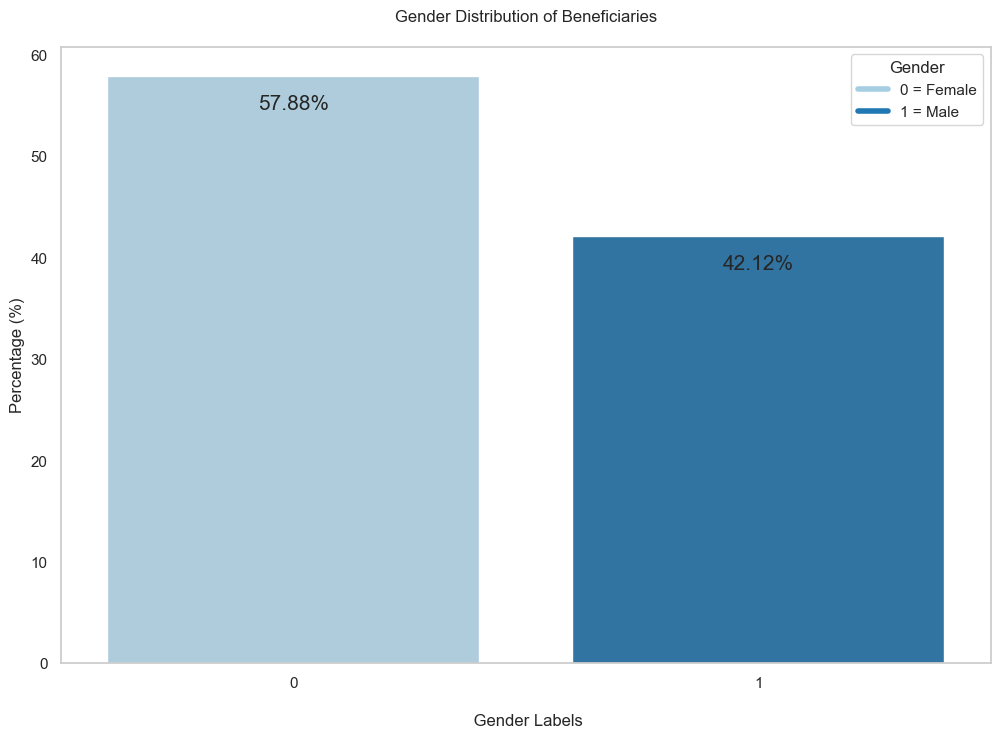

In [8]:
# Creating DataFrame and renaming columns
gender_df = pd.DataFrame(train_df['Gender'].value_counts(normalize=True) * 100).reset_index()
gender_df.columns = ['Gender_Labels', 'Per_data']

# Plotting
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x="Gender_Labels", y="Per_data", data=gender_df, palette='Paired')


# Adding percentage labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', size=15, xytext=(0, -20),
                textcoords='offset points')

# Adding labels and title
plt.xlabel("\n Gender Labels")
plt.ylabel("Percentage (%)")
plt.title("Gender Distribution of Beneficiaries\n")

legend_labels = ['0 = Female', '1 = Male']
legend_colors = sns.color_palette('Paired', n_colors=len(legend_labels))  # using seaborn color palette
plt.legend(title="Gender", labels=legend_labels, loc="upper right",
           handles=[plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors])
plt.grid(False)
plt.show()


### Race Distribution

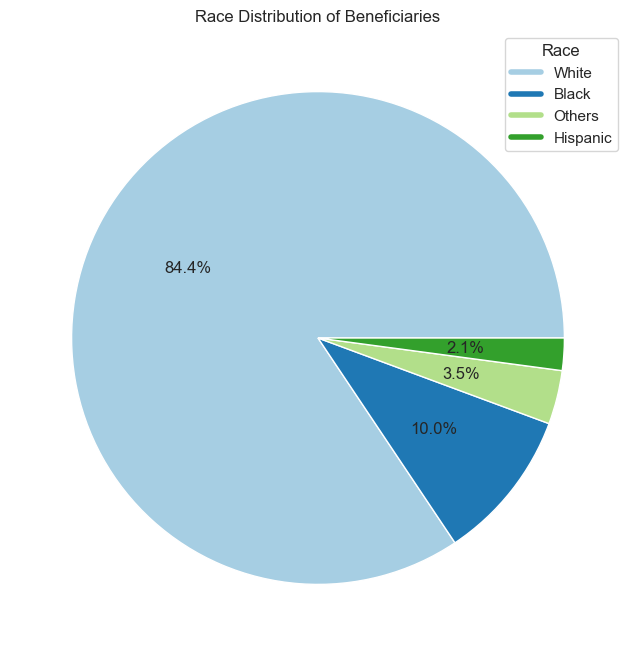

In [9]:
# EDA: Race Distribution
race_counts = train_df['Race'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Race Distribution of Beneficiaries')

legend_labels = ['White', 'Black', 'Others', 'Hispanic']
legend_colors = sns.color_palette('Paired', n_colors=len(legend_labels))  
plt.legend(title="Race", labels=legend_labels, loc="upper right",
           handles=[plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors])

plt.show()


### Age Distribution

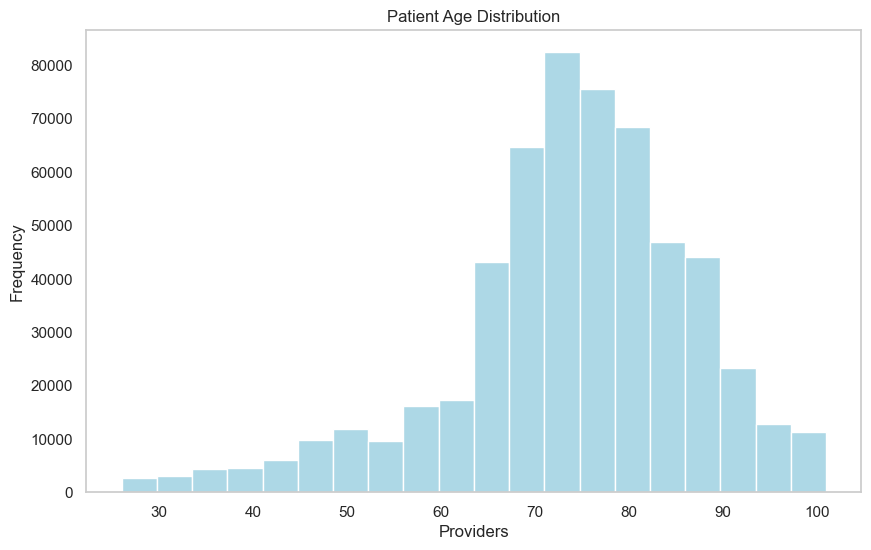

In [10]:
# Plot histogram of Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(train_df['Age'], bins=20, color='lightblue', edgecolor='white')
plt.title('Patient Age Distribution')
plt.xlabel('Providers')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

### Looking at chronic conditions for inpatient and outpatient beneficiary claims

In [11]:
# Filter for inpatient data based on 'Hospital_Stay' column
inpatient_df = train_df[train_df['Hospital_Stay'] >= 1]

# Group by 'BeneID' and calculate mean and median of 'Chr_Cond_Count'
mean_chr_cond_count = inpatient_df.groupby('BeneID')['Chr_Cond_Count'].mean().mean()
median_chr_cond_count = inpatient_df.groupby('BeneID')['Chr_Cond_Count'].mean().median()

# Print results
print("Mean of Chr_Cond_Count for inpatients:", mean_chr_cond_count)
print("Median of Chr_Cond_Count for inpatients:", median_chr_cond_count)


Mean of Chr_Cond_Count for inpatients: 5.441197411003237
Median of Chr_Cond_Count for inpatients: 5.0


In [12]:
# Filter for outpatient data based on 'Hospital_Stay' column
outpatient_df = train_df[train_df['Hospital_Stay'] == 0]

# Group by 'BeneID' and calculate mean and median of 'Chr_Cond_Count'
mean_chr_cond_count = outpatient_df.groupby('BeneID')['Chr_Cond_Count'].mean().mean()
median_chr_cond_count = outpatient_df.groupby('BeneID')['Chr_Cond_Count'].mean().median()

# Print results
print("Mean of Chr_Cond_Count for inpatients:", mean_chr_cond_count)
print("Median of Chr_Cond_Count for inpatients:", median_chr_cond_count)



Mean of Chr_Cond_Count for inpatients: 3.8674524431182395
Median of Chr_Cond_Count for inpatients: 4.0


### Investigating inpatient and outpatient beneficiaries based on high total deductible paid 

In [13]:
# Inpatient Data 

bene_in_char = inpatient_df[['BeneID','Gender', 'Race', 'State', 'County',\
                       'Age', 'Tot_Deductible_Amt', 'Chr_Cond_Count',\
                       'Hospital_Count', 'Claim_Count', 'Physician_Count']]

topb_in_char = bene_in_char.loc[bene_in_char['Tot_Deductible_Amt'] > 35000,:] 
bottomb_in_char = bene_in_char.loc[bene_in_char['Tot_Deductible_Amt'] < 35000,:]

print('\n')
print(topb_in_char['State'].value_counts(normalize=True) * 100)
print('\n')




State
10    33.333333
39    16.666667
36    16.666667
54    11.111111
11     5.555556
6      5.555556
45     5.555556
44     5.555556
Name: proportion, dtype: float64




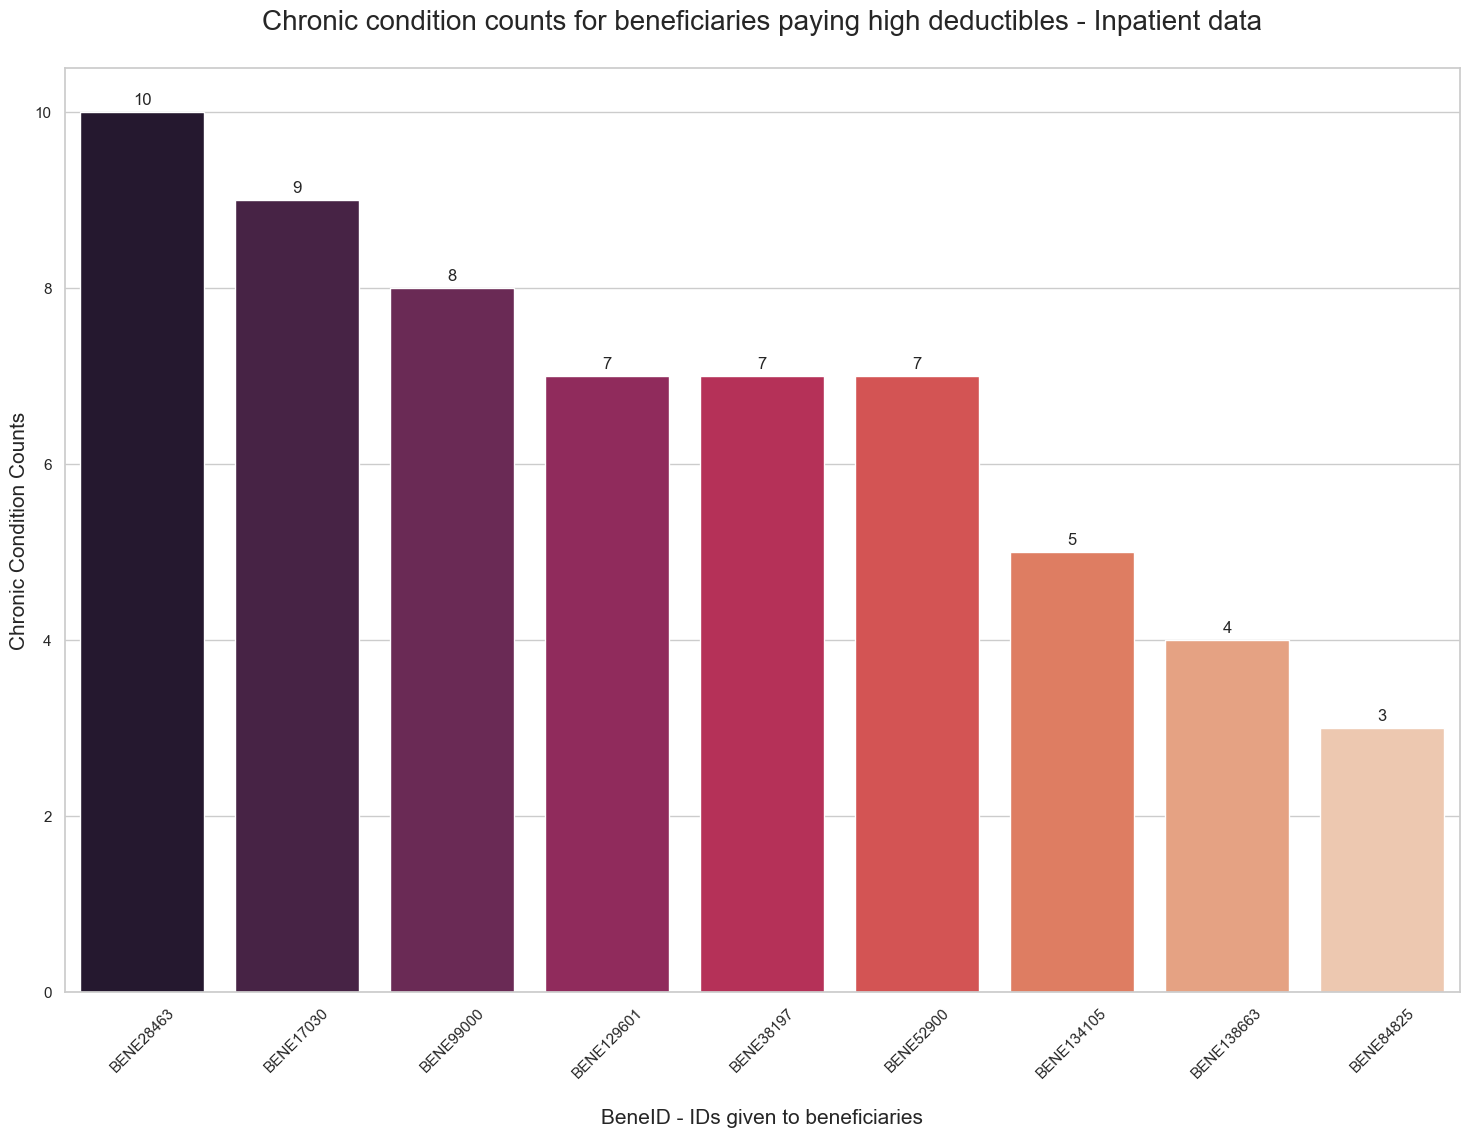

In [14]:
# Group data together
df1 = topb_in_char.groupby('BeneID')['Chr_Cond_Count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(18, 12))
plot = sns.barplot(data=df1, x='BeneID', y='Chr_Cond_Count', palette='rocket')

for bar in plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel("\nBeneID - IDs given to beneficiaries", fontsize=15)
plt.ylabel("Chronic Condition Counts", fontsize=15)
plt.title("Chronic condition counts for beneficiaries paying high deductibles - Inpatient data\n", fontsize=20)
plt.show()


In [15]:
# Outpatient data
bene_out_char = outpatient_df[['BeneID','Gender','Race','State','County',\
                        'Age','Tot_Deductible_Amt','Chr_Cond_Count',\
                        'Hospital_Count','Claim_Count','Physician_Count']]

topb_out_char = bene_out_char.loc[bene_out_char.Tot_Deductible_Amt > 35000,:]
bottomb_out_char = bene_out_char.loc[bene_out_char.Tot_Deductible_Amt < 35000,:]

# Display the results
print('\n')
print(topb_out_char['State'].value_counts(normalize=True)*100)
print('\n')




State
39    26.666667
10    20.000000
11    13.333333
6     10.000000
19    10.000000
44    10.000000
54     6.666667
45     3.333333
Name: proportion, dtype: float64




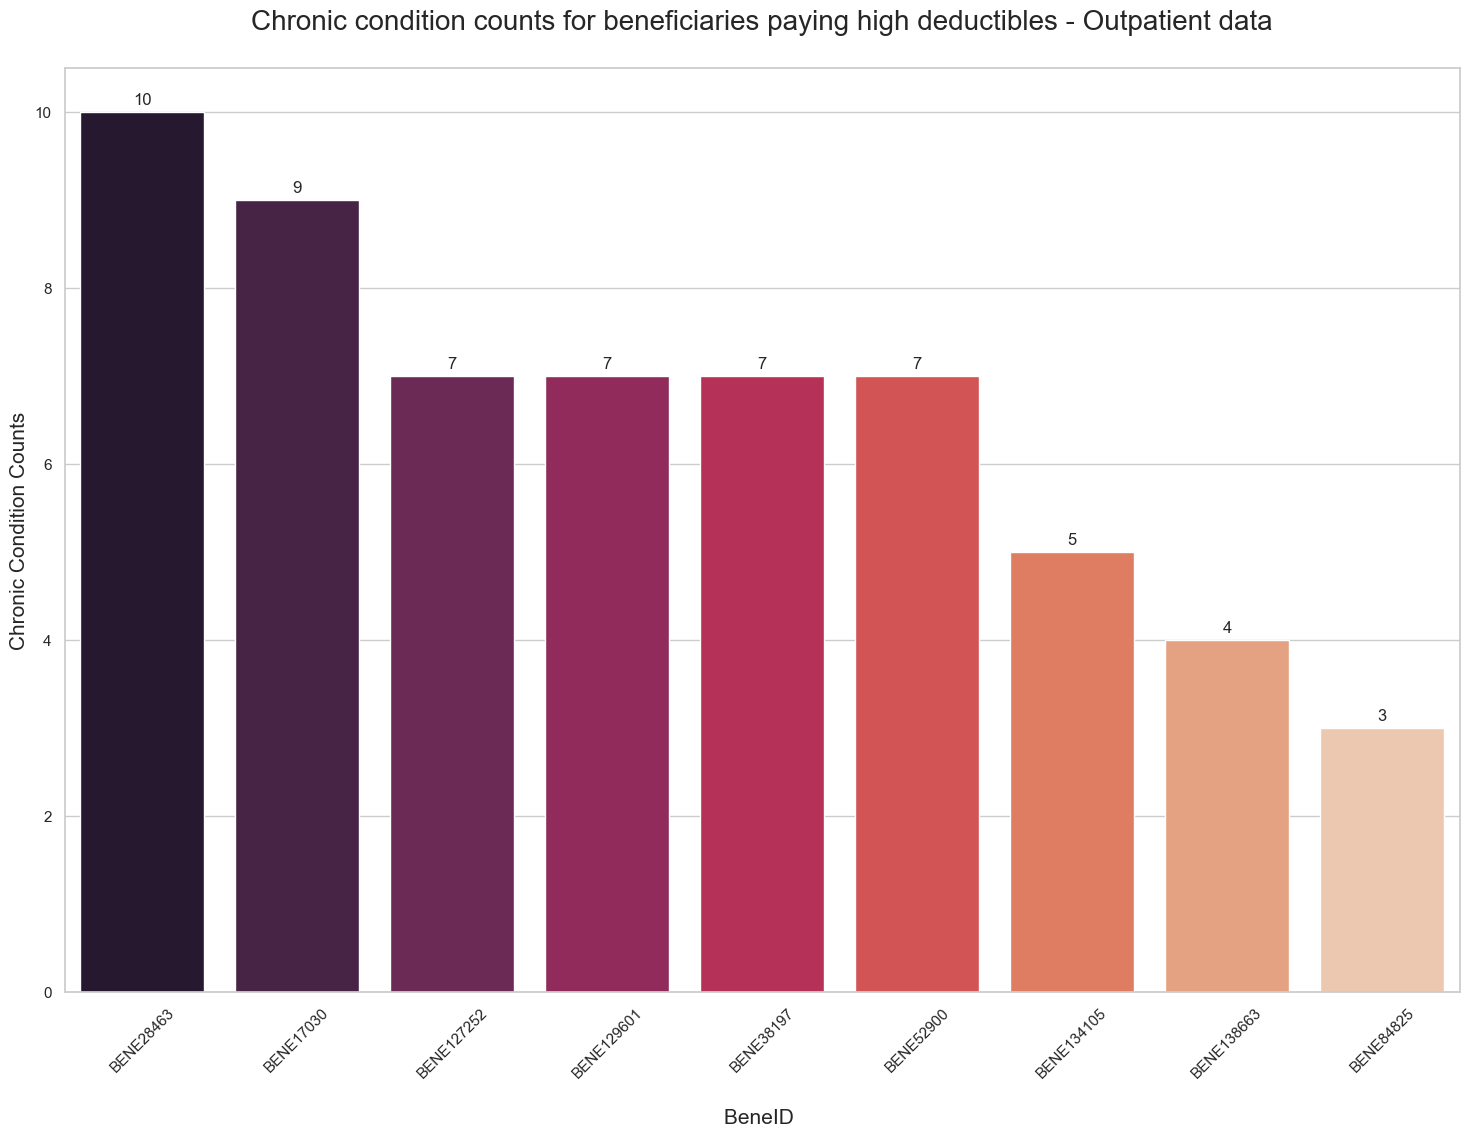

In [16]:
# group data together
df2 = topb_out_char.groupby('BeneID')['Chr_Cond_Count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(18, 12))
plot = sns.barplot(data=df2, x='BeneID', y='Chr_Cond_Count', palette='rocket')

for bar in plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel("\nBeneID ", fontsize=15)
plt.ylabel("Chronic Condition Counts", fontsize=15)
plt.title("Chronic condition counts for beneficiaries paying high deductibles - Outpatient data\n", fontsize=20)
plt.show()


<Figure size 1000x1000 with 0 Axes>

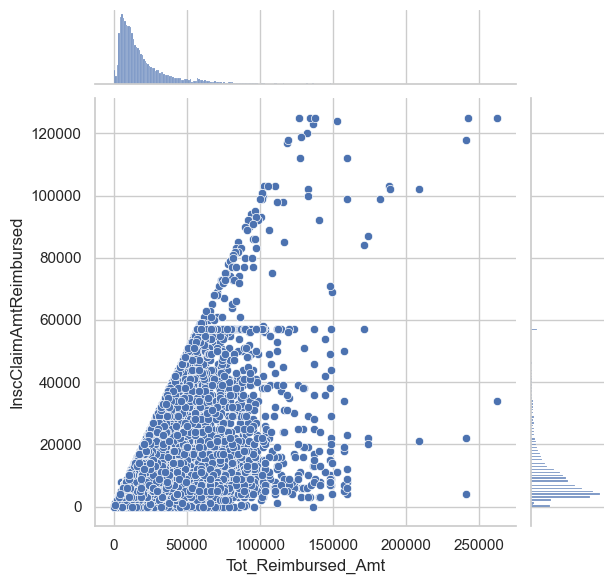

<Figure size 1000x1000 with 0 Axes>

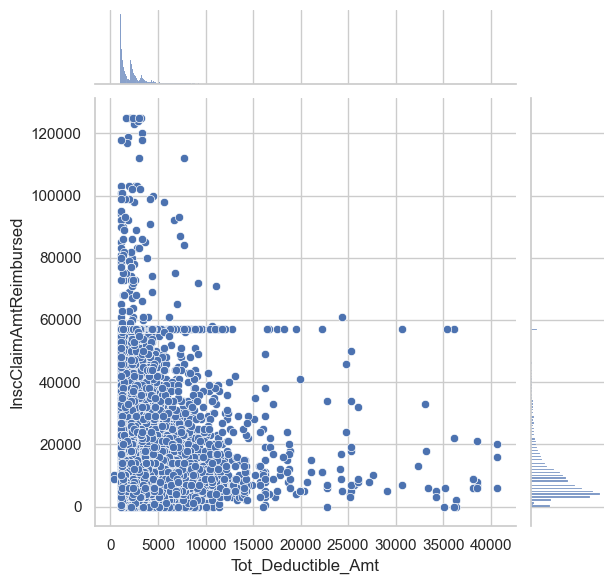

<Figure size 1000x1000 with 0 Axes>

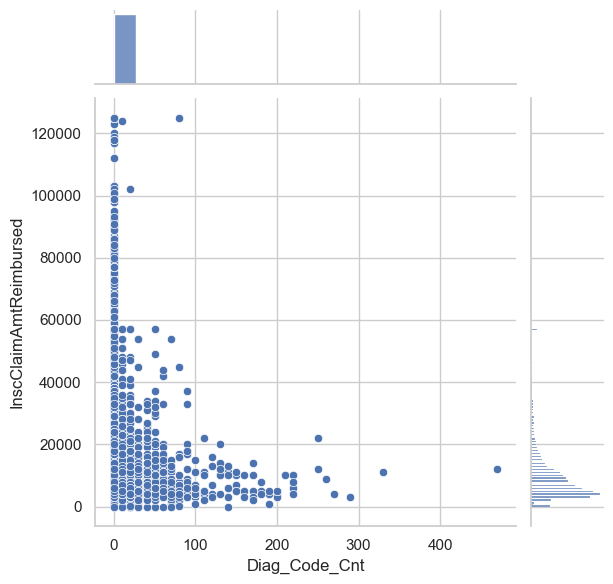

<Figure size 1000x1000 with 0 Axes>

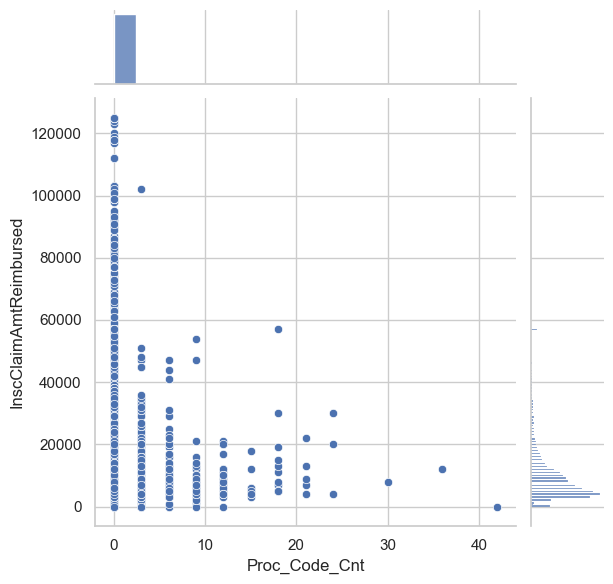

<Figure size 1000x1000 with 0 Axes>

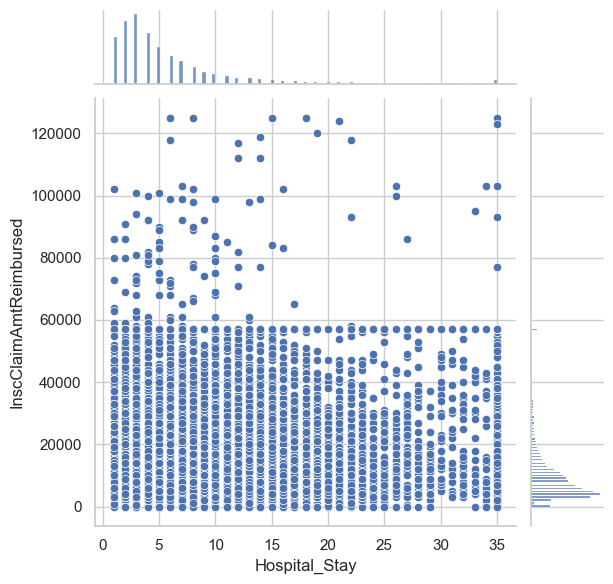

<Figure size 1000x1000 with 0 Axes>

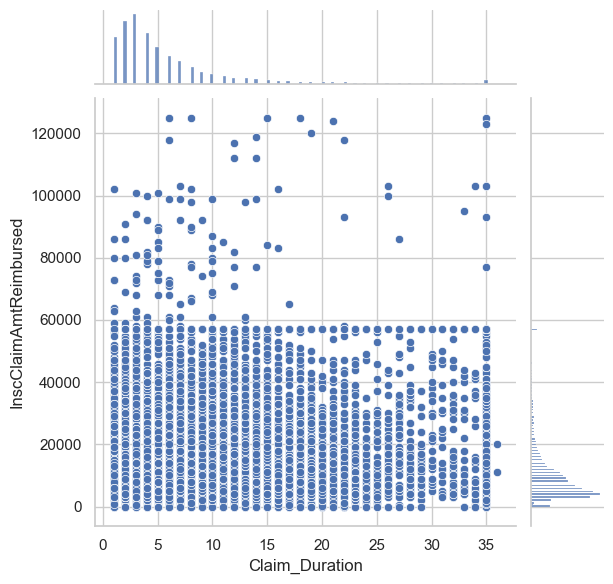

<Figure size 1000x1000 with 0 Axes>

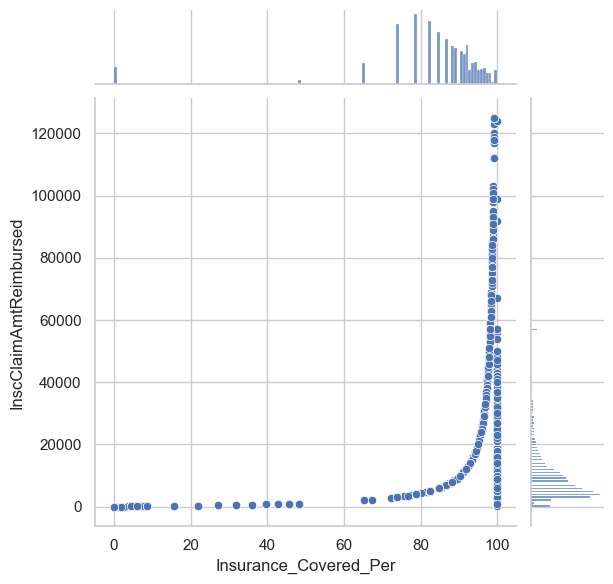

<Figure size 1000x1000 with 0 Axes>

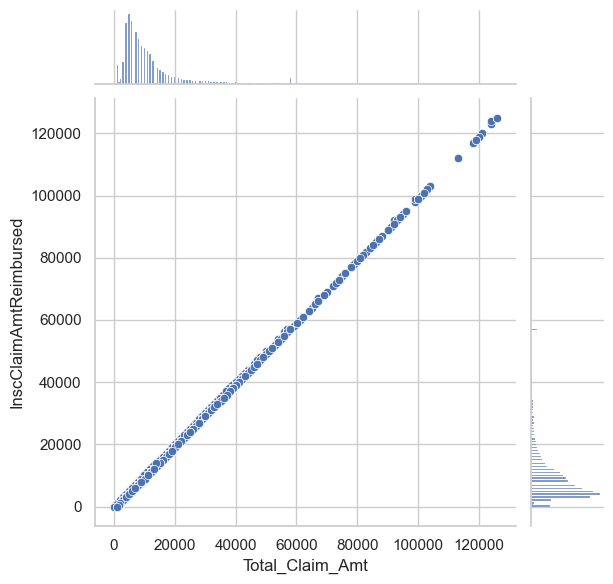

<Figure size 1000x1000 with 0 Axes>

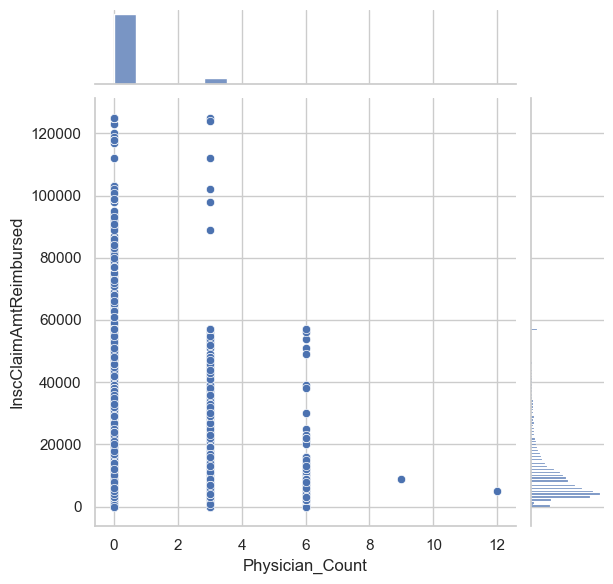

<Figure size 1000x1000 with 0 Axes>

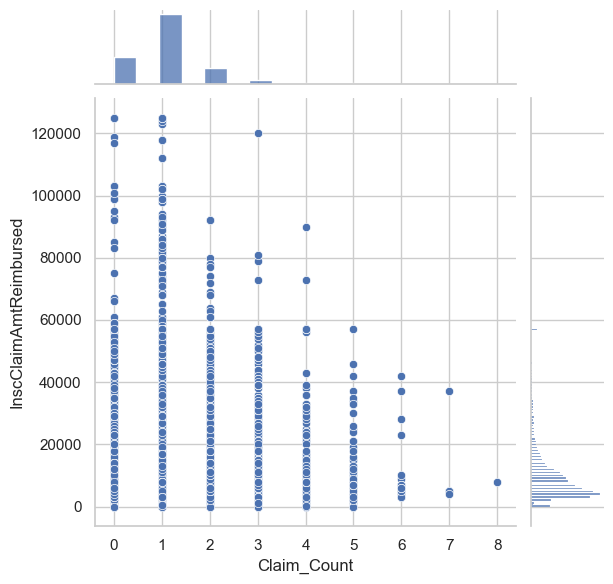

<Figure size 1000x1000 with 0 Axes>

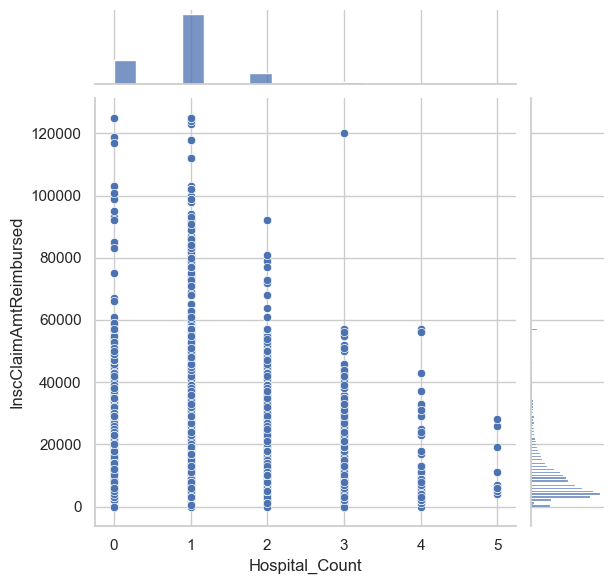

<Figure size 1000x1000 with 0 Axes>

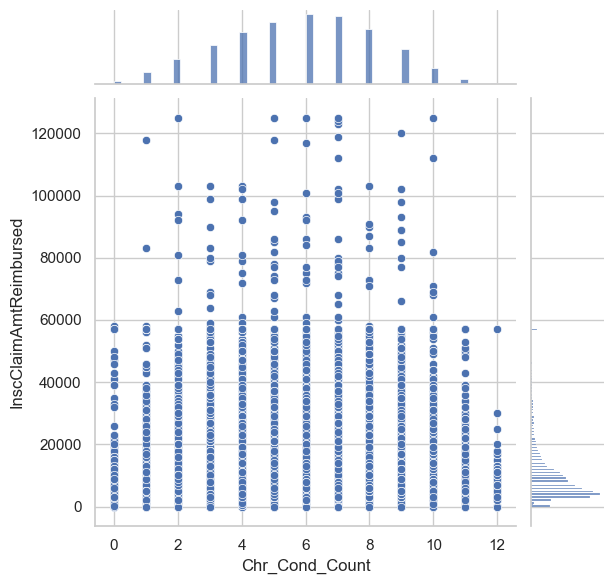

In [17]:
col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay',\
            'Claim_Duration', 'Insurance_Covered_Per', 'Total_Claim_Amt', 'Physician_Count', 'Claim_Count',\
            'Hospital_Count', 'Chr_Cond_Count']


sns.set_style("whitegrid")
y = inpatient_df['InscClaimAmtReimbursed']

for col in col_list:
    plt.figure(figsize=(10, 10))
    sns.jointplot(x=col, y=y, data=inpatient_df)


### Claims versus number of chronic conditions

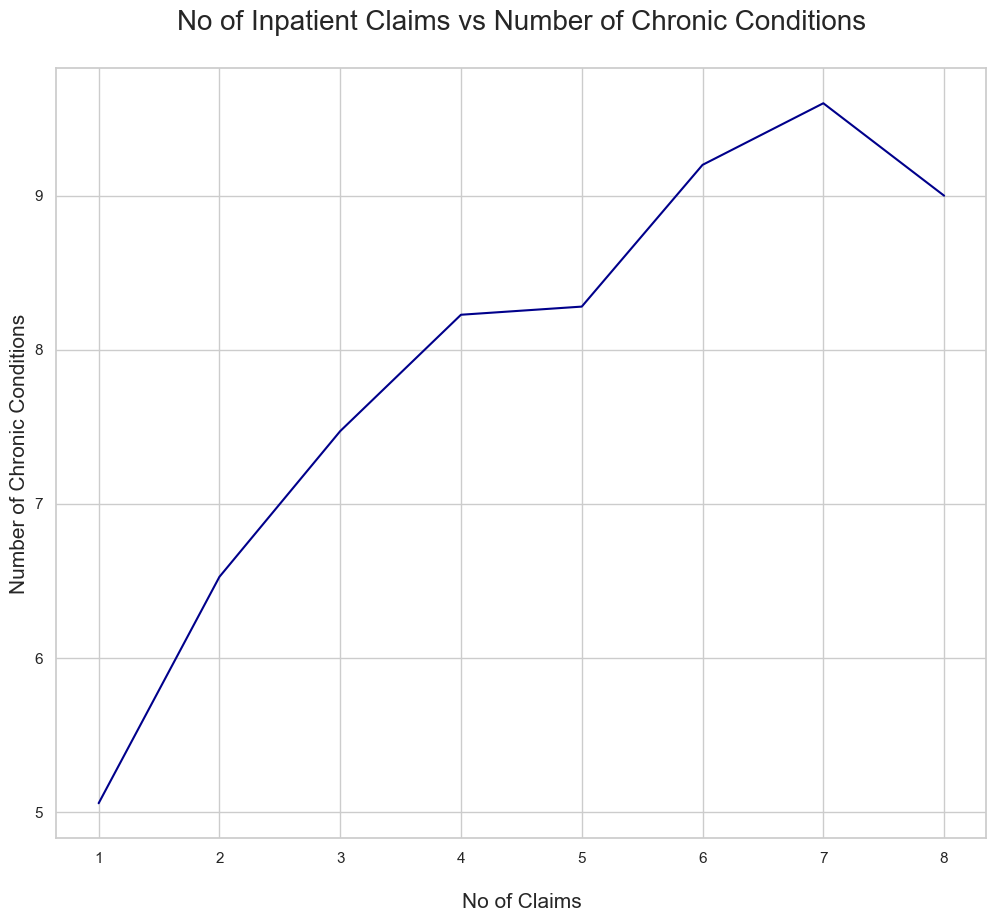

In [18]:
# Inpatient

# Grouping and aggregating data
inp_clm_chr = inpatient_df.groupby('BeneID')['Chr_Cond_Count'].agg(['count', 'mean'])
inp_clm_chr.columns = ['No_of_Claims', 'Chr_Cond_Cnt']

# Sorting the data
inp_clm_chr = inp_clm_chr.sort_values(by=['No_of_Claims', 'Chr_Cond_Cnt'], ascending=[False, False])

# Plotting the results
plt.figure(figsize=(12, 10))
inp_clm_chr.groupby('No_of_Claims')['Chr_Cond_Cnt'].mean().plot(color='darkblue')
plt.xlabel("\nNo of Claims", fontsize=15)
plt.ylabel("Number of Chronic Conditions", fontsize=15)
plt.title("No of Inpatient Claims vs Number of Chronic Conditions\n", fontsize=20)
plt.show()


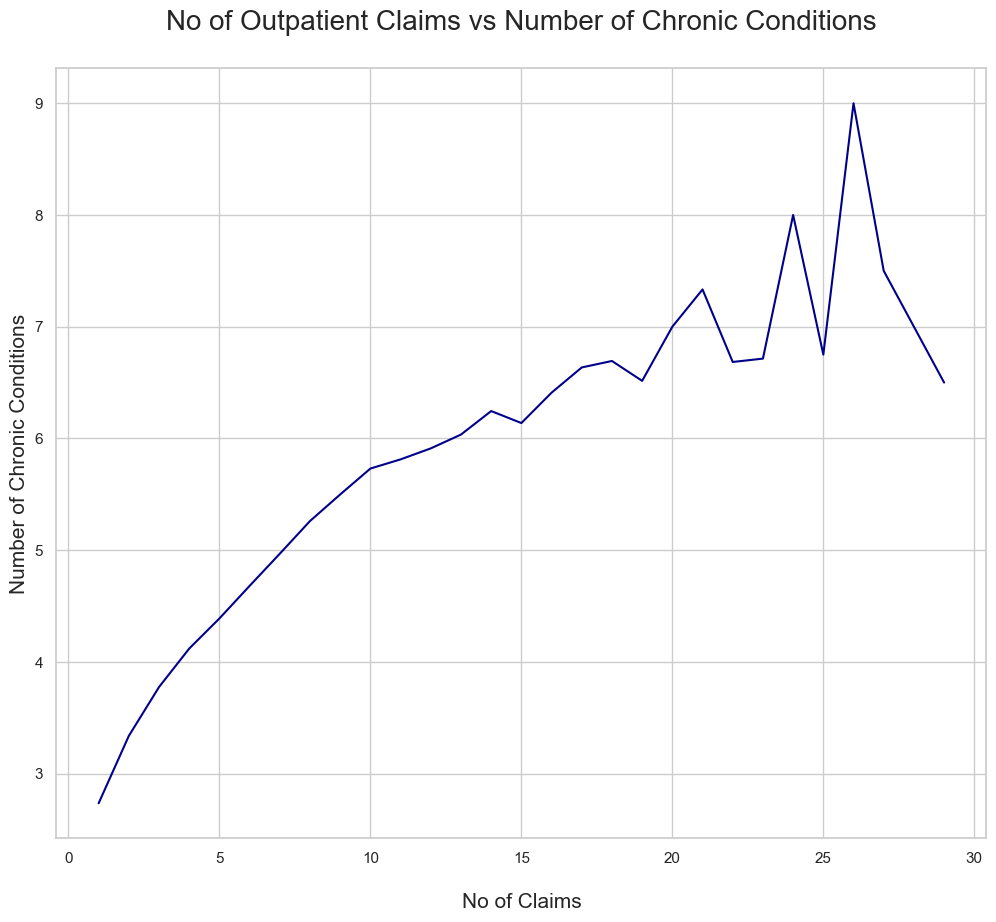

In [19]:
# Outpatient data

# Grouping and aggregating data
out_clm_chr = outpatient_df.groupby('BeneID')['Chr_Cond_Count'].agg(['count', 'mean'])
out_clm_chr.columns = ['No_of_Claims', 'Chr_Cond_Cnt']

# Sorting the data
out_clm_chr = out_clm_chr.sort_values(by=['No_of_Claims', 'Chr_Cond_Cnt'], ascending=[False, False])

# Plotting the results
plt.figure(figsize=(12, 10))
out_clm_chr.groupby('No_of_Claims')['Chr_Cond_Cnt'].mean().plot(color='darkblue')
plt.xlabel("\nNo of Claims", fontsize=15)
plt.ylabel("Number of Chronic Conditions", fontsize=15)
plt.title("No of Outpatient Claims vs Number of Chronic Conditions\n", fontsize=20)
plt.show()

### Patient age versus claims counts

Text(0.5, 1.0, 'No of Inpatient Claims vs Patient Age \n')

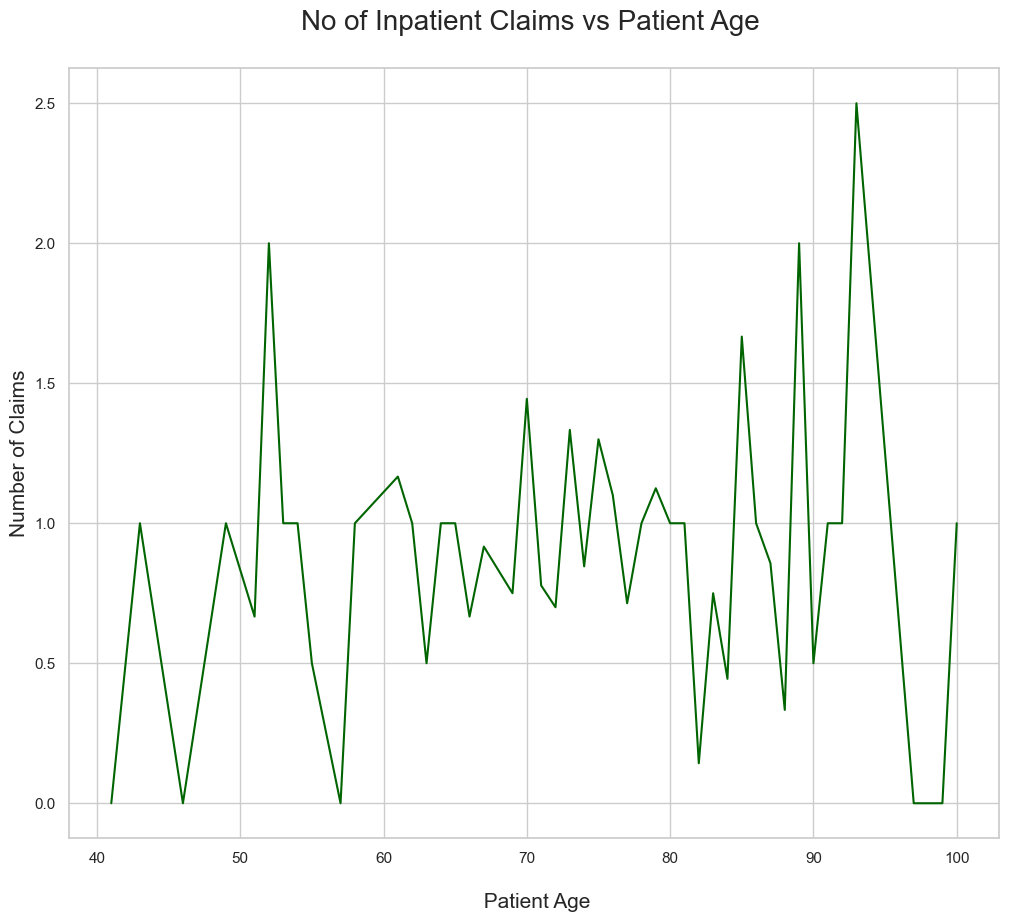

In [20]:
# Inpatient data

# Filter, group, and aggregate data
inp_age_clm_df = inpatient_df.loc[inpatient_df.Deceased == 1, ['BeneID', 'Age', 'Claim_Count']] \
                        .groupby('BeneID').agg({'Age': 'min', 'Claim_Count': 'mean'})

# Rename columns
inp_age_clm_df.columns = ['Age', 'Claims_Count']

# Convert 'Claims_Count' to integer
inp_age_clm_df['Claims_Count'] = inp_age_clm_df['Claims_Count'].astype(int)

# Sort values
inp_age_clm_df = inp_age_clm_df.sort_values(by=['Age', 'Claims_Count'], ascending=[False, False])

# Plotting the results
plt.figure(figsize=(12, 10))
inp_age_clm_df.groupby('Age')['Claims_Count'].mean().plot(color='darkgreen')

# Labeling
plt.xlabel("\n Patient Age", fontsize=15)
plt.ylabel("Number of Claims", fontsize=15)
plt.title("No of Inpatient Claims vs Patient Age \n", fontsize=20)


Text(0.5, 1.0, 'No of Outpatient Claims vs Patient Age \n')

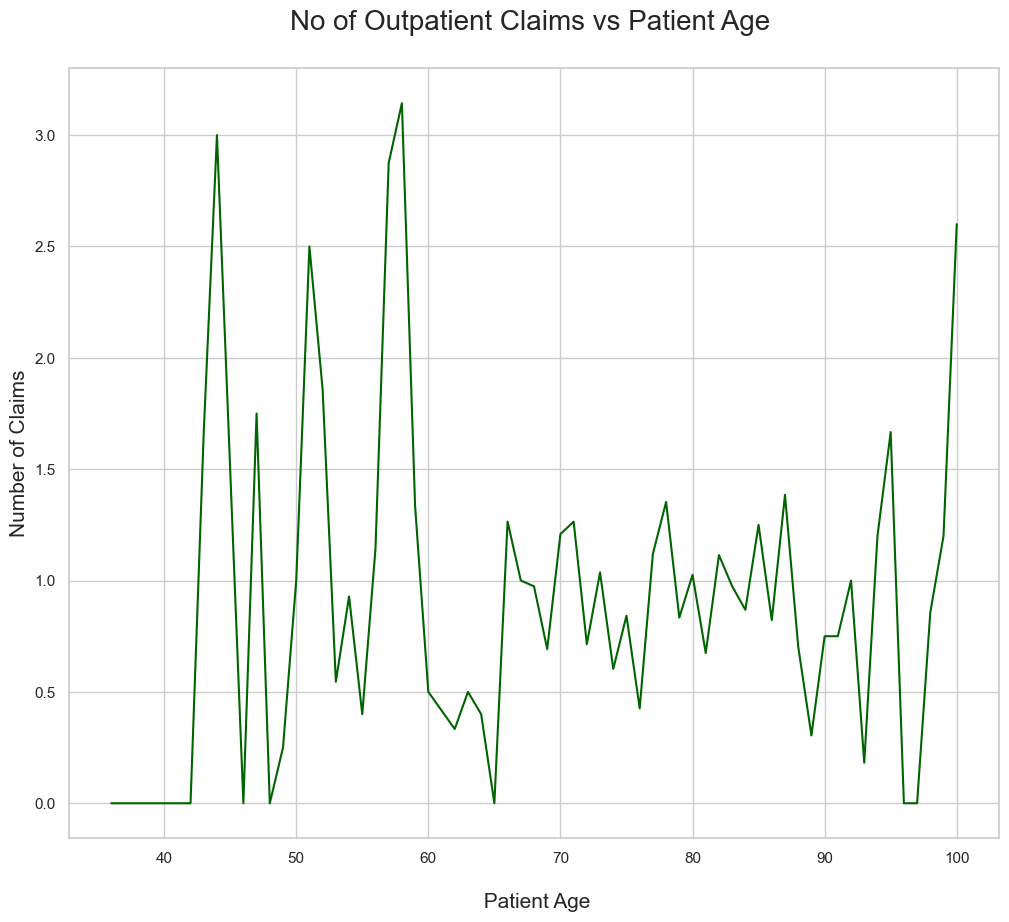

In [21]:
 # Outpatient data

# Filter, group, and aggregate data
out_age_clm_df = outpatient_df.loc[outpatient_df.Deceased == 1, ['BeneID', 'Age', 'Claim_Count']] \
                        .groupby('BeneID').agg({'Age': 'min', 'Claim_Count': 'mean'})

# Rename columns
out_age_clm_df.columns = ['Age', 'Claims_Count']

# Convert 'Claims_Count' to integer
out_age_clm_df['Claims_Count'] = out_age_clm_df['Claims_Count'].astype(int)

# Sort values
out_age_clm_df = out_age_clm_df.sort_values(by=['Age', 'Claims_Count'], ascending=[False, False])

# Plotting the results
plt.figure(figsize=(12, 10))
out_age_clm_df.groupby('Age')['Claims_Count'].mean().plot(color='darkgreen')

# Labeling
plt.xlabel("\n Patient Age", fontsize=15)
plt.ylabel("Number of Claims", fontsize=15)
plt.title("No of Outpatient Claims vs Patient Age \n", fontsize=20)


### Patient age versus chronic condition counts 

Text(0.5, 1.0, 'No. of Chronic Conditions vs Patient Age \n')

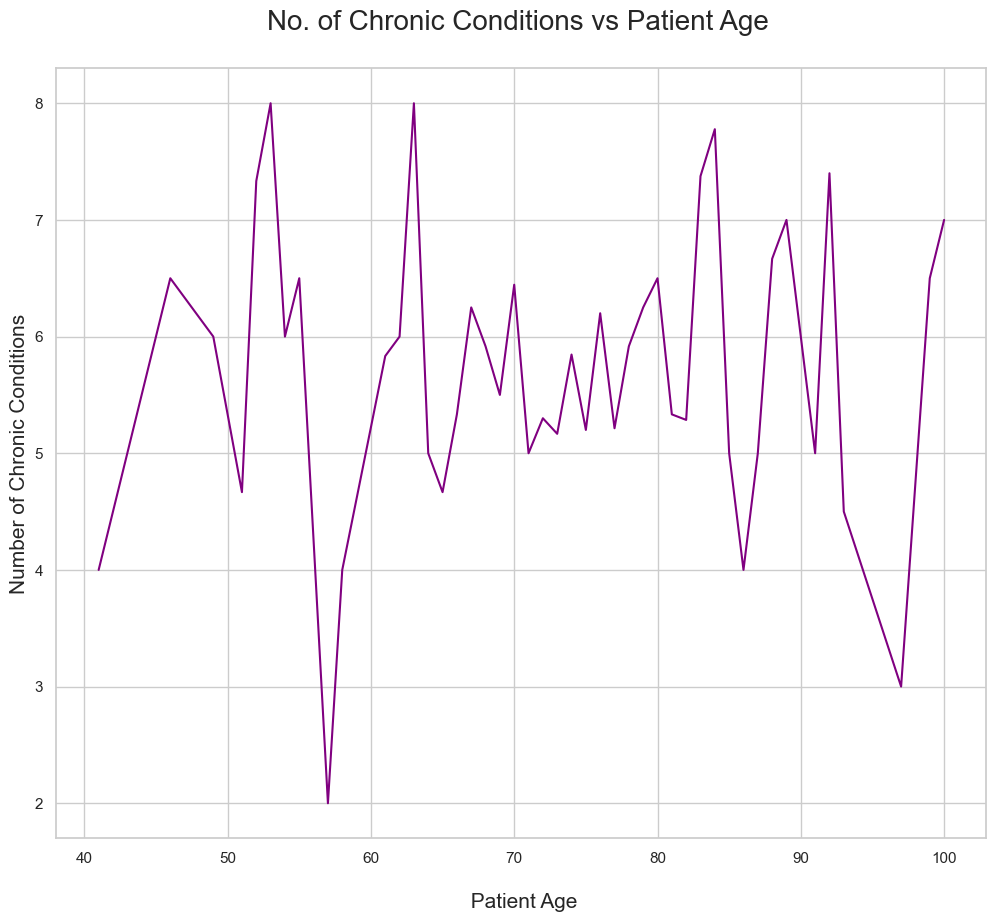

In [22]:
# Inpatient data

inp_age_chr_df = inpatient_df.loc[inpatient_df.Deceased == 1,:][['BeneID','Age','Chr_Cond_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
inp_age_chr_df.columns =['Age','A','B','Condition_Count']
inp_age_chr_df.drop(columns=['A', 'B'], axis=1,inplace=True)
inp_age_chr_df['Condition_Count'] = inp_age_chr_df['Condition_Count'].astype(int)
inp_age_chr_df = inp_age_chr_df.sort_values(by=['Age','Condition_Count']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_age_chr_df.groupby('Age')['Condition_Count'].mean().plot(color='purple')
plt.xlabel("\n Patient Age", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No. of Chronic Conditions vs Patient Age \n", fontsize = 20)


Text(0.5, 1.0, 'No. of Chronic Conditions vs Patient Age \n')

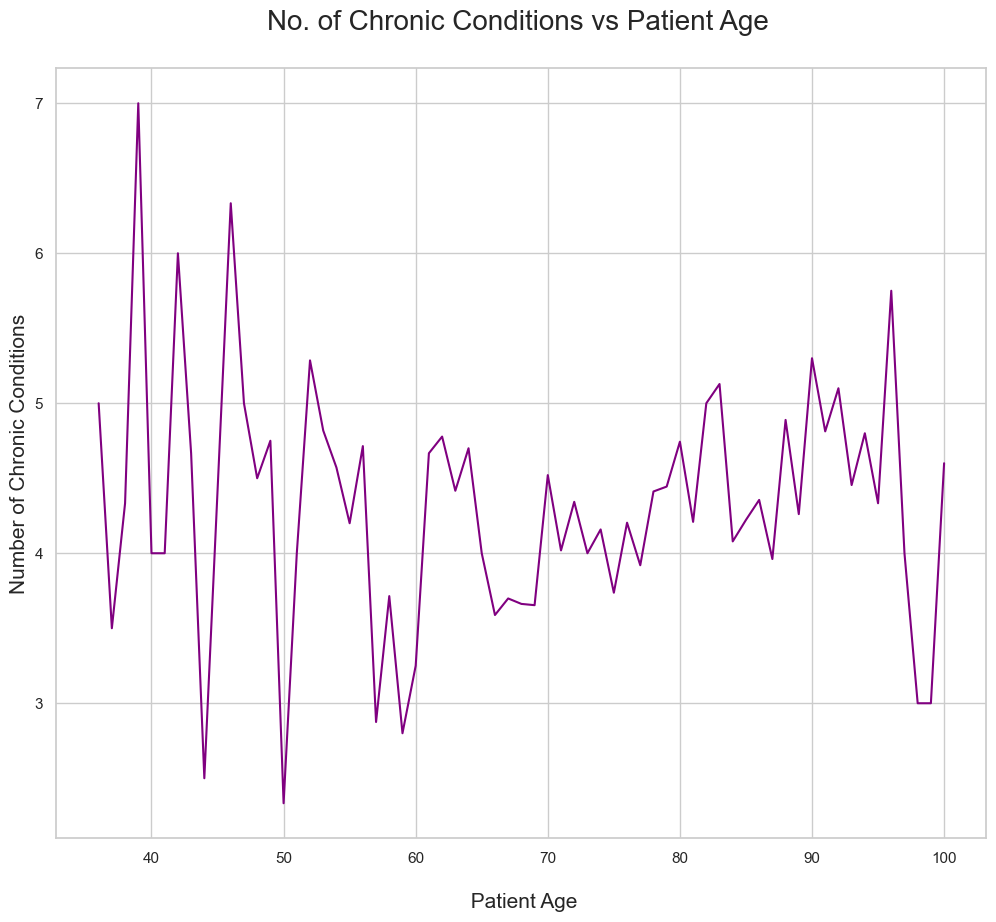

In [23]:
# Outpatient data

out_age_chr_df = outpatient_df.loc[outpatient_df.Deceased == 1,:][['BeneID','Age','Chr_Cond_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
out_age_chr_df.columns =['Age','A','B','Condition_Count']
out_age_chr_df.drop(columns=['A', 'B'], axis=1,inplace=True)
out_age_chr_df['Condition_Count'] = out_age_chr_df['Condition_Count'].astype(int)
out_age_chr_df = out_age_chr_df.sort_values(by=['Age','Condition_Count',]\
                            ,ascending=[False, False])

# Plotting the results
plt.figure(figsize = (12,10))
out_age_chr_df.groupby('Age')['Condition_Count'].mean().plot(color='purple')
plt.xlabel("\n Patient Age", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No. of Chronic Conditions vs Patient Age \n", fontsize = 20)


---
## Provider Fraud Focused EDA
---

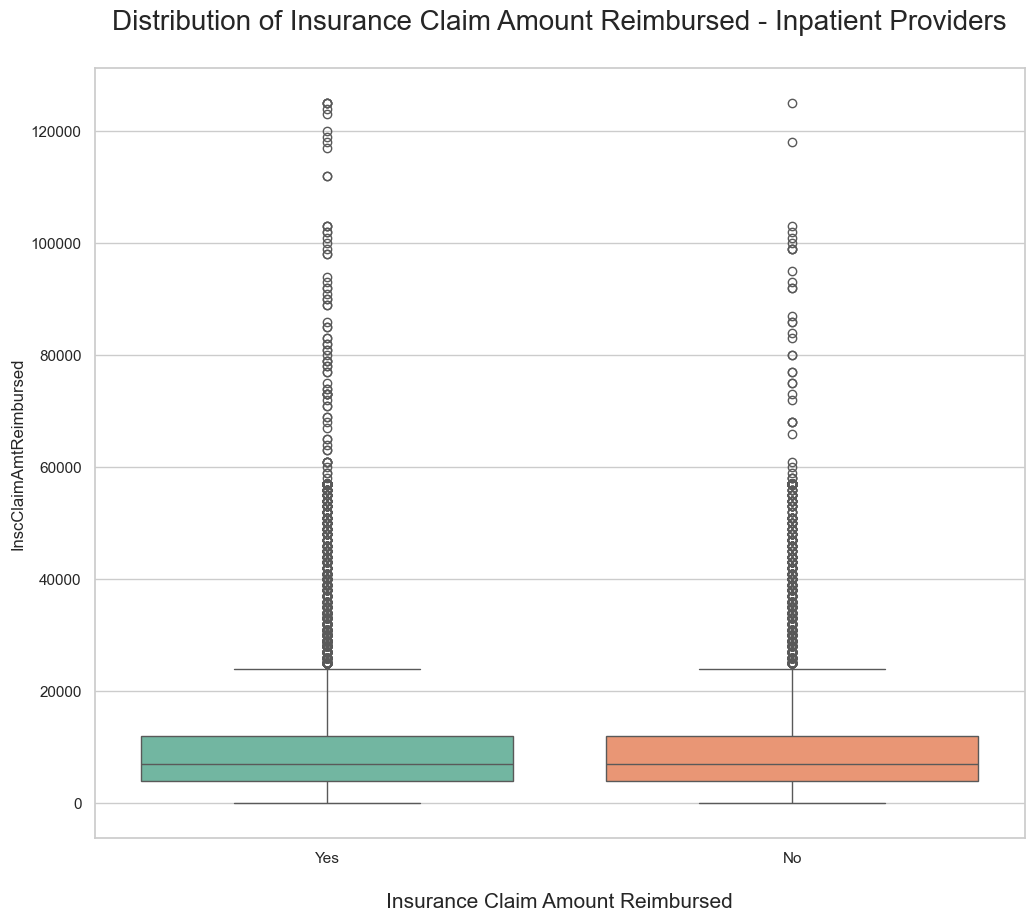

In [24]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=inpatient_df, x='PotentialFraud', y='InscClaimAmtReimbursed', palette='Set2')
plt.xlabel("\nInsurance Claim Amount Reimbursed", fontsize=15)
plt.title("Distribution of Insurance Claim Amount Reimbursed - Inpatient Providers\n", fontsize=20)
plt.show()


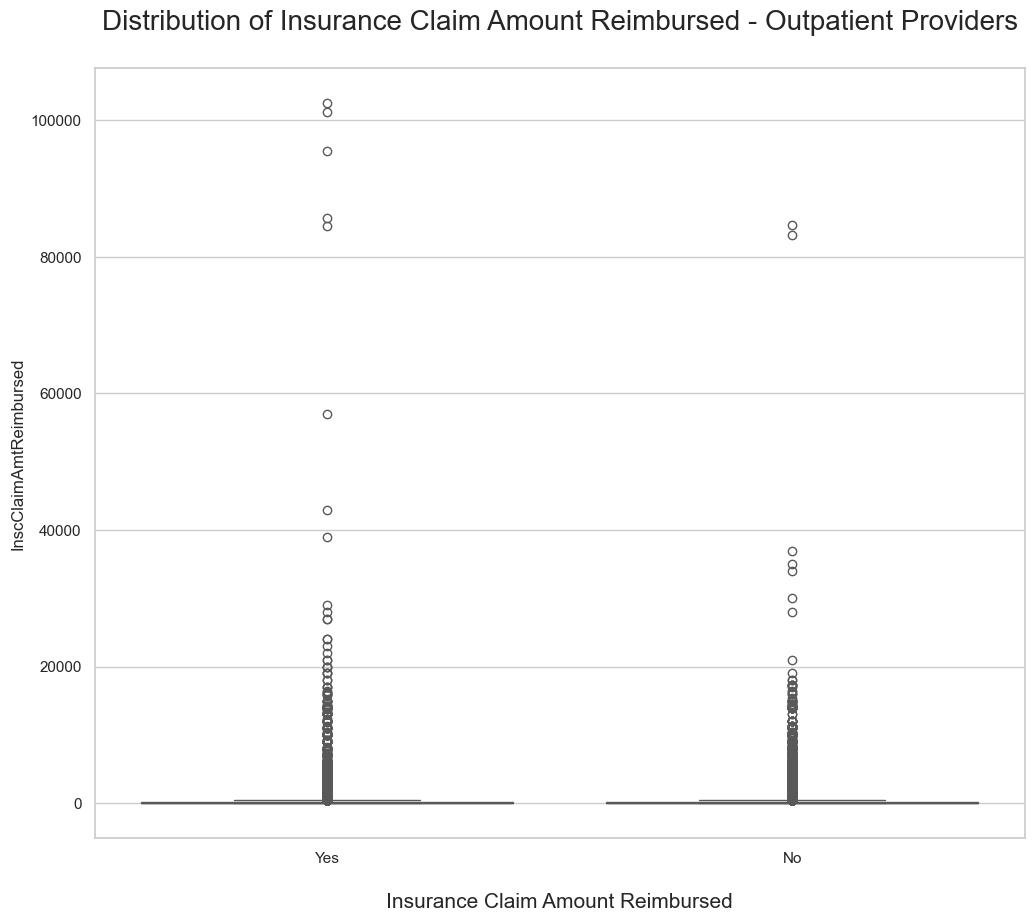

In [25]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=outpatient_df, x='PotentialFraud', y='InscClaimAmtReimbursed', palette='Set2')
plt.xlabel("\nInsurance Claim Amount Reimbursed", fontsize=15)
plt.title("Distribution of Insurance Claim Amount Reimbursed - Outpatient Providers\n", fontsize=20)
plt.show()


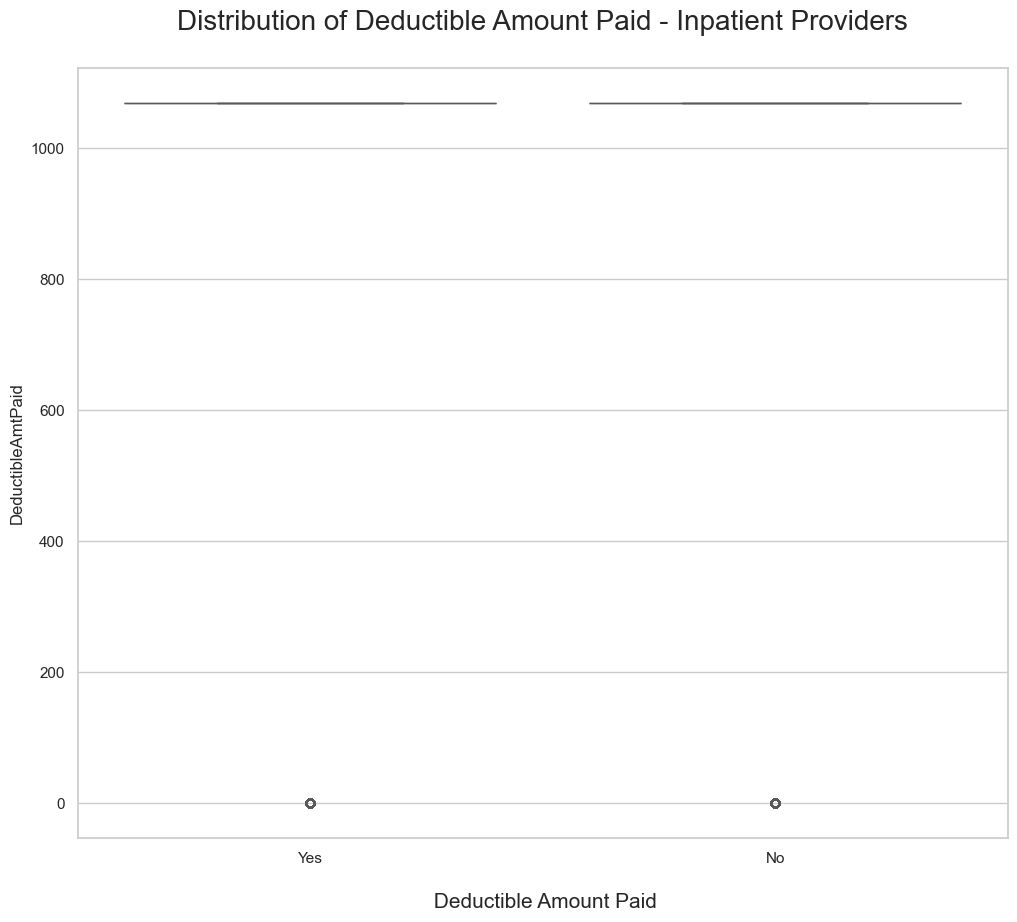

In [26]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=inpatient_df, x='PotentialFraud', y='DeductibleAmtPaid', \
            palette='Set2')
plt.xlabel("\n Deductible Amount Paid", fontsize=15)
plt.title("Distribution of Deductible Amount Paid - Inpatient Providers\n", fontsize=20)
plt.show()


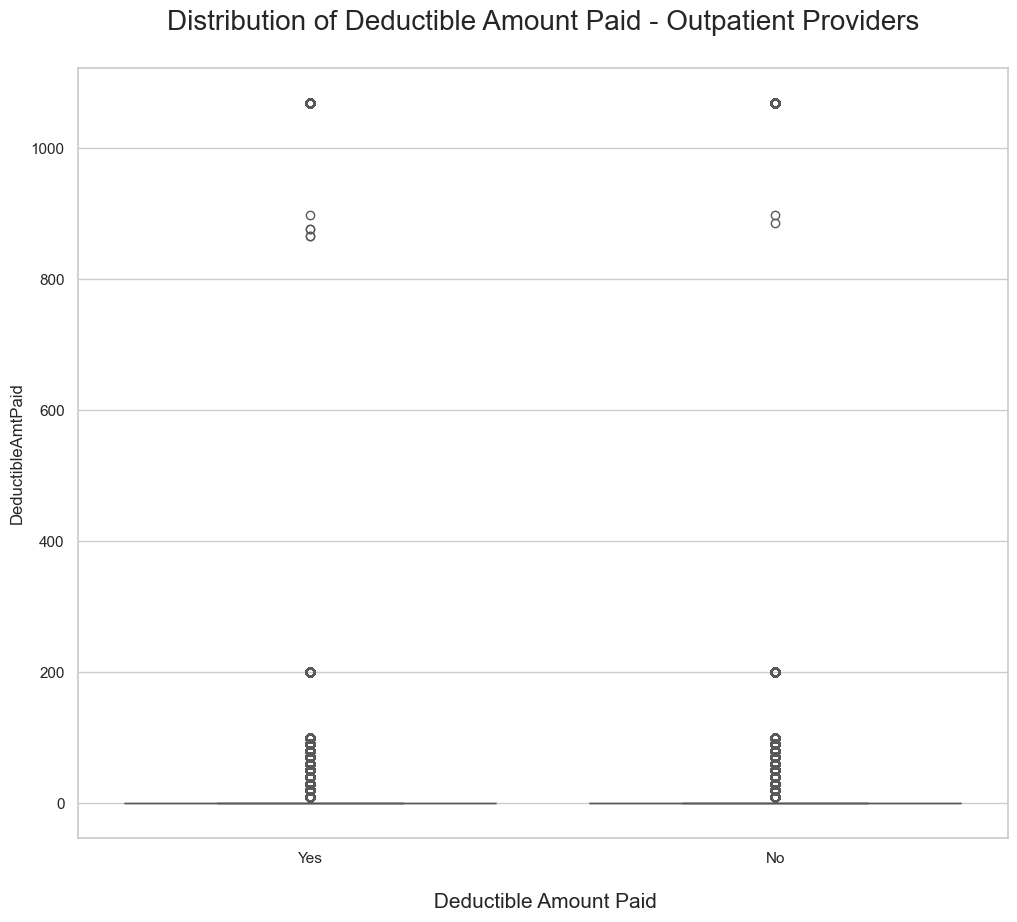

In [27]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=outpatient_df, x='PotentialFraud', y='DeductibleAmtPaid', \
            palette='Set2')
plt.xlabel("\n Deductible Amount Paid", fontsize=15)
plt.title("Distribution of Deductible Amount Paid - Outpatient Providers\n", fontsize=20)
plt.show()


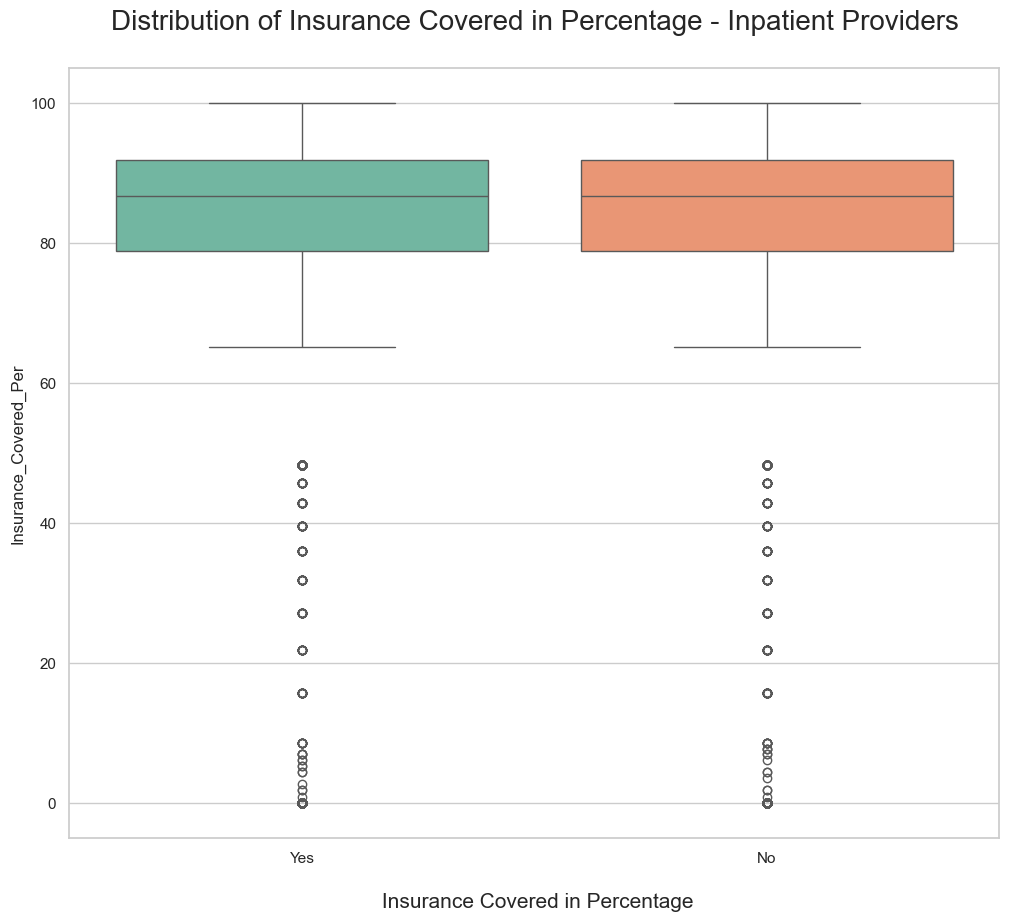

In [28]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=inpatient_df, x='PotentialFraud', y='Insurance_Covered_Per', \
            palette='Set2')
plt.xlabel("\n Insurance Covered in Percentage", fontsize=15)
plt.title("Distribution of Insurance Covered in Percentage - Inpatient Providers\n", fontsize=20)
plt.show()


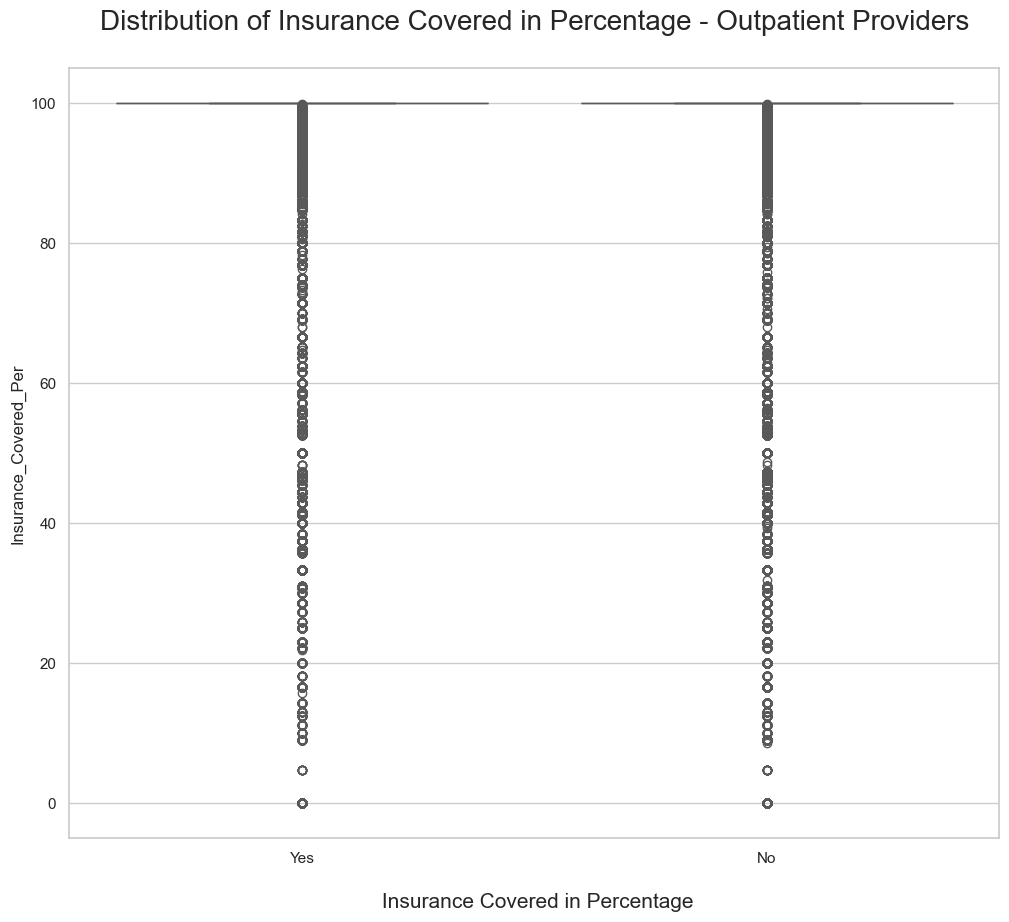

In [29]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=outpatient_df, x='PotentialFraud', y='Insurance_Covered_Per', \
            palette='Set2')
plt.xlabel("\n Insurance Covered in Percentage", fontsize=15)
plt.title("Distribution of Insurance Covered in Percentage - Outpatient Providers\n", fontsize=20)
plt.show()


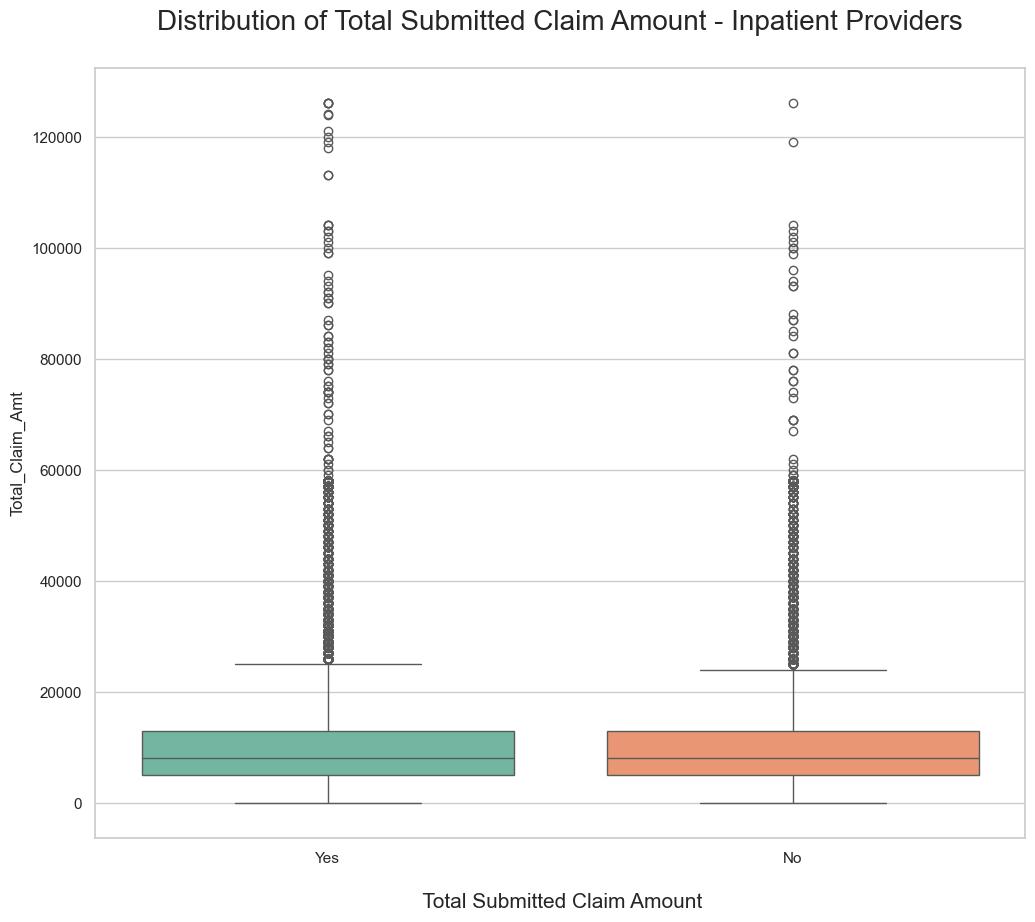

In [30]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=inpatient_df, x='PotentialFraud', y='Total_Claim_Amt', \
            palette='Set2')
plt.xlabel("\n Total Submitted Claim Amount", fontsize=15)
plt.title("Distribution of Total Submitted Claim Amount - Inpatient Providers\n", fontsize=20)
plt.show()


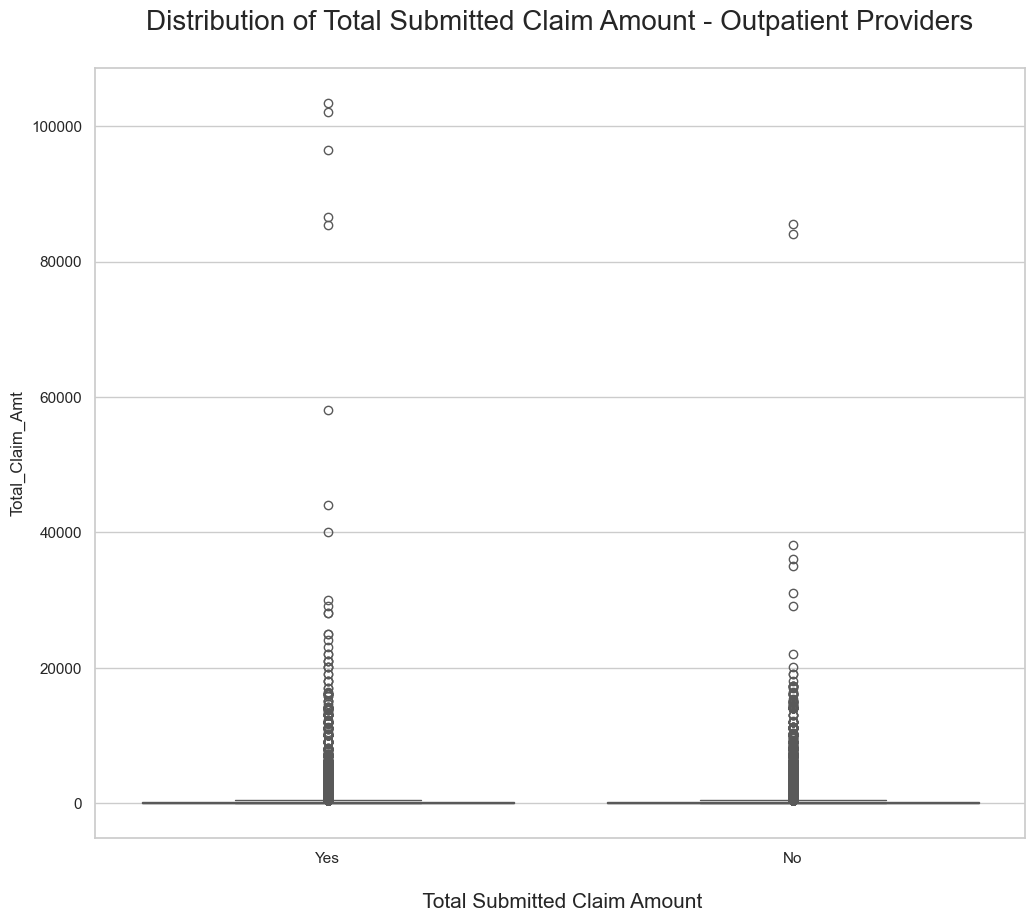

In [31]:
# Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

# Plot the results
plt.figure(figsize=(12, 10))
sns.boxplot(data=outpatient_df, x='PotentialFraud', y='Total_Claim_Amt', \
            palette='Set2')
plt.xlabel("\n Total Submitted Claim Amount", fontsize=15)
plt.title("Distribution of Total Submitted Claim Amount - Outpatient Providers\n", fontsize=20)
plt.show()

### Identify providers with unusually high number of claims or reimbursements (Billing for services not provided)

In [32]:
# Medicare Fraud - Billing for Services not provided
provider_summary = train_df.groupby('Provider').agg({'ClaimID': 'count', 'InscClaimAmtReimbursed': 'sum'}).reset_index()

# Identify providers with an unusually high number of claims or reimbursements
sus_providers = provider_summary[(provider_summary['ClaimID'] > provider_summary['ClaimID'].mean() + 2 * provider_summary['ClaimID'].std()) |
                                        (provider_summary['InscClaimAmtReimbursed'] > provider_summary['InscClaimAmtReimbursed'].mean() + 2 * provider_summary['InscClaimAmtReimbursed'].std())]

print("Providers potentially involved in billing for services not provided:")
print(sus_providers)

Providers potentially involved in billing for services not provided:
      Provider  ClaimID  InscClaimAmtReimbursed
3     PRV51005     1165                  280910
20    PRV51030      171                  739760
90    PRV51119       95                 1080580
113   PRV51145      202                 1606350
114   PRV51146      352                 1680910
...        ...      ...                     ...
5181  PRV57481       62                  776000
5196  PRV57502      260                 1197550
5214  PRV57527      165                  665500
5232  PRV57548      210                 1069050
5365  PRV57715      860                  688200

[271 rows x 3 columns]


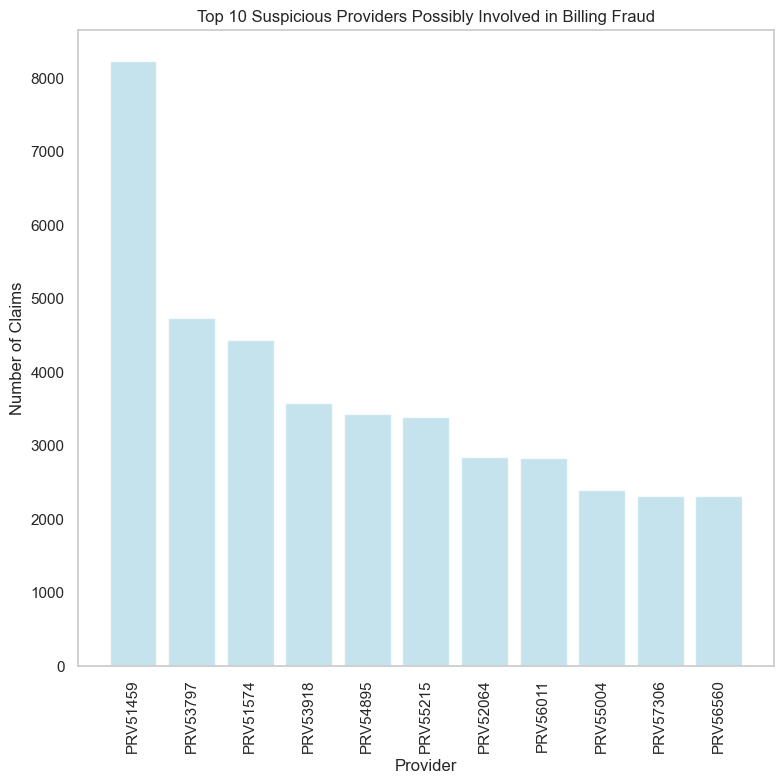

In [33]:
# Filter providers in the original DataFrame based on suspicious providers
sus_df = train_df[train_df['Provider'].isin(sus_providers['Provider'])]

# Group by Provider and count the number of claims
provider_claim_counts = sus_df['Provider'].value_counts()

# Select the top 20 providers
top_10_providers = provider_claim_counts.head(11)

# Plot the bar plot for the top 20 providers
plt.figure(figsize=(8, 8))  # Adjusted figure size for better visibility
plt.bar(top_10_providers.index, top_10_providers.values, color='lightblue', alpha=0.7)
plt.xlabel('Provider')
plt.ylabel('Number of Claims')
plt.title('Top 10 Suspicious Providers Possibly Involved in Billing Fraud')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
plt.show()


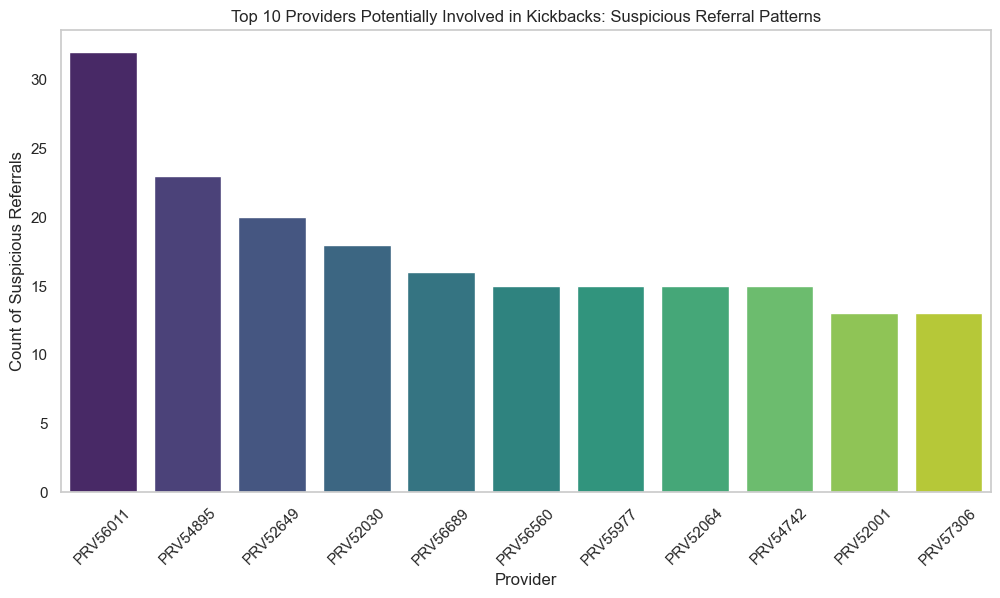

In [34]:
# Identify providers with unusually high referral patterns
suspicious_referrals = train_df.groupby(['Provider', 'AttendingPhysician']).size()
suspicious_providers_kickbacks = suspicious_referrals[suspicious_referrals > suspicious_referrals.mean() + 2 * suspicious_referrals.std()].reset_index()['Provider'].value_counts()

# Extract top 20 providers potentially involved in kickbacks
top_10_suspicious_providers = suspicious_providers_kickbacks.head(11)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_suspicious_providers.index, y=top_10_suspicious_providers.values, palette='viridis')
plt.title('Top 10 Providers Potentially Involved in Kickbacks: Suspicious Referral Patterns')
plt.xlabel('Provider')
plt.ylabel('Count of Suspicious Referrals')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [35]:
# Identify the top 10 providers with the highest frequency.

# Count the frequency of each provider
provider_counts = train_df['Provider'].value_counts().reset_index()
provider_counts.columns = ['Provider', 'Frequency']

# Get the top 10 most common providers
top_10_providers = provider_counts.head(11)
print("Top 10 most common providers:")
print(top_10_providers)

Top 10 most common providers:
    Provider  Frequency
0   PRV51459       8240
1   PRV53797       4739
2   PRV51574       4444
3   PRV53918       3588
4   PRV54895       3436
5   PRV55215       3393
6   PRV52064       2844
7   PRV56011       2833
8   PRV55004       2399
9   PRV57306       2315
10  PRV56560       2313


### Looking at max reimbursement received per fraud/non-fraud provider

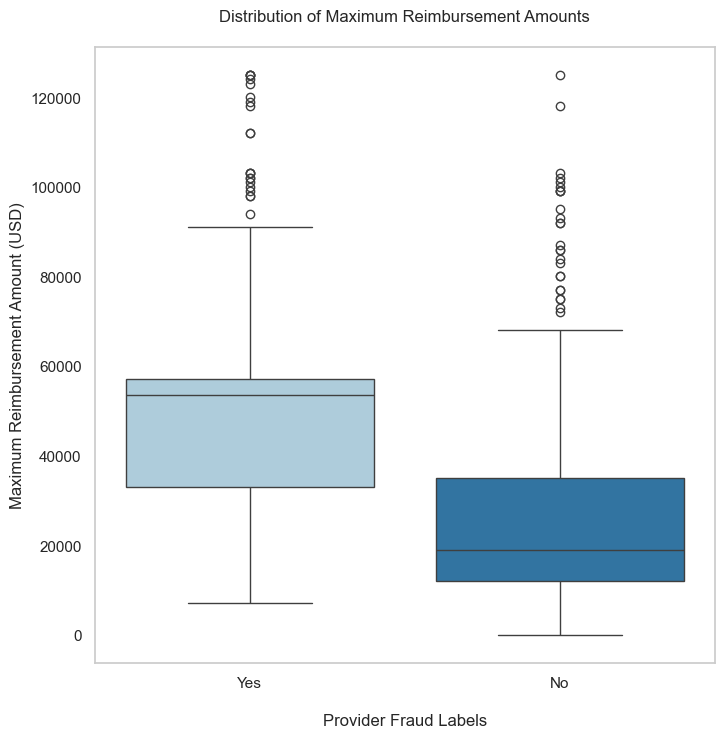

In [36]:
# Grouping and aggregating
in_reim_max = inpatient_df.groupby('Provider')['InscClaimAmtReimbursed'].max().reset_index(name='Max_Reimbursement')

# Adding fraud labels and sorting
in_reim_max = in_reim_max.merge(fraud_labels, on='Provider').sort_values(by='Max_Reimbursement', ascending=False)

# Plotting
plt.figure(figsize=(8, 8))
sns.boxplot(x="PotentialFraud", y="Max_Reimbursement", data=in_reim_max, palette='Paired')
plt.xlabel("\nProvider Fraud Labels")
plt.ylabel("Maximum Reimbursement Amount (USD)")
plt.title("Distribution of Maximum Reimbursement Amounts\n")
plt.grid(False)
plt.show()


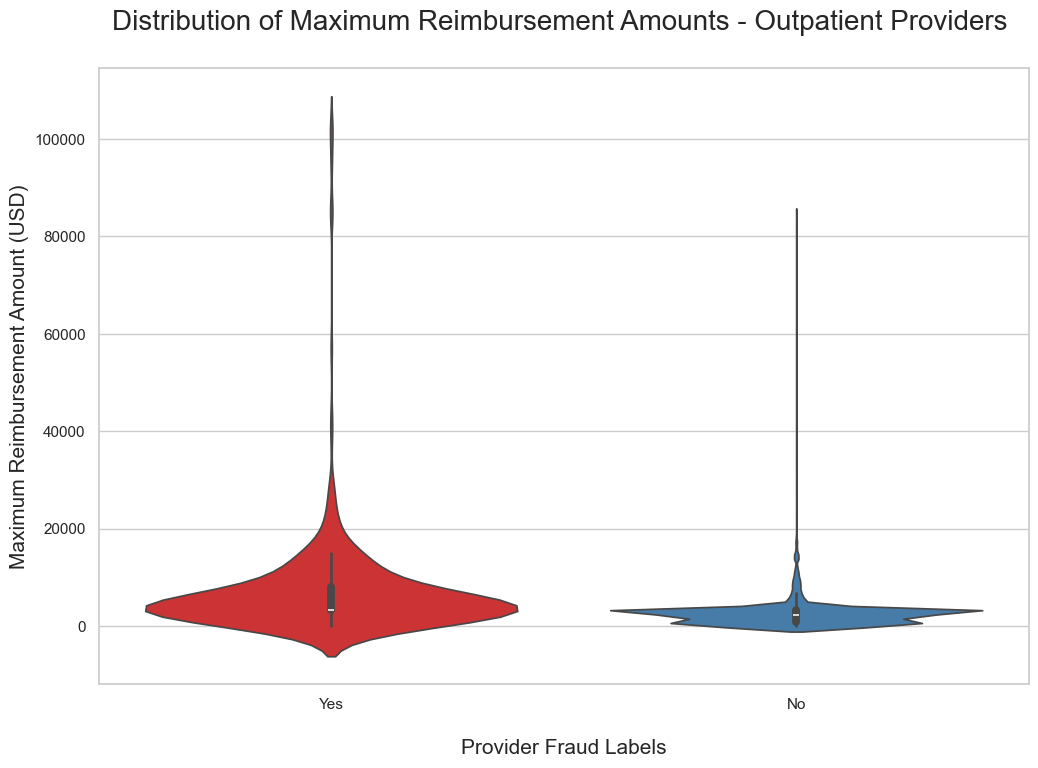

In [37]:
# Outpatient Data 

out_reim_max = outpatient_df.groupby('Provider')['InscClaimAmtReimbursed'].max().reset_index(name='Max_Reimbursement').merge(fraud_labels, on='Provider').sort_values(by='Max_Reimbursement', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_reim_max["PotentialFraud"], y=out_reim_max["Max_Reimbursement"], palette='Set1')
plt.xlabel("\nProvider Fraud Labels", fontsize=15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize=15)
plt.title("Distribution of Maximum Reimbursement Amounts - Outpatient Providers \n", fontsize=20)
plt.show()



### Looking at number of claims submitted for fraud and non-fraud providers

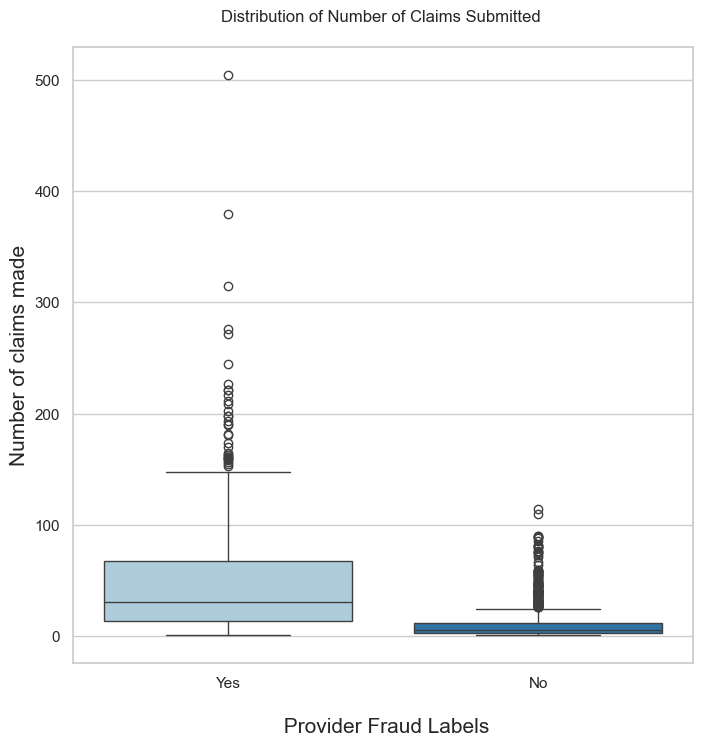

In [38]:
# Create df to number of claims per provider and add fraud labels
in_prov_clm_df = (inpatient_df.groupby('Provider')['ClaimID']
                  .count()
                  .reset_index(name='No. of Claims')
                  .sort_values(by='No. of Claims', ascending=False)
                  .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(8, 8))
sns.set_theme(style='whitegrid')
sns.boxplot(x="PotentialFraud", y="No. of Claims", data=in_prov_clm_df, palette='Paired')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Number of claims made", fontsize=15)
plt.title("Distribution of Number of Claims Submitted \n")
plt.show()


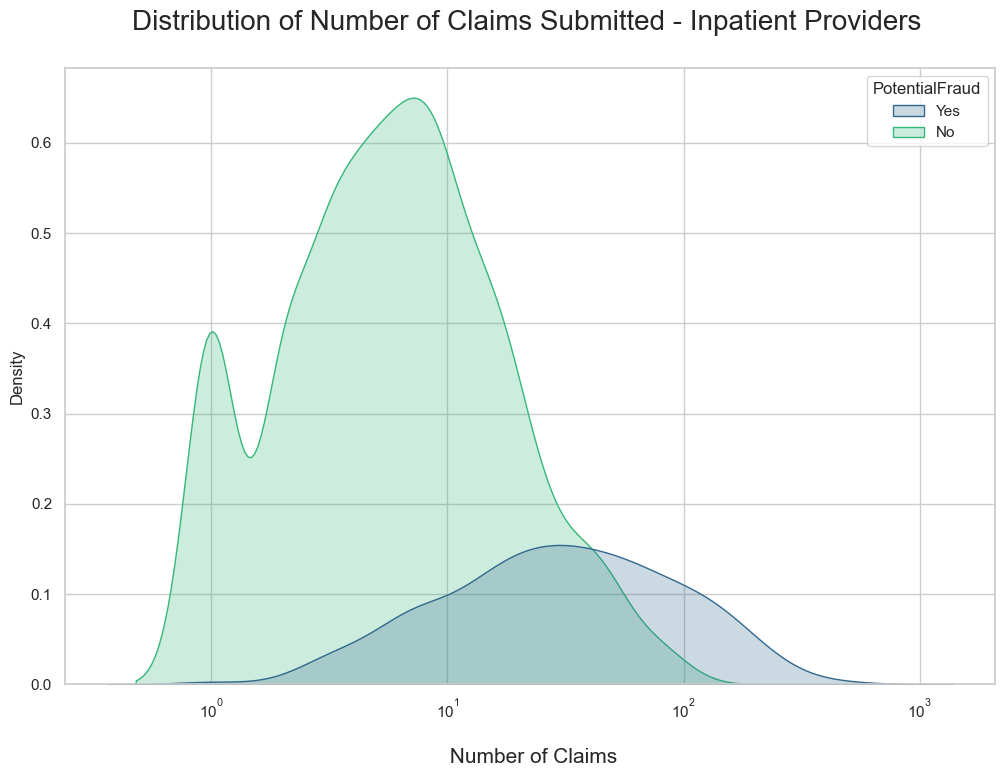

In [39]:
# Density Plot

# Plotting the results 
plt.figure(figsize=(12, 8))
sns.kdeplot(data=in_prov_clm_df, x="No. of Claims", hue="PotentialFraud", fill=True, log_scale=True, palette='viridis')

# Formatting
plt.xlabel("\n Number of Claims", fontsize=15)
plt.title("Distribution of Number of Claims Submitted - Inpatient Providers \n", fontsize=20)

plt.show()


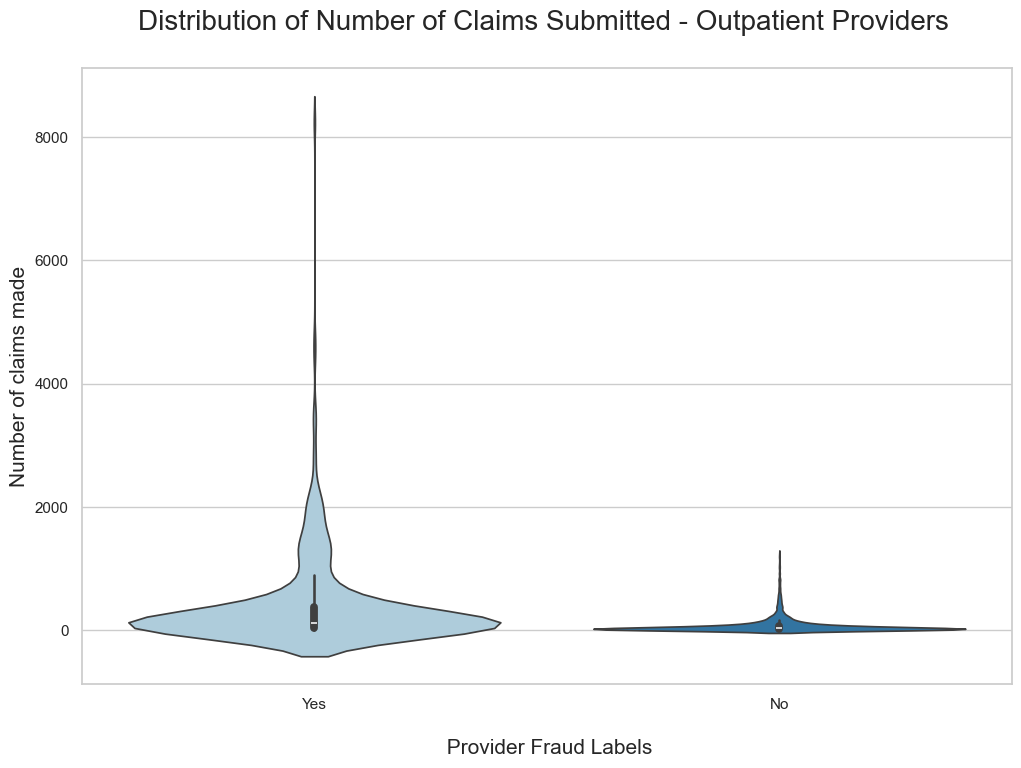

In [40]:
# Outpatient Data

# Create df to number of claims per provider and add fraud labels
out_prov_clm_df = (outpatient_df.groupby('Provider')['ClaimID']
                  .count()
                  .reset_index(name='No. of Claims')
                  .sort_values(by='No. of Claims', ascending=False)
                  .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="No. of Claims", data=out_prov_clm_df, palette='Paired')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Number of claims made", fontsize=15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers \n", fontsize=20)
plt.show()


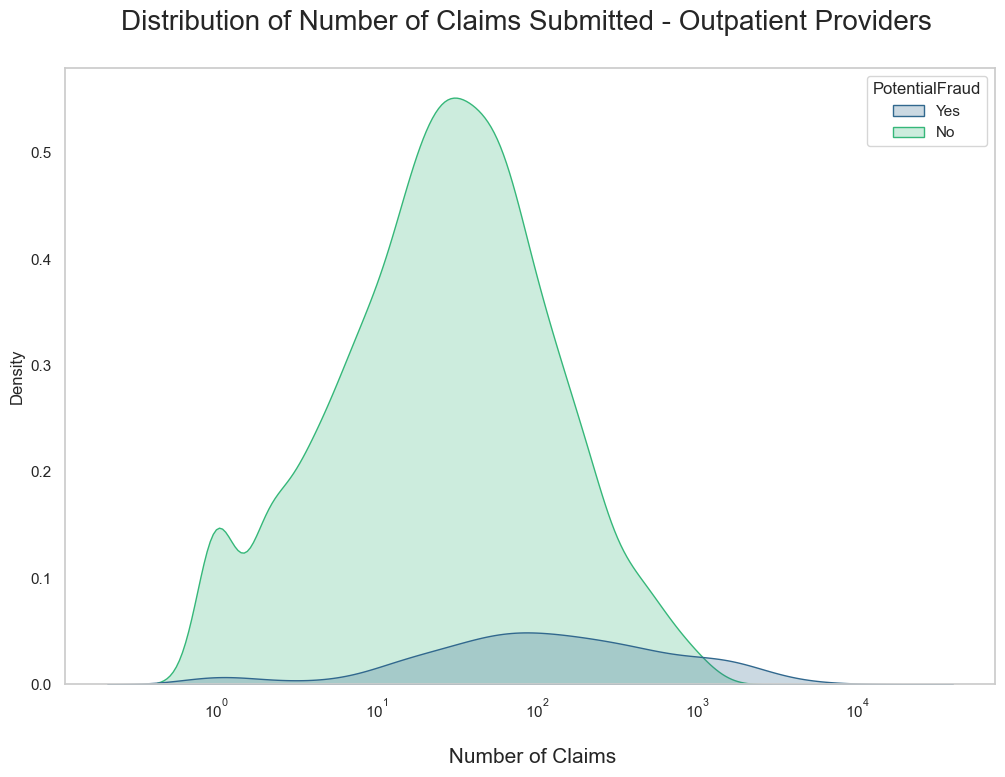

In [41]:
# Plotting the results 
plt.figure(figsize=(12, 8))
sns.kdeplot(data=out_prov_clm_df, x="No. of Claims", hue="PotentialFraud", fill=True, log_scale=True, palette='viridis')

# Formatting
plt.xlabel("\n Number of Claims", fontsize=15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers \n", fontsize=20)
plt.grid(False)
plt.show()

### Average Diagnosis Code Count for fraud and non-fraud providers

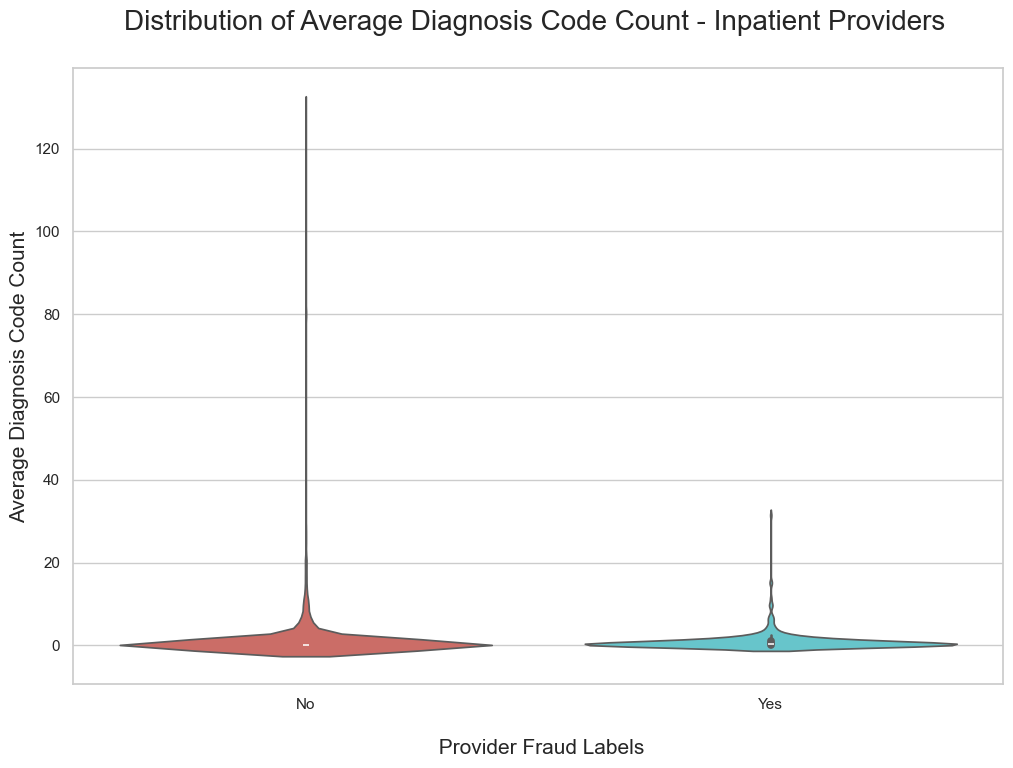

In [42]:
# Calculate average Diagnosis Code Count per provider and add fraud labels
in_diag_code = (inpatient_df.groupby('Provider')['Diag_Code_Cnt']
                .mean()
                .reset_index(name='Diag_Code_Cnt')
                .sort_values(by='Diag_Code_Cnt', ascending=False)
                .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Diag_Code_Cnt", data=in_diag_code, palette='hls')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Diagnosis Code Count", fontsize=15)
plt.title("Distribution of Average Diagnosis Code Count - Inpatient Providers \n", fontsize=20)
plt.show()


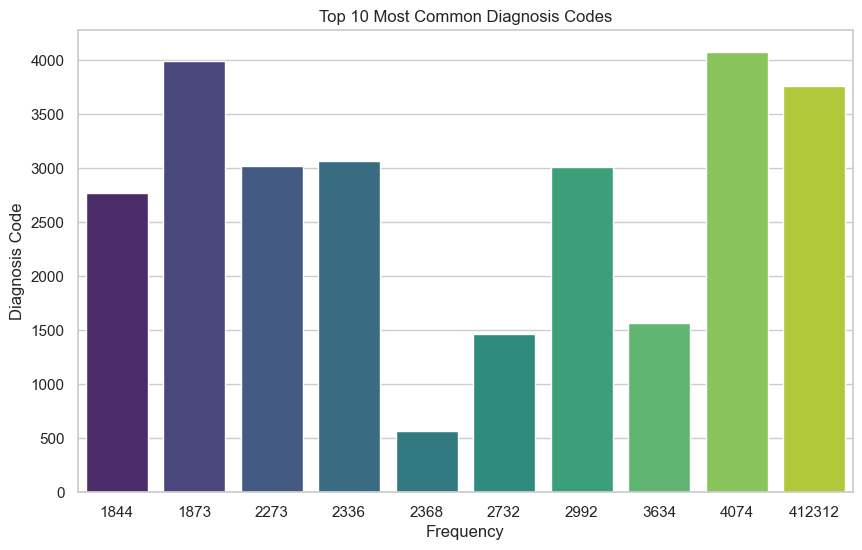

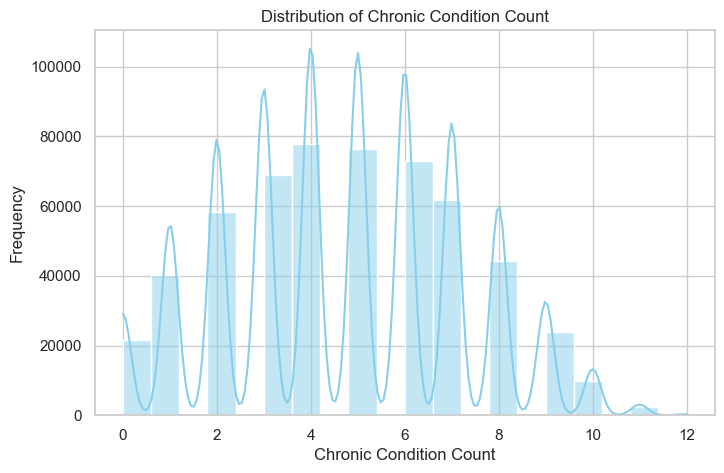

In [43]:
# Drop rows with missing values in relevant columns
train_df.dropna(subset=["ClmAdmitDiagnosisCode", "Chr_Cond_Count", "PotentialFraud"], inplace=True)

# Filter data based on PotentialFraud values
potential_fraud_data = train_df[train_df["PotentialFraud"] == "Yes"]
non_fraud_data = train_df[train_df["PotentialFraud"] == "No"]


# Analysis of Claim Admit Diagnosis Code
# Plot the frequency distribution of the most common diagnosis codes
top_diagnosis_codes = train_df["ClmAdmitDiagnosisCode"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_diagnosis_codes.values, y=top_diagnosis_codes.index, palette="viridis")
plt.title("Top 10 Most Common Diagnosis Codes")
plt.xlabel("Frequency")
plt.ylabel("Diagnosis Code")
plt.show()

# Analysis of Chronic Condition Count
# Plot the distribution of chronic condition counts
plt.figure(figsize=(8, 5))
sns.histplot(train_df["Chr_Cond_Count"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Chronic Condition Count")
plt.xlabel("Chronic Condition Count")
plt.ylabel("Frequency")
plt.show()

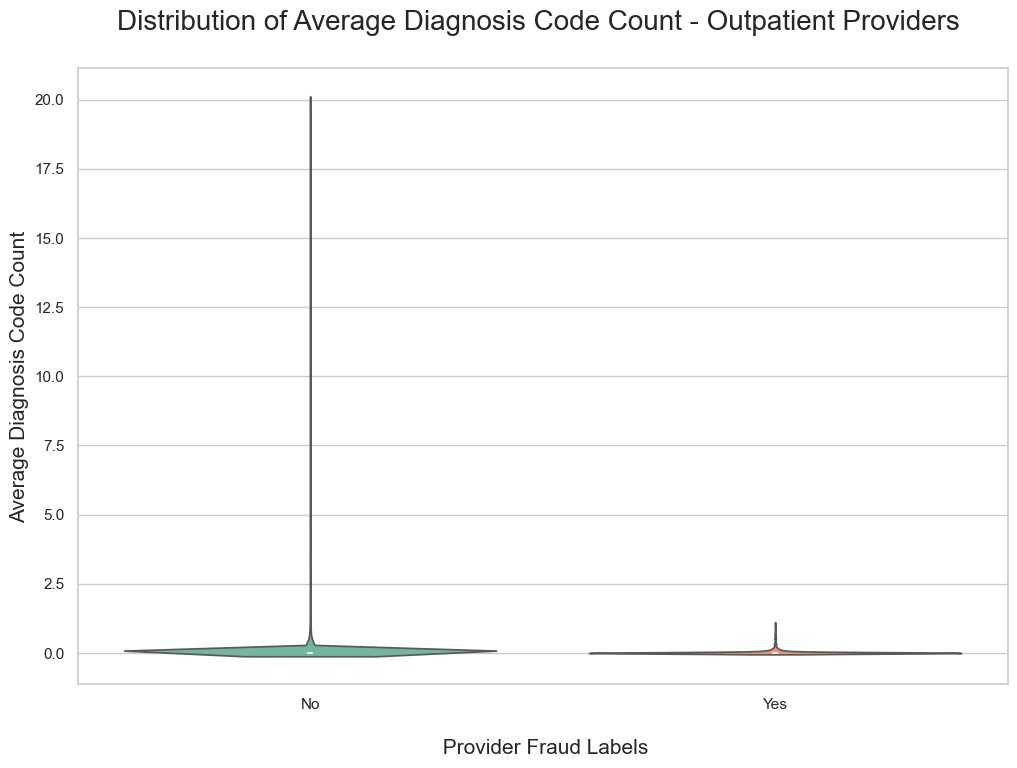

In [44]:
# Calculate average Diagnosis Code Count per provider and add fraud labels
out_diag_code = (outpatient_df.groupby('Provider')['Diag_Code_Cnt']
                .mean()
                .reset_index(name='Diag_Code_Cnt')
                .sort_values(by='Diag_Code_Cnt', ascending=False)
                .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Diag_Code_Cnt", data=out_diag_code, palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Diagnosis Code Count", fontsize=15)
plt.title("Distribution of Average Diagnosis Code Count - Outpatient Providers \n", fontsize=20)
plt.show()


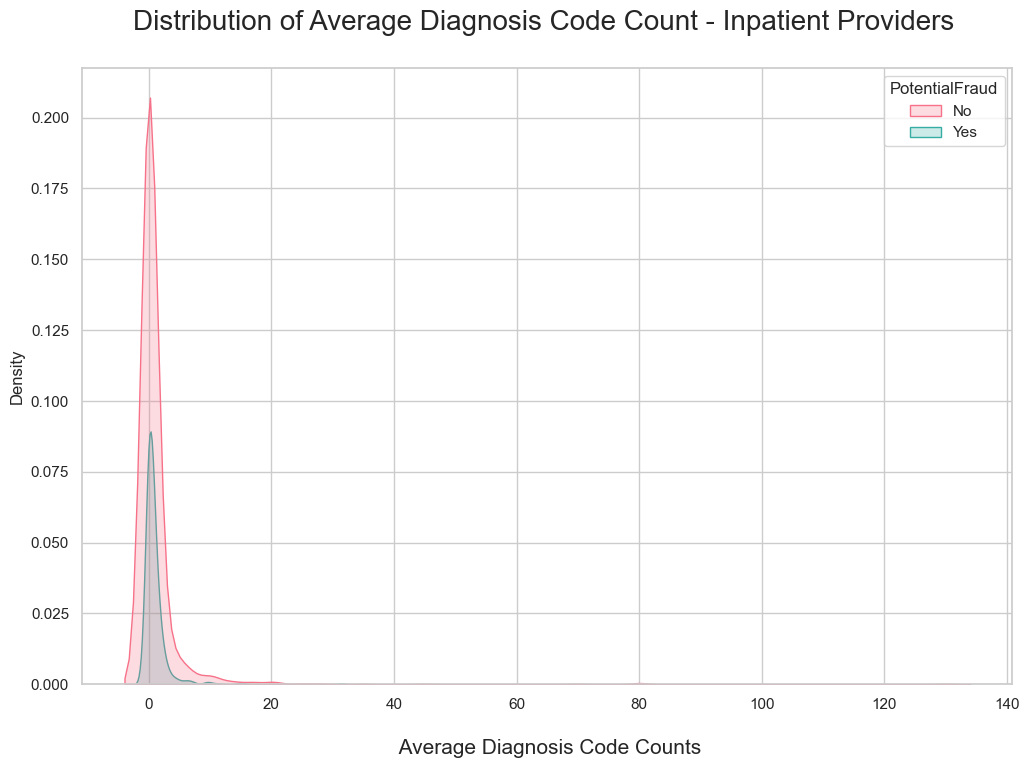

In [45]:
# Plotting the results
plt.figure(figsize = (12,8))
sns.kdeplot(data=in_diag_code, x="Diag_Code_Cnt", hue="PotentialFraud", fill=True, palette='husl')
plt.xlabel("\n Average Diagnosis Code Counts", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Inpatient Providers \n", fontsize = 20)
plt.show()



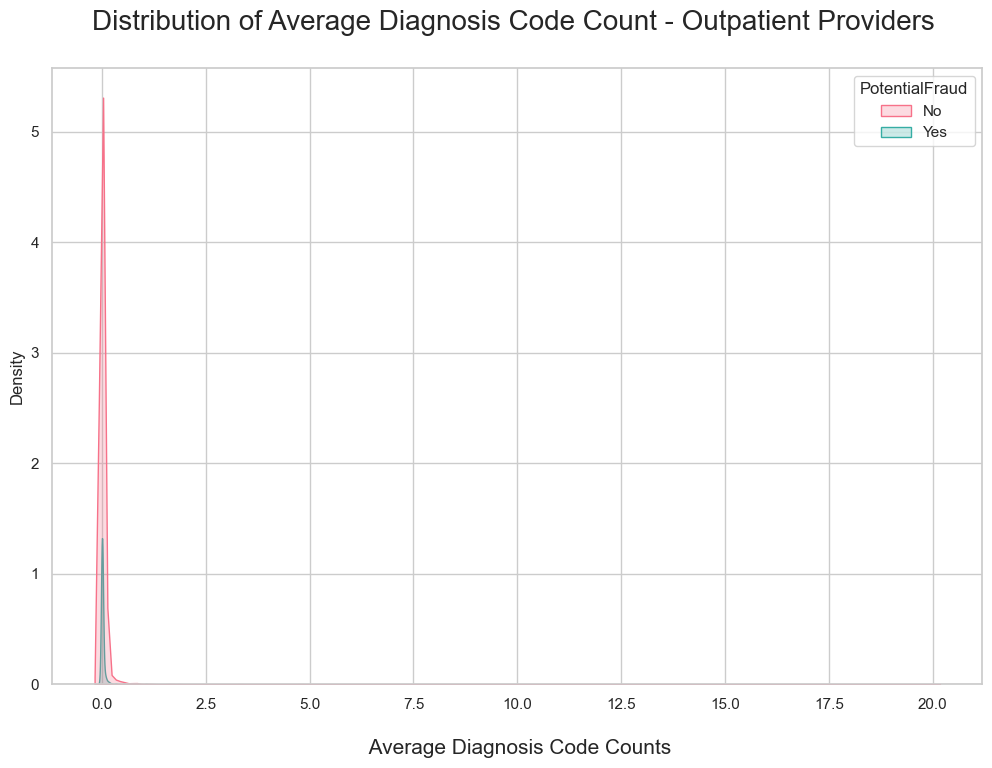

In [46]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_diag_code, x="Diag_Code_Cnt", hue="PotentialFraud", fill=True, palette='husl')
plt.xlabel("\n Average Diagnosis Code Counts", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Outpatient Providers \n", fontsize = 20)
plt.show()


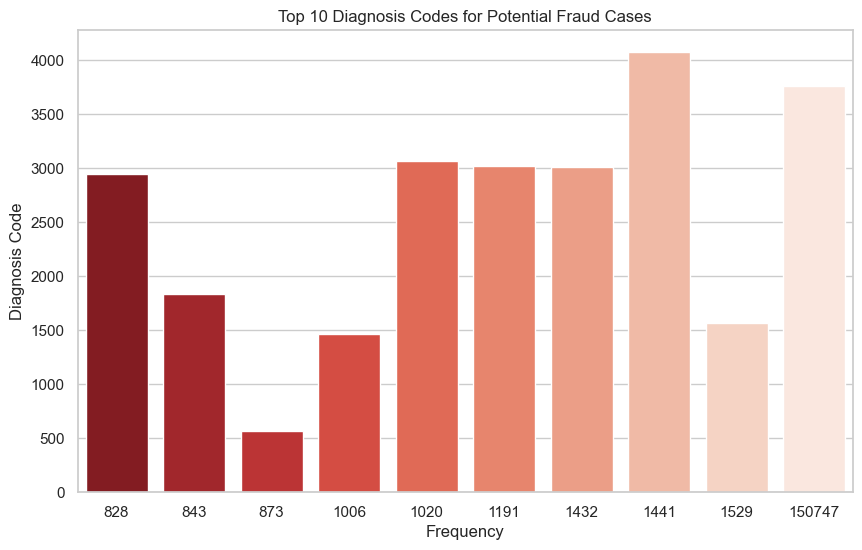

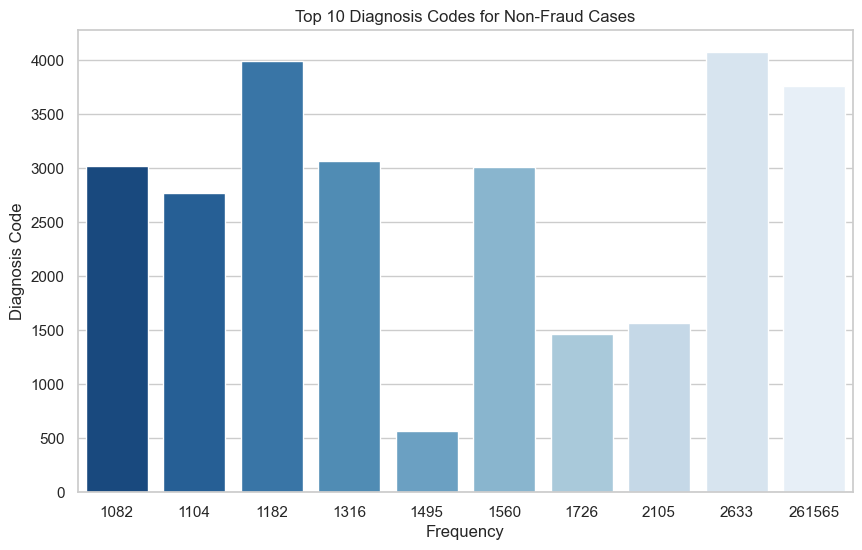

In [47]:
# Drop rows with missing values in relevant columns
train_df.dropna(subset=["ClmAdmitDiagnosisCode",  "PotentialFraud"], inplace=True)

# Filter data based on PotentialFraud values
potential_fraud_data = train_df[train_df["PotentialFraud"] == "Yes"]
non_fraud_data = train_df[train_df["PotentialFraud"] == "No"]

# Get the top 10 most common diagnosis codes for potential fraud
top_diagnosis_codes_fraud = potential_fraud_data["ClmAdmitDiagnosisCode"].value_counts().head(10)

# Get the top 10 most common diagnosis codes for non-fraud cases
top_diagnosis_codes_non_fraud = non_fraud_data["ClmAdmitDiagnosisCode"].value_counts().head(10)

# Plot the frequency distribution of diagnosis codes for potential fraud
plt.figure(figsize=(10, 6))
sns.barplot(x=top_diagnosis_codes_fraud.values, y=top_diagnosis_codes_fraud.index, palette="Reds_r")
plt.title("Top 10 Diagnosis Codes for Potential Fraud Cases")
plt.xlabel("Frequency")
plt.ylabel("Diagnosis Code")
plt.show()

# Plot the frequency distribution of diagnosis codes for non-fraud cases
plt.figure(figsize=(10, 6))
sns.barplot(x=top_diagnosis_codes_non_fraud.values, y=top_diagnosis_codes_non_fraud.index, palette="Blues_r")
plt.title("Top 10 Diagnosis Codes for Non-Fraud Cases")
plt.xlabel("Frequency")
plt.ylabel("Diagnosis Code")
plt.show()

### Average Procedure Code Count for fraud and non-fraud providers

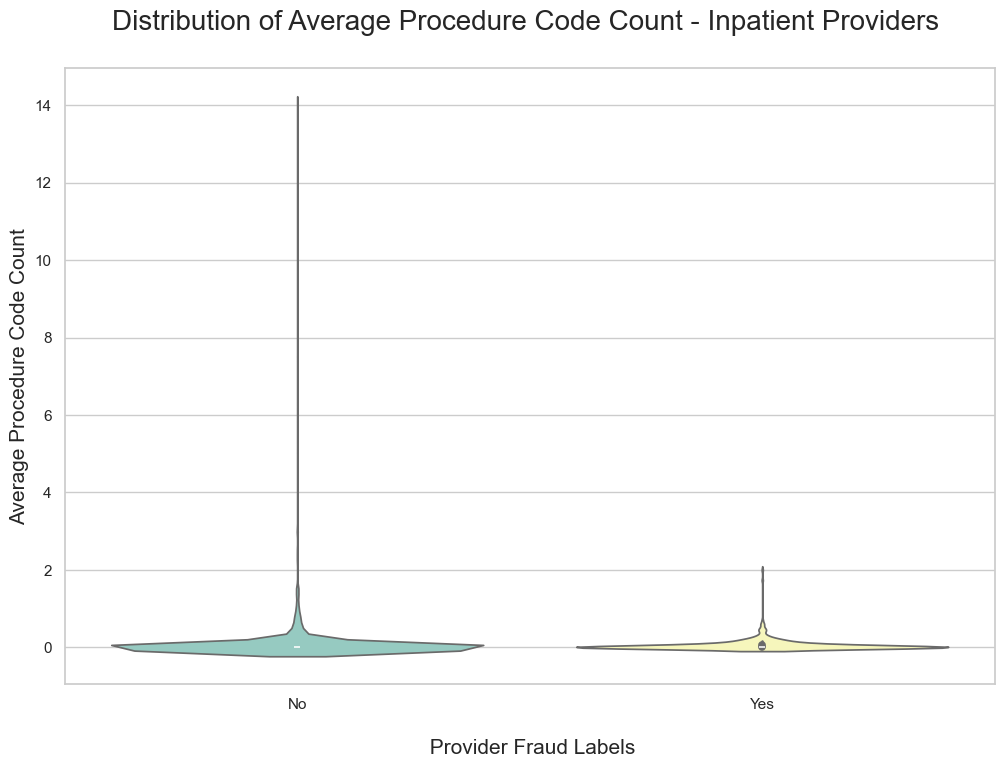

In [48]:
# Inpatient Data

# Calculate average Procedure Code Count per provider and add fraud labels
in_proc_code = (inpatient_df.groupby('Provider')['Proc_Code_Cnt']
                .mean()
                .reset_index(name='Proc_Code_Cnt')
                .sort_values(by='Proc_Code_Cnt', ascending=False)
                .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Proc_Code_Cnt", data=in_proc_code, palette='Set3')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Procedure Code Count", fontsize=15)
plt.title("Distribution of Average Procedure Code Count - Inpatient Providers \n", fontsize=20)
plt.show()


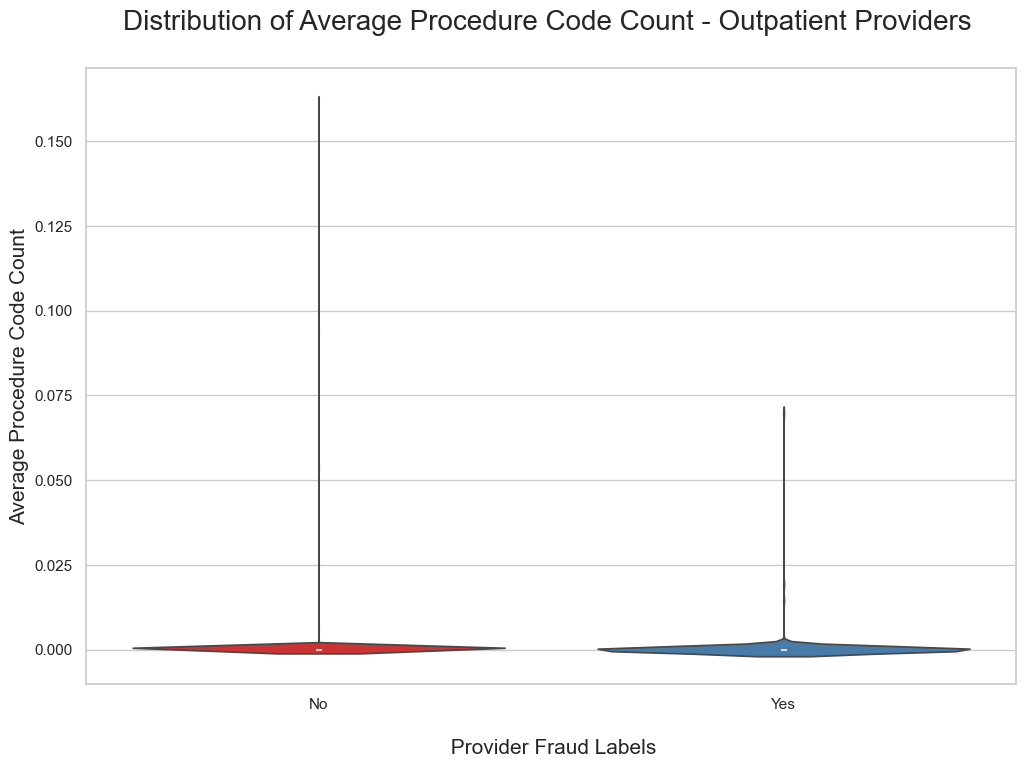

In [49]:
# Outpatient Data

# Calculate average Procedure Code Count per provider and add fraud labels
out_proc_code = (outpatient_df.groupby('Provider')['Proc_Code_Cnt']
                .mean()
                .reset_index(name='Proc_Code_Cnt')
                .sort_values(by='Proc_Code_Cnt', ascending=False)
                .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Proc_Code_Cnt", data=out_proc_code, palette='Set1')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Procedure Code Count", fontsize=15)
plt.title("Distribution of Average Procedure Code Count - Outpatient Providers \n", fontsize=20)
plt.show()

### Claim duration for fraud/non-fraud providers

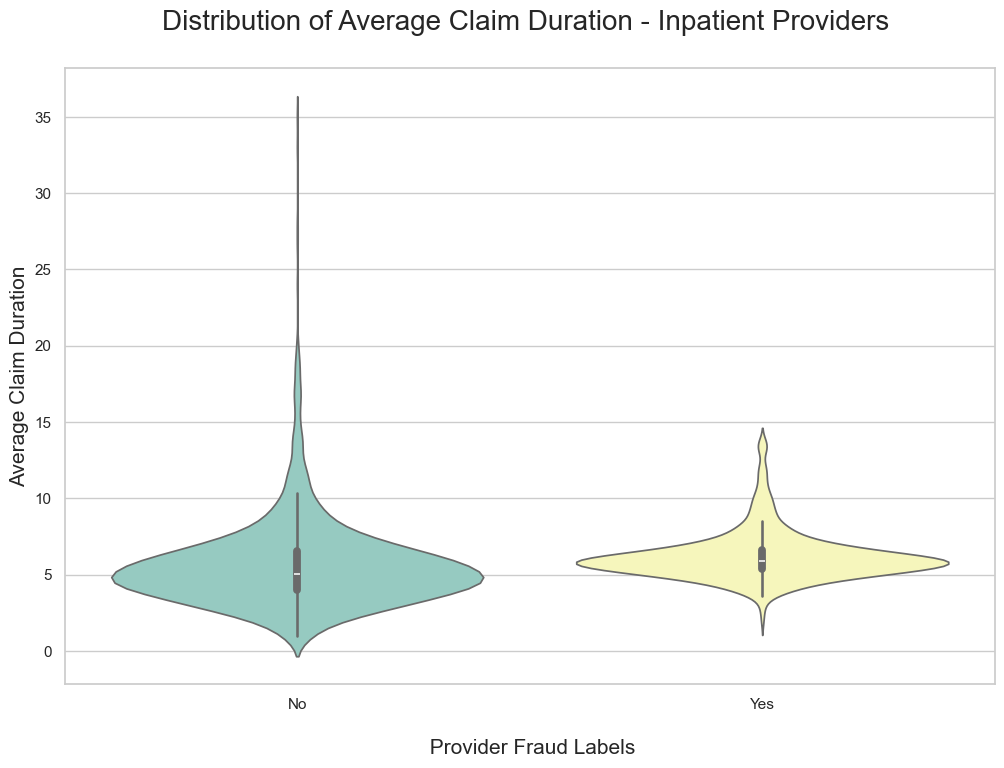

In [50]:
# Inpatient = looking at average Claim duration per provider: 

# Calculate average Claim Duration per provider and add fraud labels
in_clm_dur = (inpatient_df.groupby('Provider')['Claim_Duration']
              .mean()
              .reset_index(name='Claim_Duration')
              .sort_values(by='Claim_Duration', ascending=False)
              .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Claim_Duration", data=in_clm_dur, palette='Set3')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Claim Duration", fontsize=15)
plt.title("Distribution of Average Claim Duration - Inpatient Providers \n", fontsize=20)
plt.show()


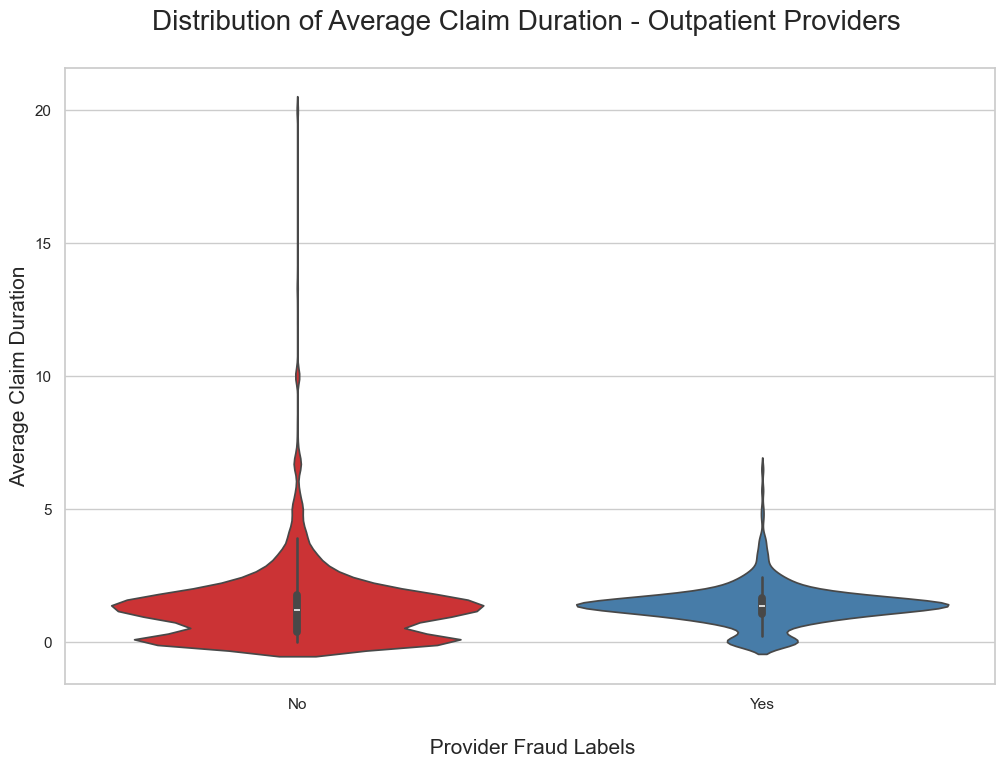

In [51]:
# Outpatient Data

# Calculate average Claim Duration per provider and add fraud labels
out_clm_dur = (outpatient_df.groupby('Provider')['Claim_Duration']
              .mean()
              .reset_index(name='Claim_Duration')
              .sort_values(by='Claim_Duration', ascending=False)
              .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Claim_Duration", data=out_clm_dur, palette='Set1')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Claim Duration", fontsize=15)
plt.title("Distribution of Average Claim Duration - Outpatient Providers \n", fontsize=20)
plt.show()

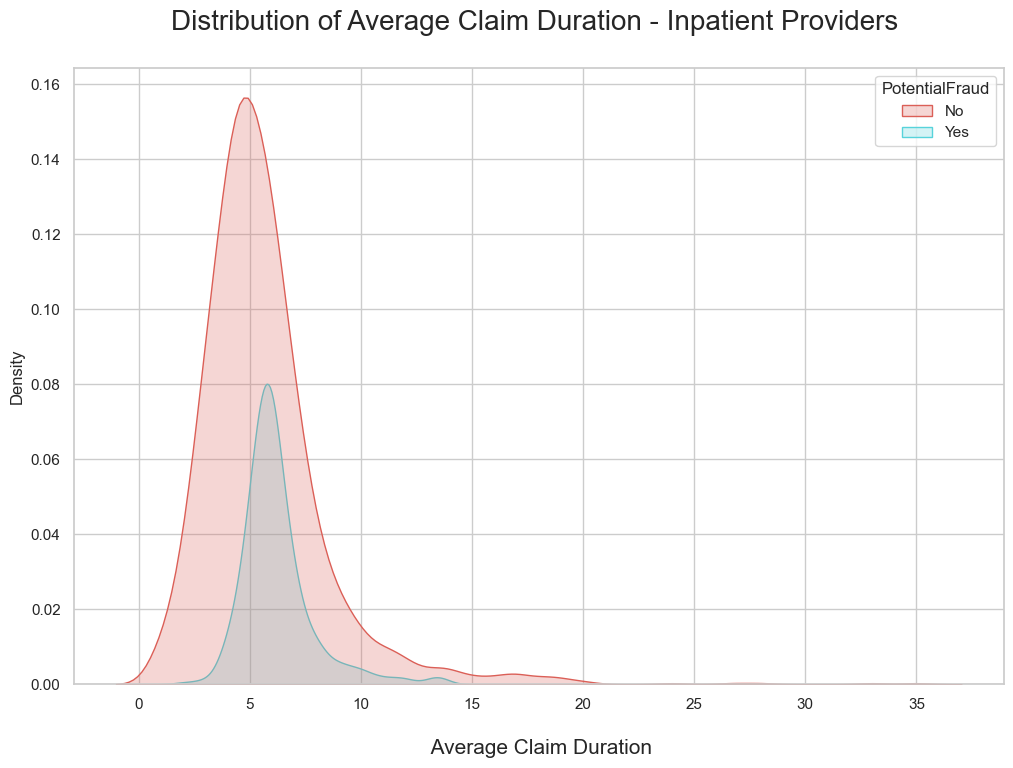

In [52]:
# Plotting the results
plt.figure(figsize = (12,8))
sns.kdeplot(data=in_clm_dur, x="Claim_Duration", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Inpatient Providers \n", fontsize = 20)
plt.show()


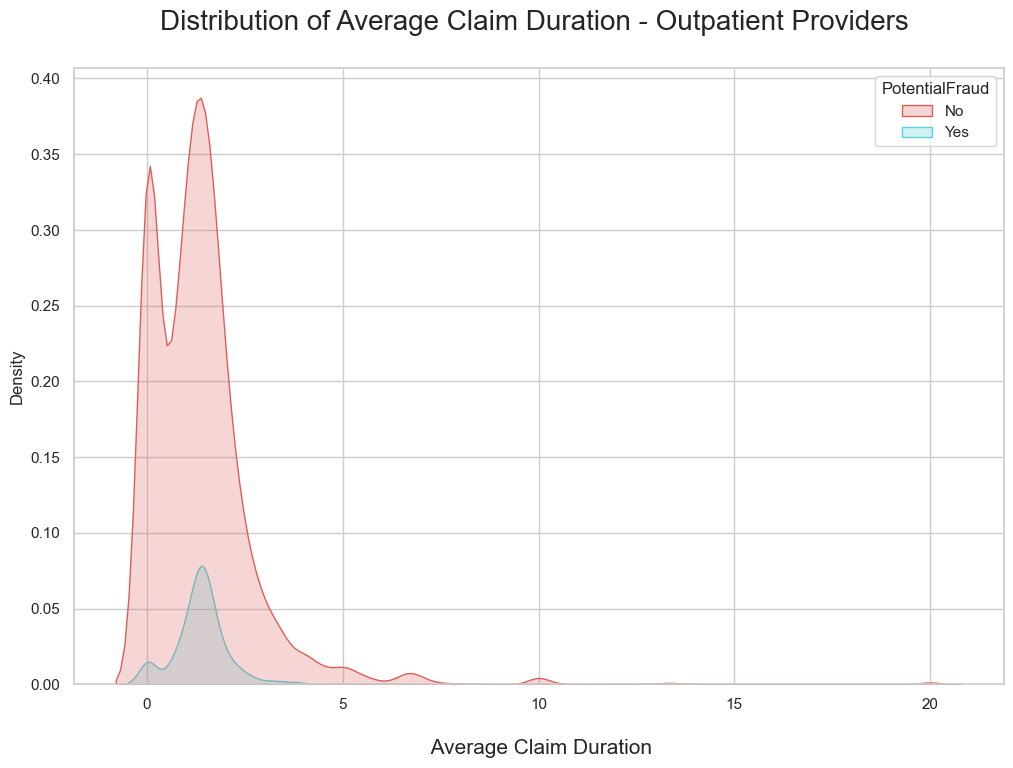

In [53]:
# Plotting the results
plt.figure(figsize = (12,8))
sns.kdeplot(data=out_clm_dur, x="Claim_Duration", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Outpatient Providers \n", fontsize = 20)
plt.show()


### Average patient age for fraud/non-fraud providers

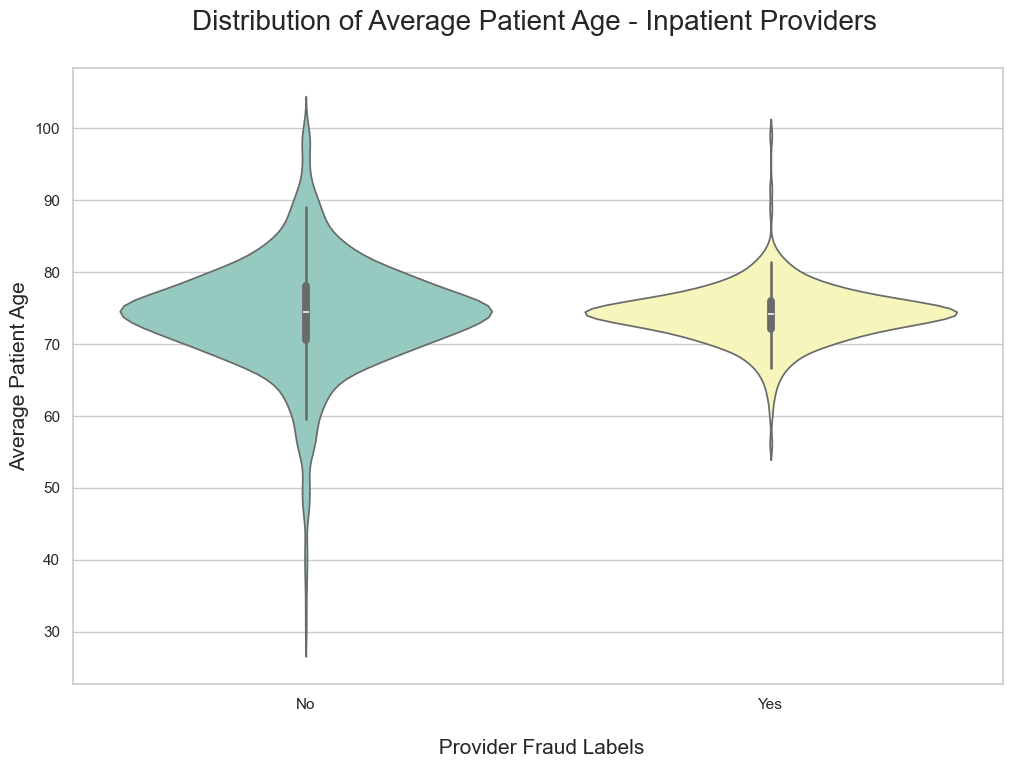

In [54]:
# Inpatient Data

in_pat_age = (inpatient_df.groupby('Provider')['Age']
              .mean()
              .reset_index(name='Age')
              .sort_values(by='Age', ascending=False)
              .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Age", data=in_pat_age, palette='Set3')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Patient Age", fontsize=15)
plt.title("Distribution of Average Patient Age - Inpatient Providers \n", fontsize=20)
plt.show()


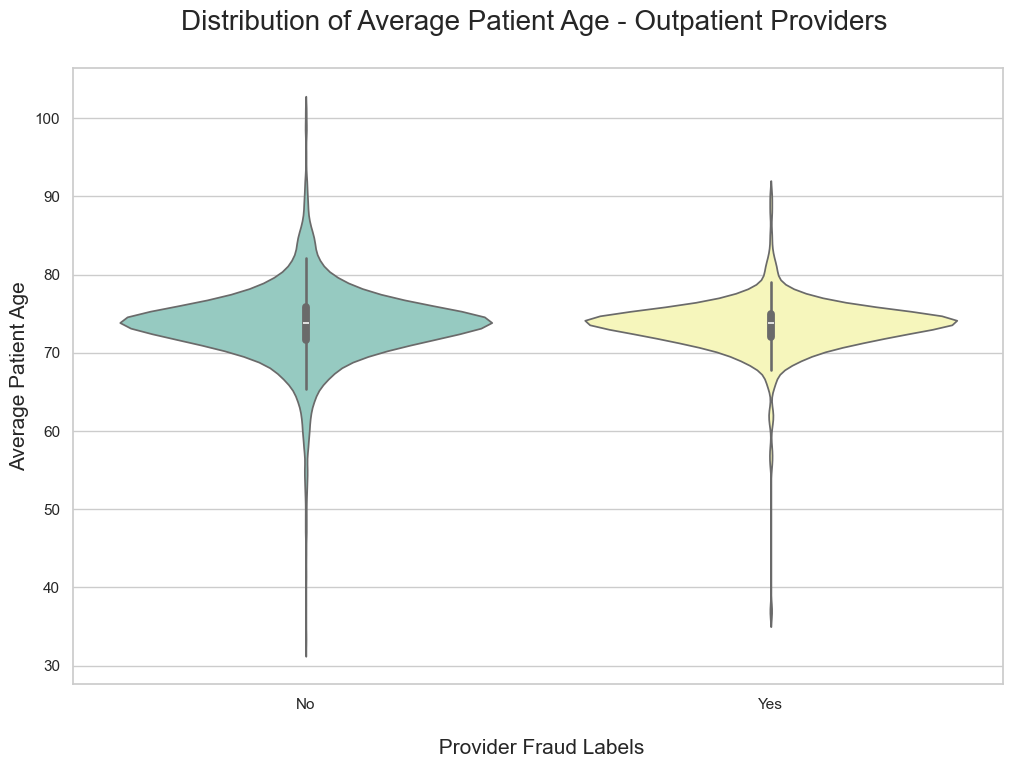

In [55]:
# Outpatient Data
out_pat_age = (outpatient_df.groupby('Provider')['Age']
              .mean()
              .reset_index(name='Age')
              .sort_values(by='Age', ascending=False)
              .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Age", data=out_pat_age, palette='Set3')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Patient Age", fontsize=15)
plt.title("Distribution of Average Patient Age - Outpatient Providers \n", fontsize=20)
plt.show()

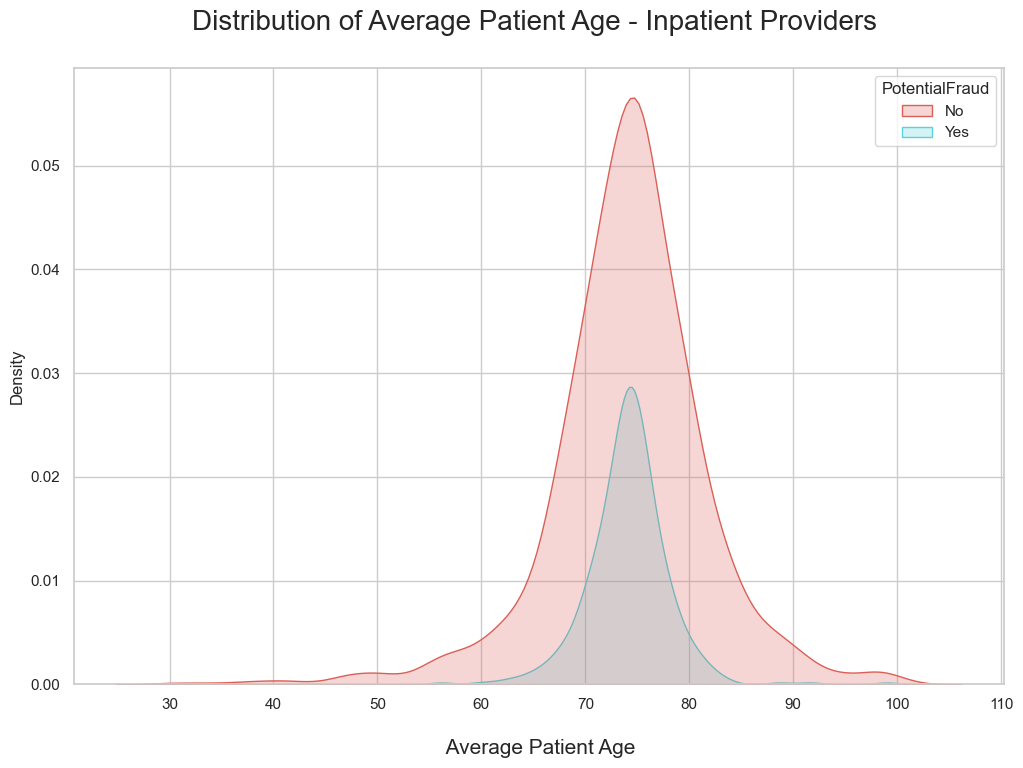

In [56]:
# Plotting the results
plt.figure(figsize = (12,8))
sns.kdeplot(data=in_pat_age, x="Age", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Inpatient Providers \n", fontsize = 20)
plt.show()


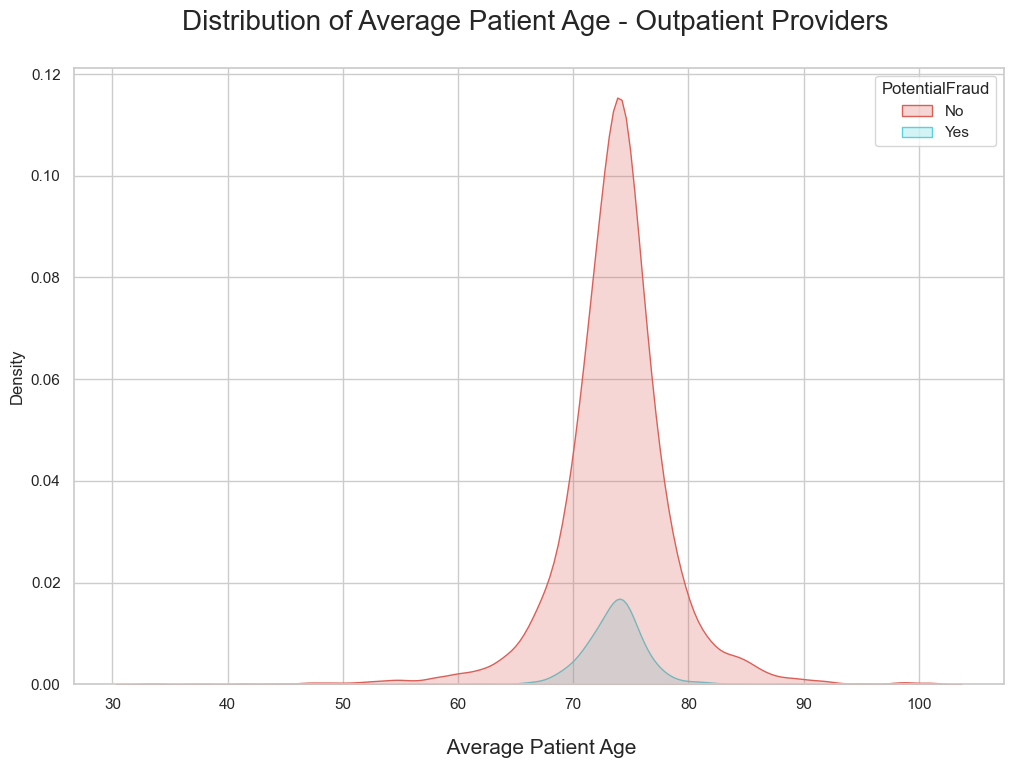

In [57]:
# Plotting the results
plt.figure(figsize = (12,8))
sns.kdeplot(data=out_pat_age, x="Age", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Outpatient Providers \n", fontsize = 20)
plt.show()


### Correlation matrix 


In [58]:
# Using only certain features from the complete set

inp_corr = inpatient_df[['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',\
                   'Deceased', 'Age', 'Tot_Reimbursed_Amt','Tot_Deductible_Amt',\
                   'DOB_year','DOB_month', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
                   'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay','Claim_Duration',\
                   'Claim_Start_Year', 'Claim_Start_Month', 'Insurance_Covered_Per',\
                   'Total_Claim_Amt', 'Physician_Count', 'Claim_Count', 'Hospital_Count',\
                   'Chr_Cond_Count']]

out_corr= inpatient_df[['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',\
                   'Deceased', 'Age', 'Tot_Reimbursed_Amt','Tot_Deductible_Amt',\
                   'DOB_year','DOB_month', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
                   'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay','Claim_Duration',\
                   'Claim_Start_Year', 'Claim_Start_Month', 'Insurance_Covered_Per',\
                   'Total_Claim_Amt', 'Physician_Count', 'Claim_Count', 'Hospital_Count',\
                   'Chr_Cond_Count']]



<Axes: >

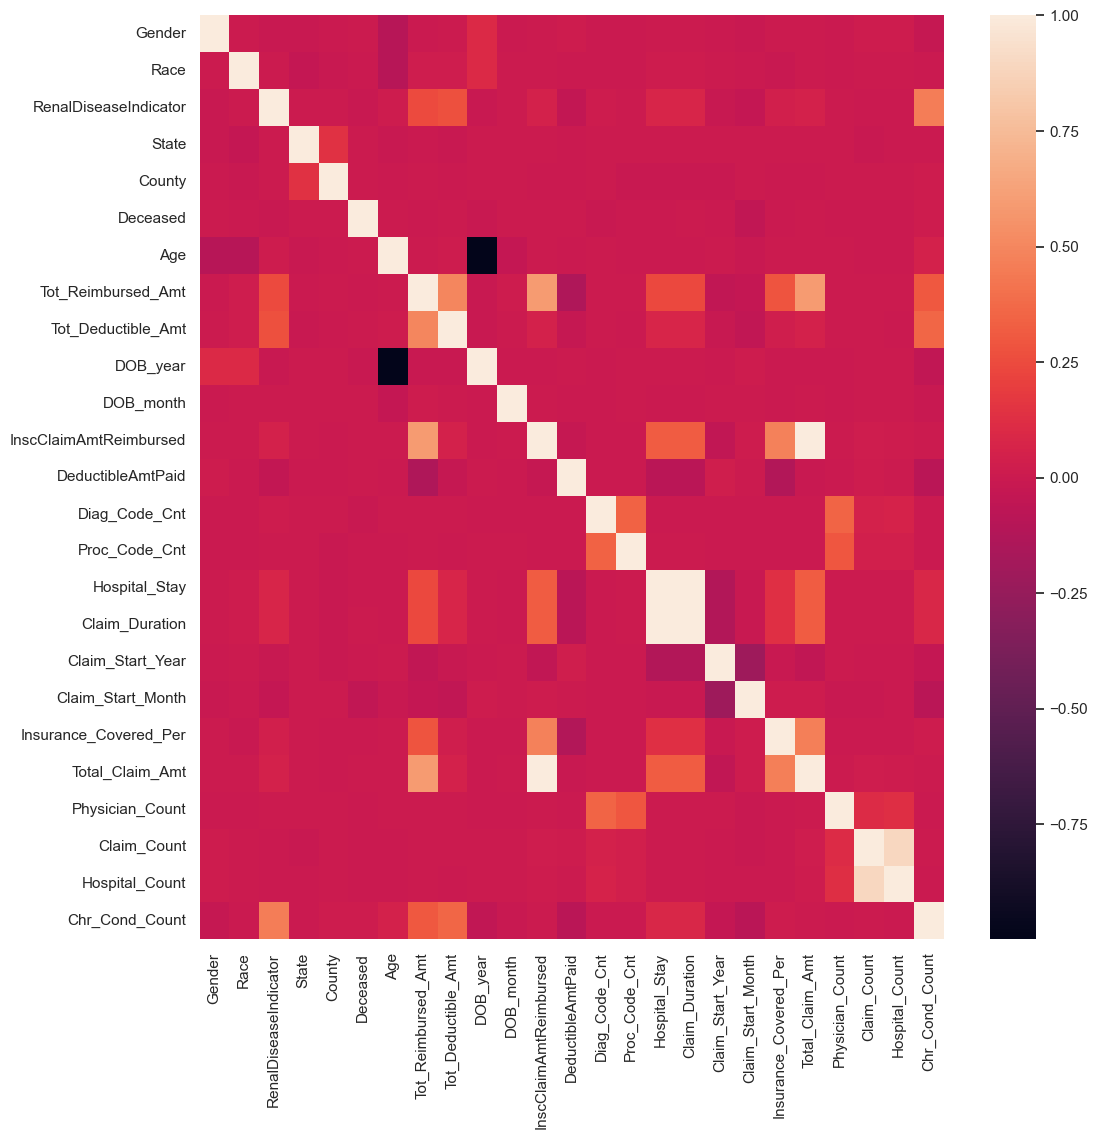

In [59]:
# Inpatient dataset correlation map
plt.figure(figsize=(12, 12))
sns.heatmap(inp_corr.corr())

<Axes: >

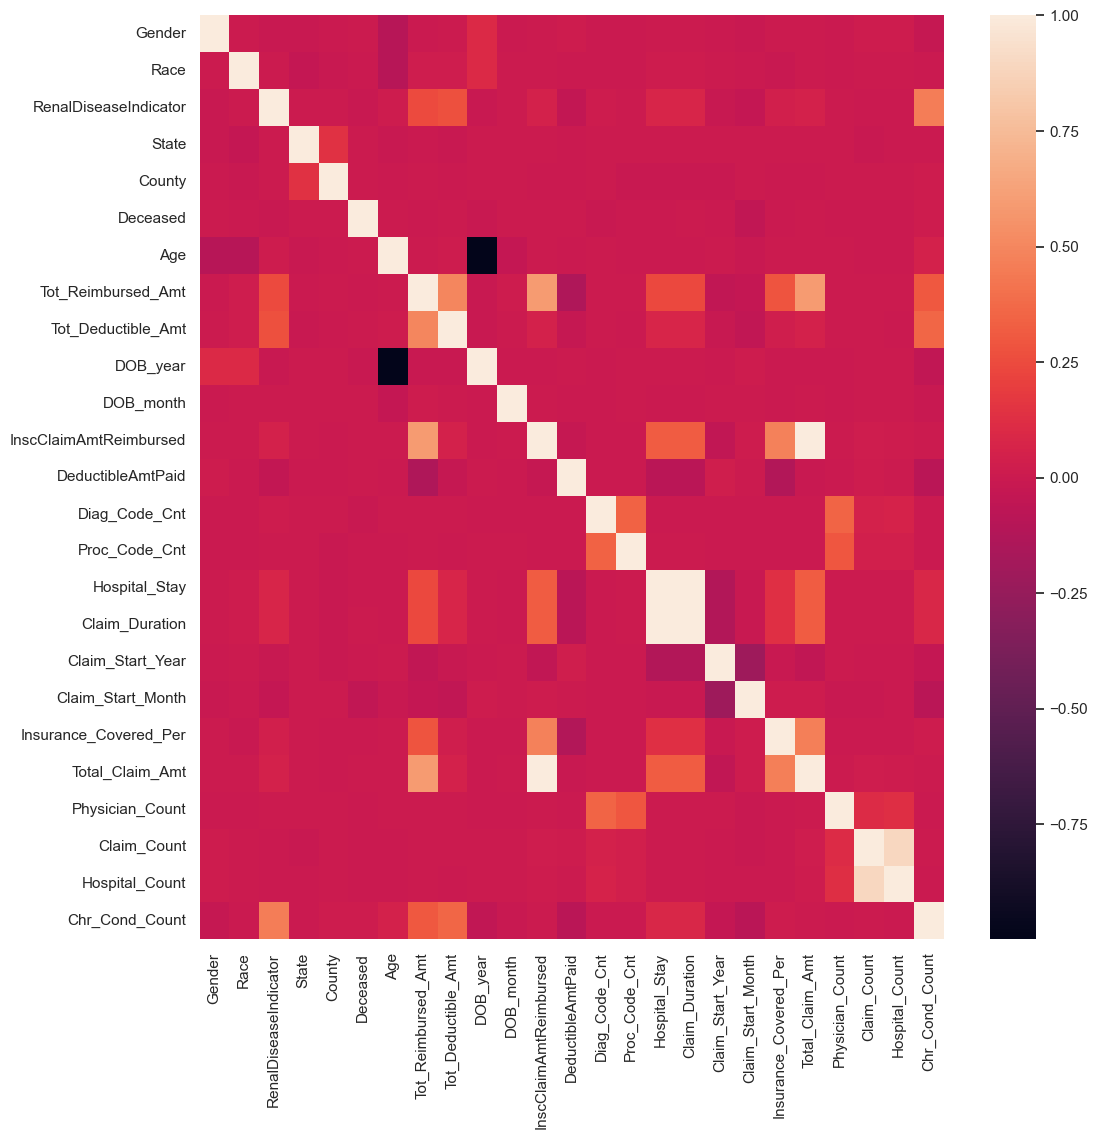

In [60]:
# Outpatient dataset correlation map
plt.figure(figsize=(12, 12))
sns.heatmap(out_corr.corr())


---
### Additional EDA cont...
---

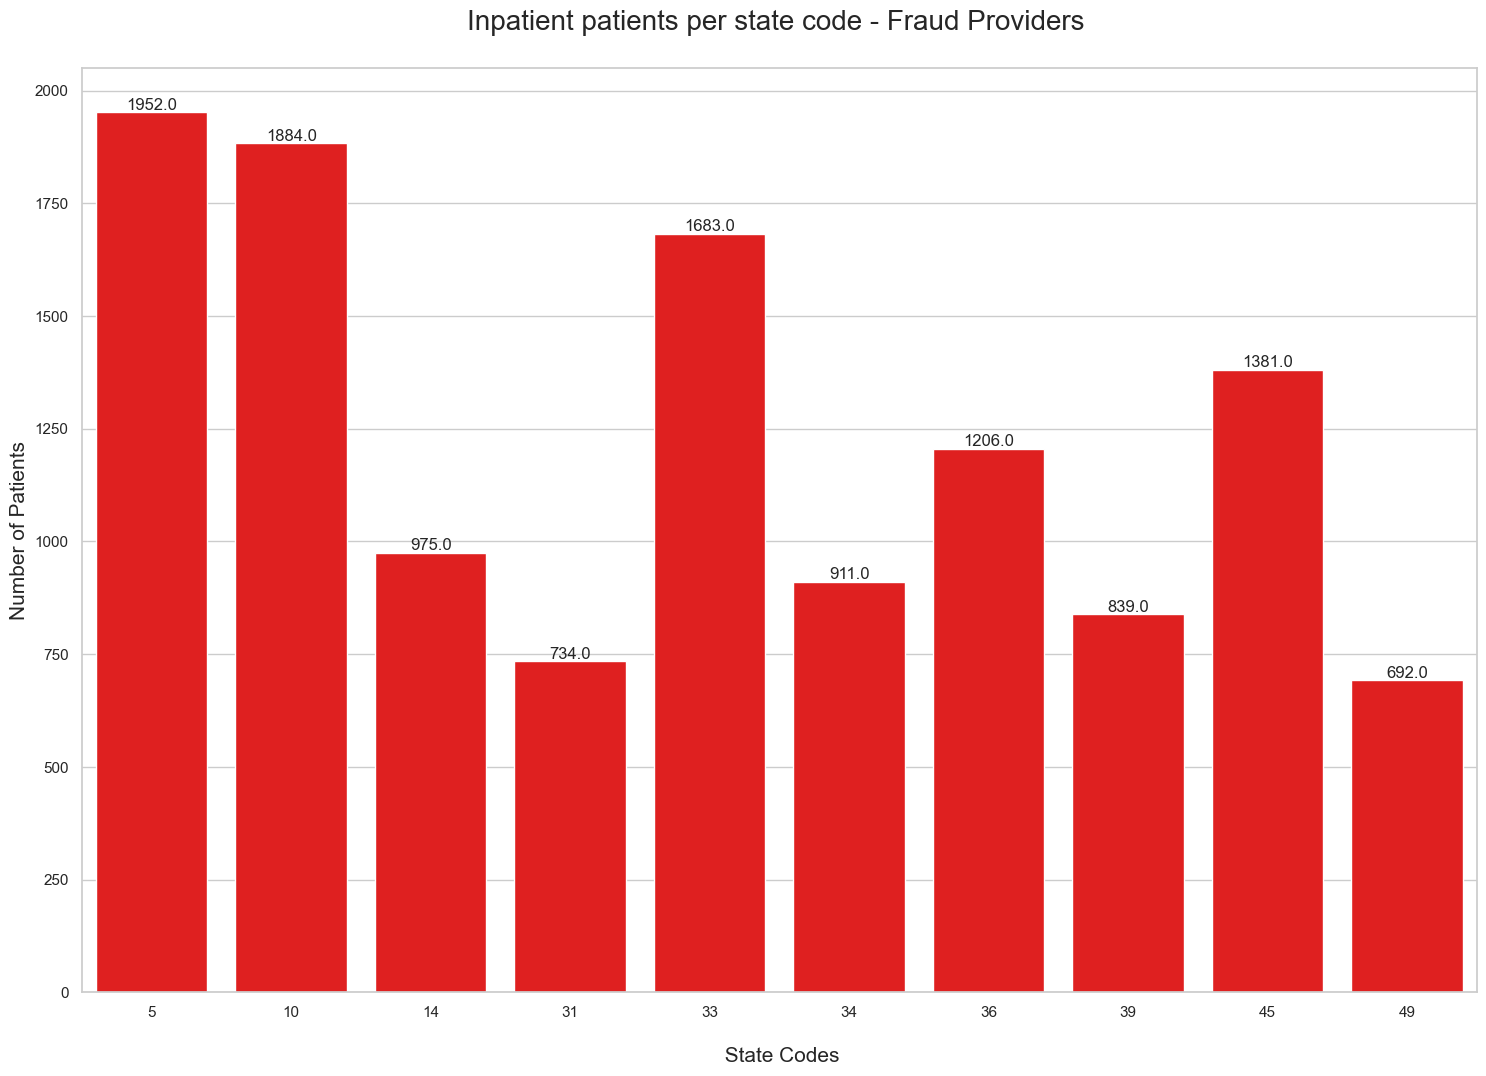

In [61]:
# Selecting Inpatient patients from Fraud Providers, counting occurrences per state code

df1 = inpatient_df.loc[inpatient_df['PotentialFraud'] == 'Yes', 'State'].value_counts().head(10).reset_index()
df1.columns = ['State_Code', 'No. of Patients']

# Graphically presenting the results
plt.figure(figsize=(18, 12))
sns.set_theme(style='whitegrid')

# Plotting barplot with values
splot = sns.barplot(x="State_Code", y="No. of Patients", data=df1, color="red")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   size=12,
                   xytext=(0, 5), 
                   textcoords='offset points')

# Additional formatting
plt.xlabel("\n State Codes", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.title("Inpatient patients per state code - Fraud Providers \n", fontsize=20)
plt.show()


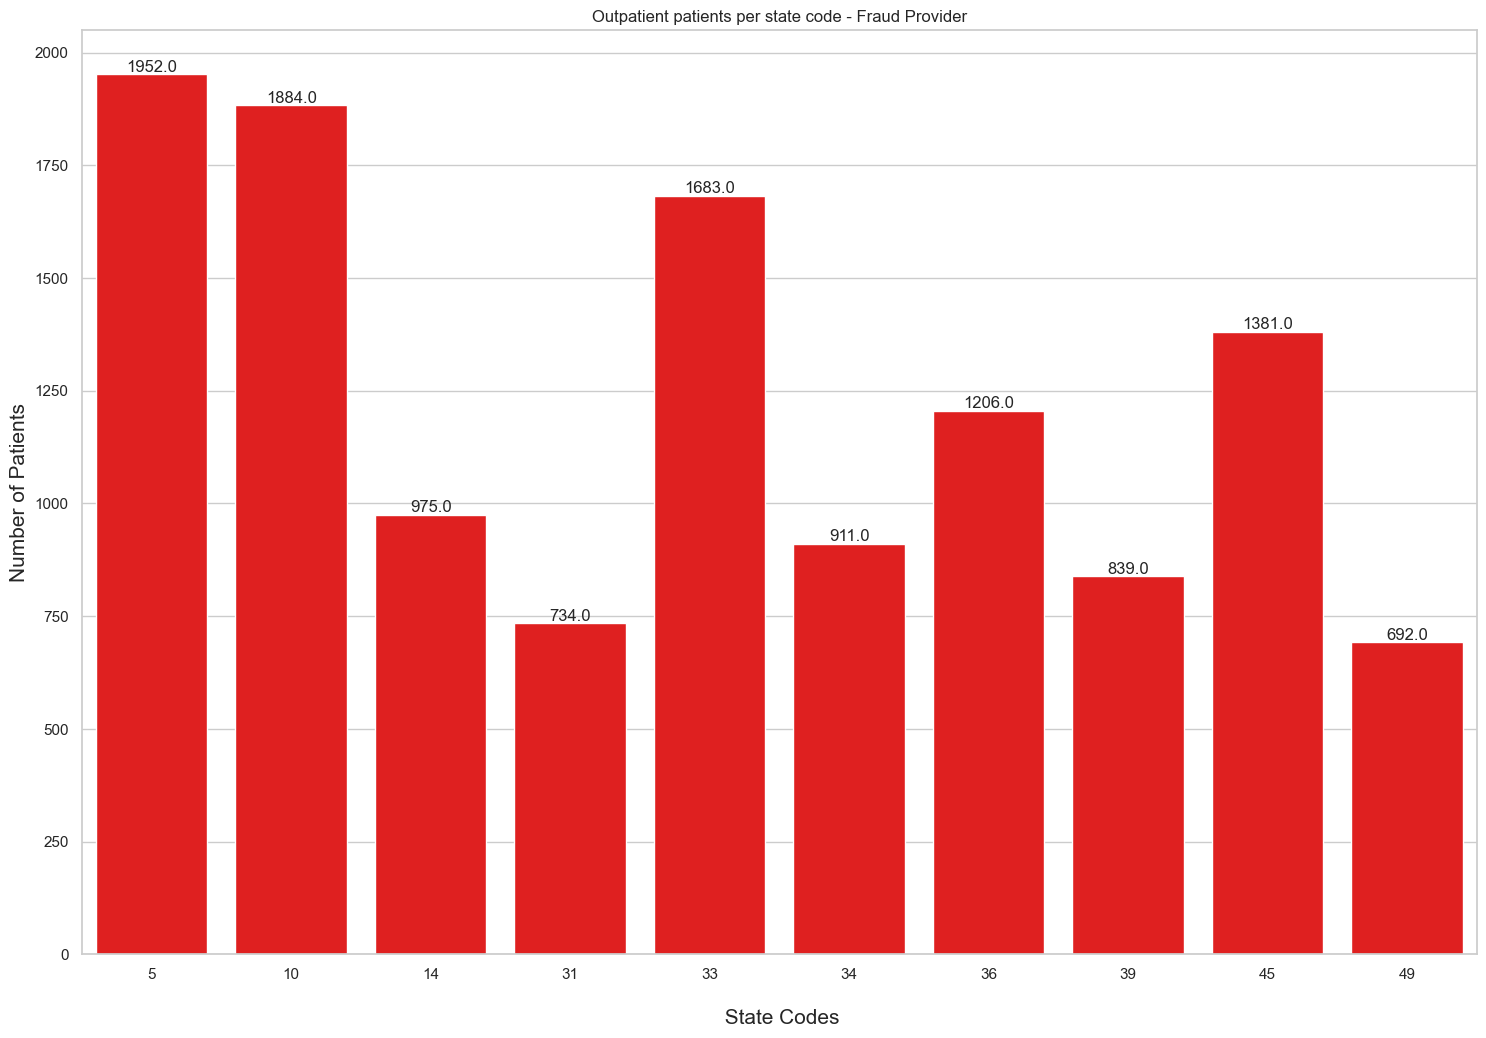

In [62]:
# Selecting Outpatient patients from Fraud Providers, counting occurrences per state code

df2 = outpatient_df.loc[outpatient_df['PotentialFraud'] == 'Yes', 'State'].value_counts().head(10).reset_index()
df2.columns = ['State_Code', 'No. of Patients']

# Graphically presenting the results
plt.figure(figsize=(18, 12))
sns.set_theme(style='whitegrid')

# Plotting barplot with values
splot = sns.barplot(x="State_Code", y="No. of Patients", data=df1, color="Red")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   size=12,
                   xytext=(0, 5), 
                   textcoords='offset points')

# Additional formatting
plt.xlabel("\n State Codes", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.title("Outpatient patients per state code - Fraud Provider")
plt.show()

### Gender - Looking at patient genders for top fraud and non-fraud providers

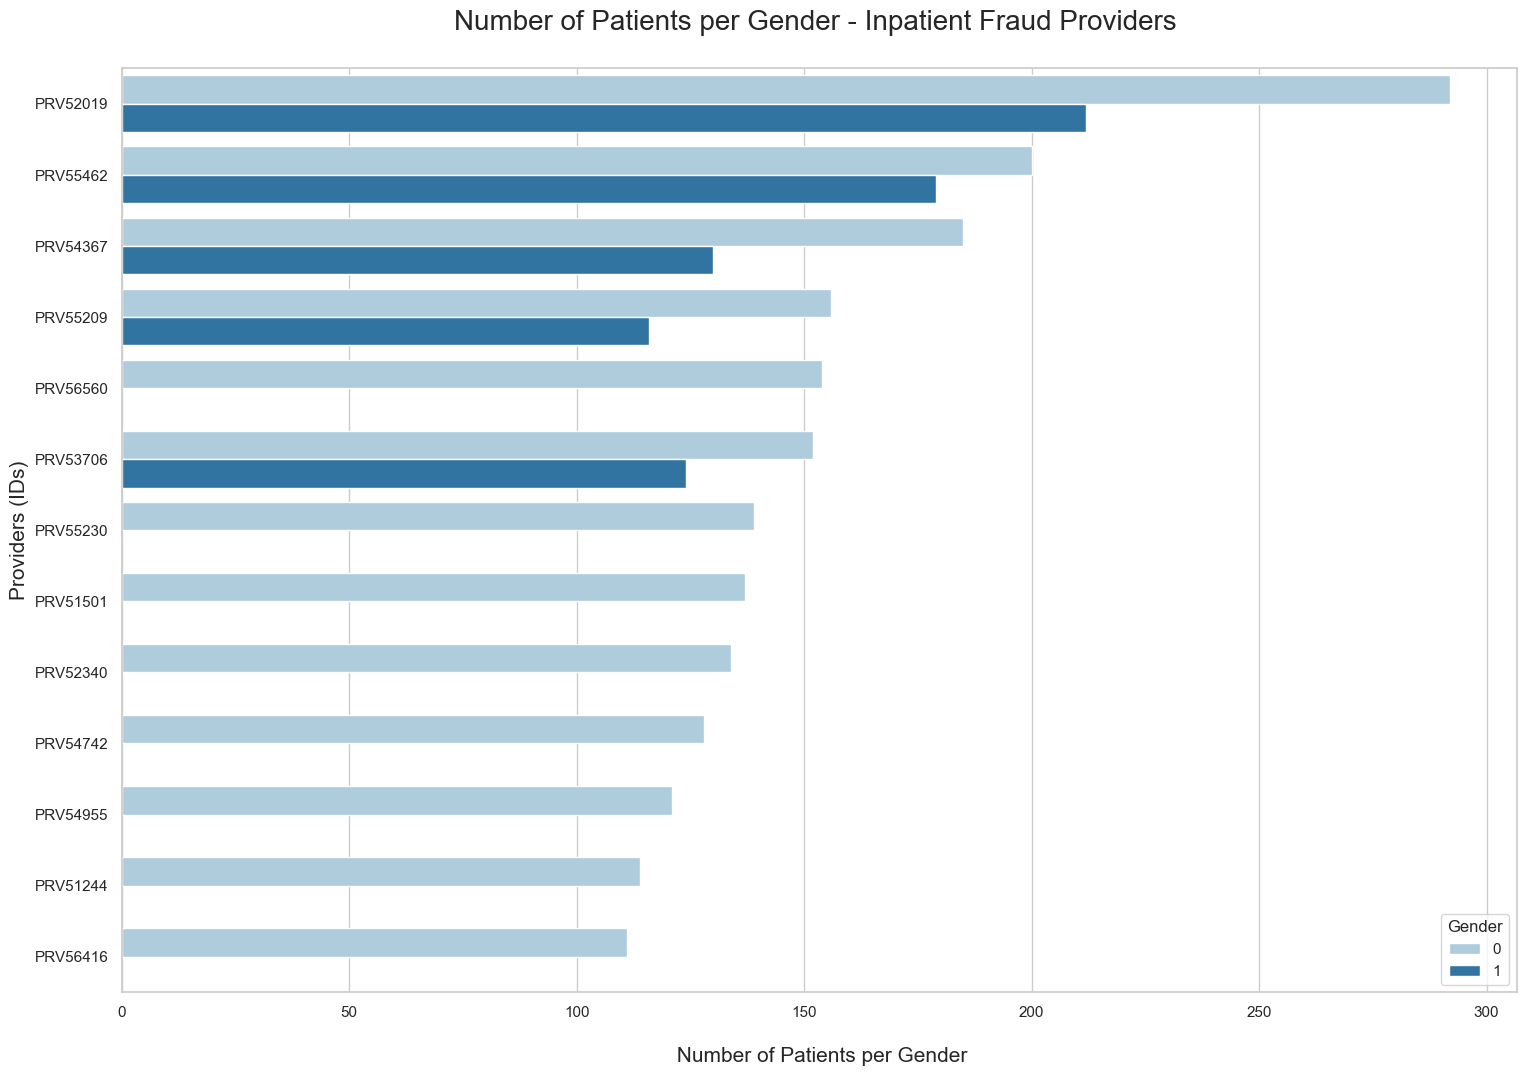

In [63]:
# Inpatient Data - fraud providers

gender_1 = pd.DataFrame(inpatient_df.loc[inpatient_df.PotentialFraud == 'Yes',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False))
gender_1.columns=['No. of Patients']
gender_1 = gender_1.reset_index().head(18)

# Plotting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_1,
    palette='Paired',
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Inpatient Fraud Providers \n", fontsize = 20)
plt.show()


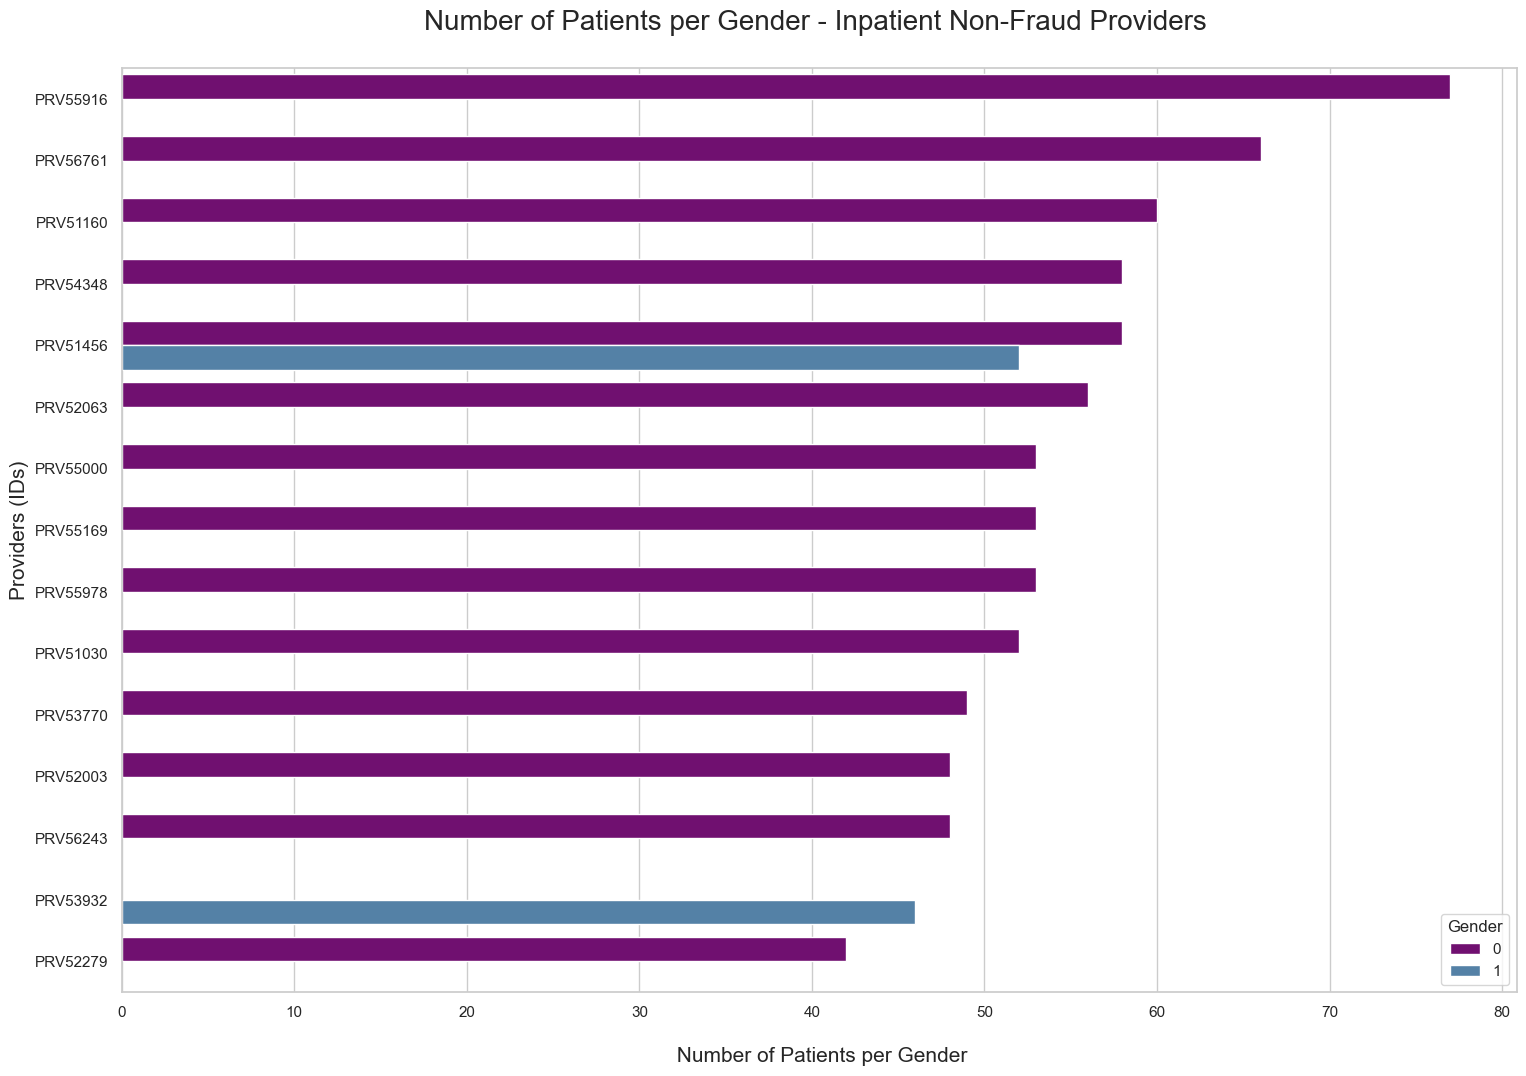

In [64]:
# Inpatient Data - non-fraud providers

gender_0 = pd.DataFrame(inpatient_df.loc[inpatient_df.PotentialFraud == 'No',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False))
gender_0.columns=['No. of Patients']
gender_0 = gender_0.reset_index().head(16)

# Plotting the results
plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_0,
    palette=['purple', 'steelblue'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Inpatient Non-Fraud Providers \n", fontsize = 20)
plt.show()



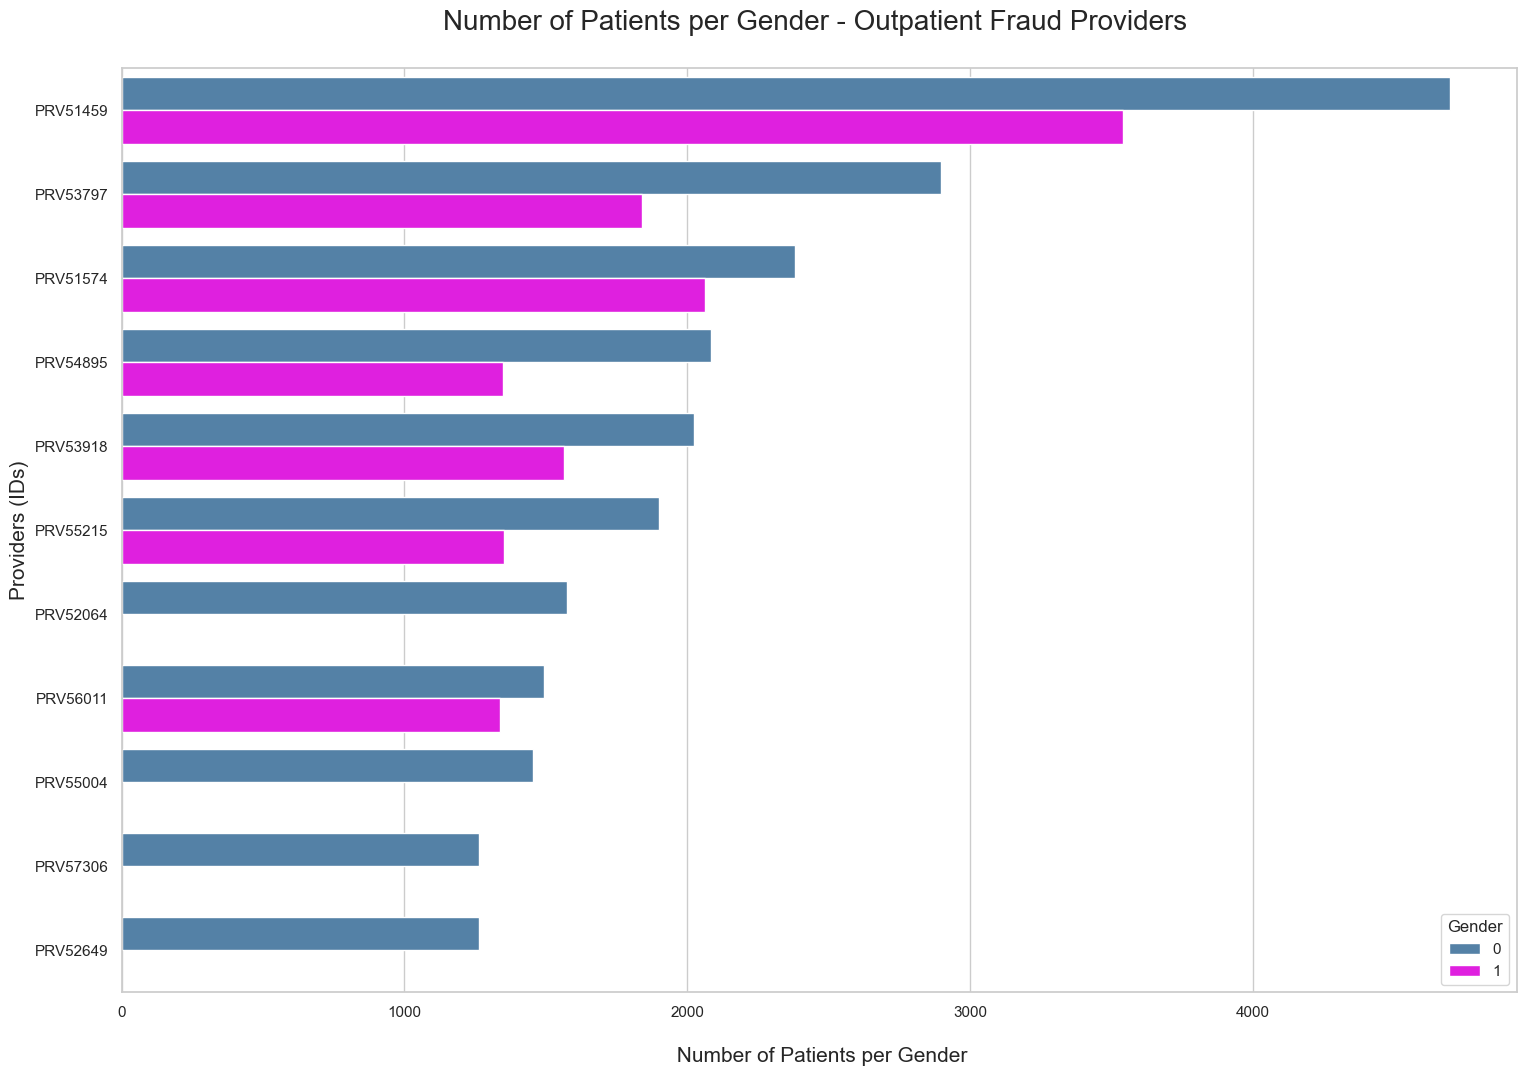

In [65]:
# Outpatient - fraud providers

gender_1 = pd.DataFrame(outpatient_df.loc[outpatient_df.PotentialFraud == 'Yes',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False)).head(18)
gender_1.columns=['No. of Patients']
gender_1 = gender_1.reset_index()


# Plotting the results
plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_1,
    palette=['steelblue', 'magenta'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Outpatient Fraud Providers \n", fontsize = 20)
plt.show()


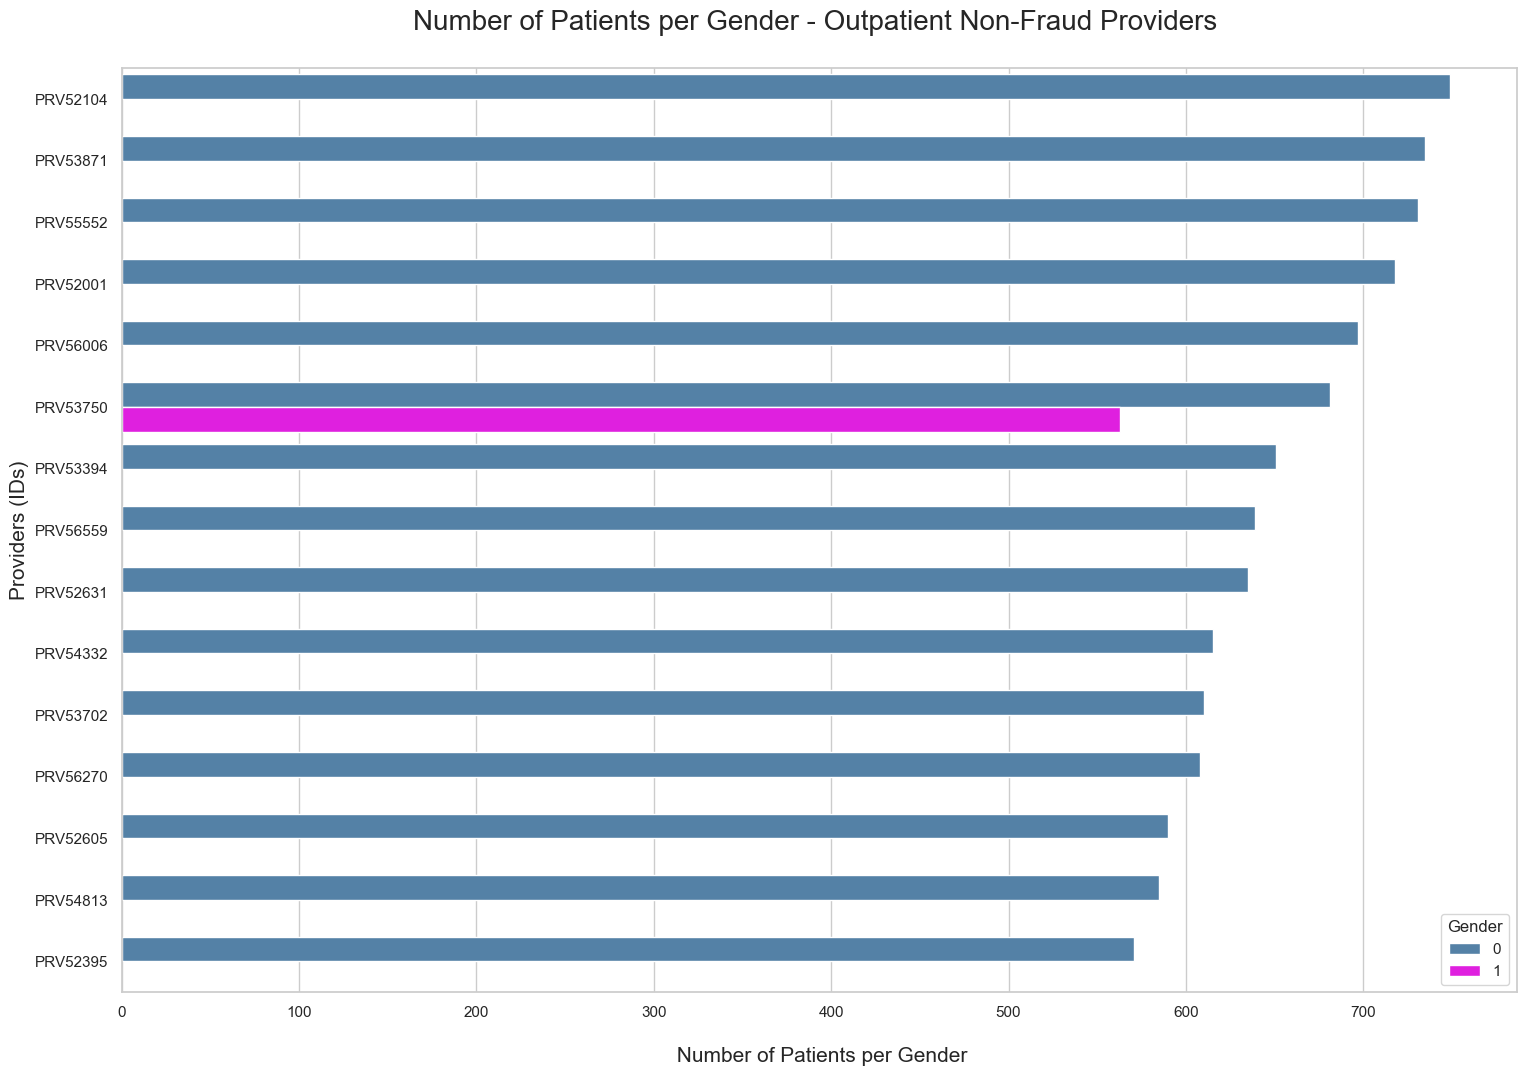

In [66]:
# Outpatient - non-fraud providers

gender_0 = pd.DataFrame(outpatient_df.loc[outpatient_df.PotentialFraud == 'No',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False)).head(16)
gender_0.columns=['No. of Patients']
gender_0 = gender_0.reset_index()

# Plotting the results
plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_0,
    palette=['steelblue', 'magenta'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Outpatient Non-Fraud Providers \n", fontsize = 20)
plt.show()


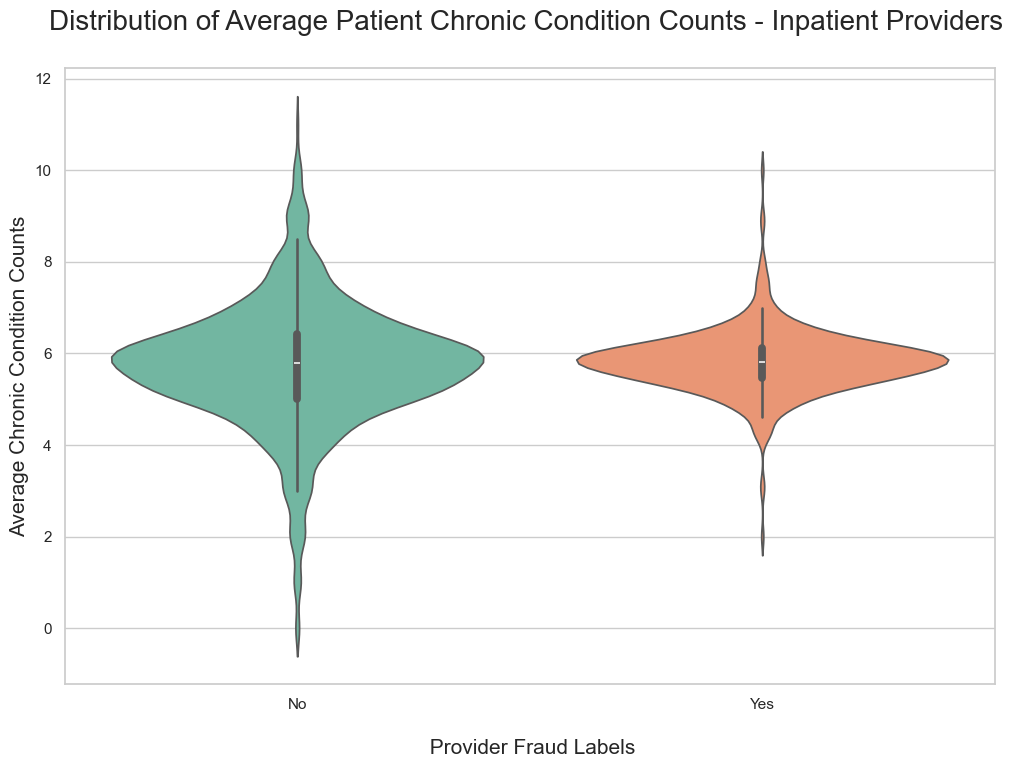

In [67]:
# Calculate average patient chronic condition counts per provider (Inpatient)

in_pat_cond = (inpatient_df.groupby('Provider')['Chr_Cond_Count']
               .mean()
               .reset_index(name='Chr_Cond_Count')
               .sort_values(by='Chr_Cond_Count', ascending=False)
               .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Chr_Cond_Count", data=in_pat_cond, palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Chronic Condition Counts", fontsize=15)
plt.title("Distribution of Average Patient Chronic Condition Counts - Inpatient Providers \n", fontsize=20)
plt.show()


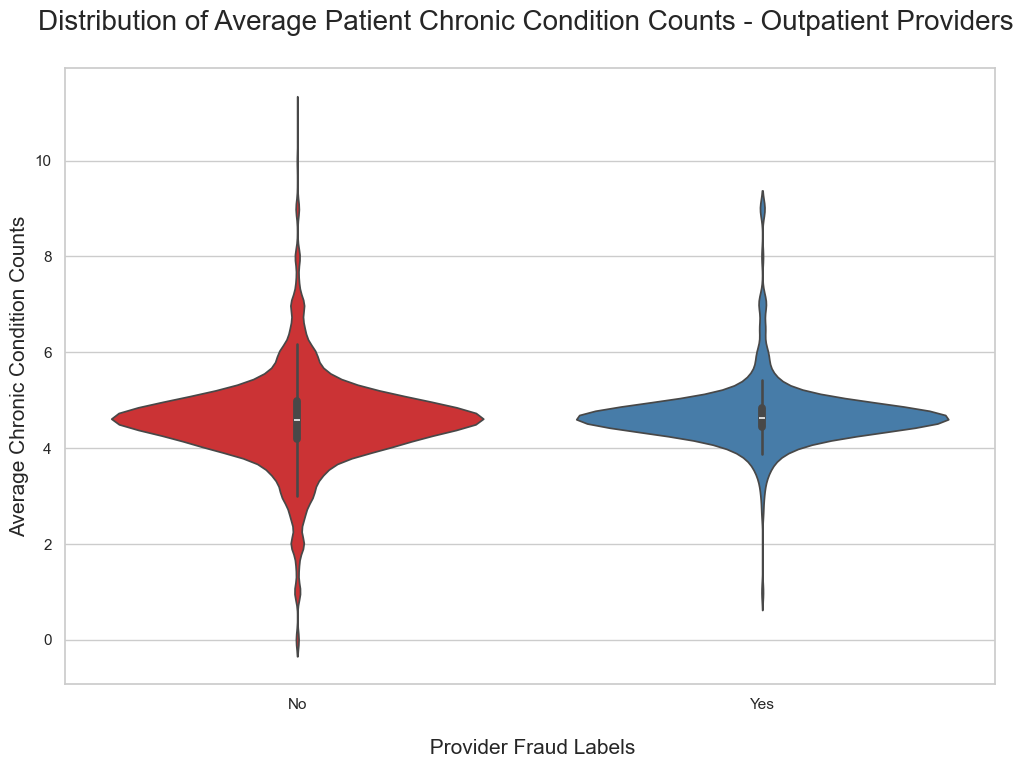

In [68]:
# Outpatient - average patient chronic condition counts per provider

# Calculate average patient chronic condition counts per provider and add fraud labels
out_pat_cond = (outpatient_df.groupby('Provider')['Chr_Cond_Count']
               .mean()
               .reset_index(name='Chr_Cond_Count')
               .sort_values(by='Chr_Cond_Count', ascending=False)
               .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Chr_Cond_Count", data=out_pat_cond, palette='Set1')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Chronic Condition Counts", fontsize=15)
plt.title("Distribution of Average Patient Chronic Condition Counts - Outpatient Providers \n", fontsize=20)
plt.show()

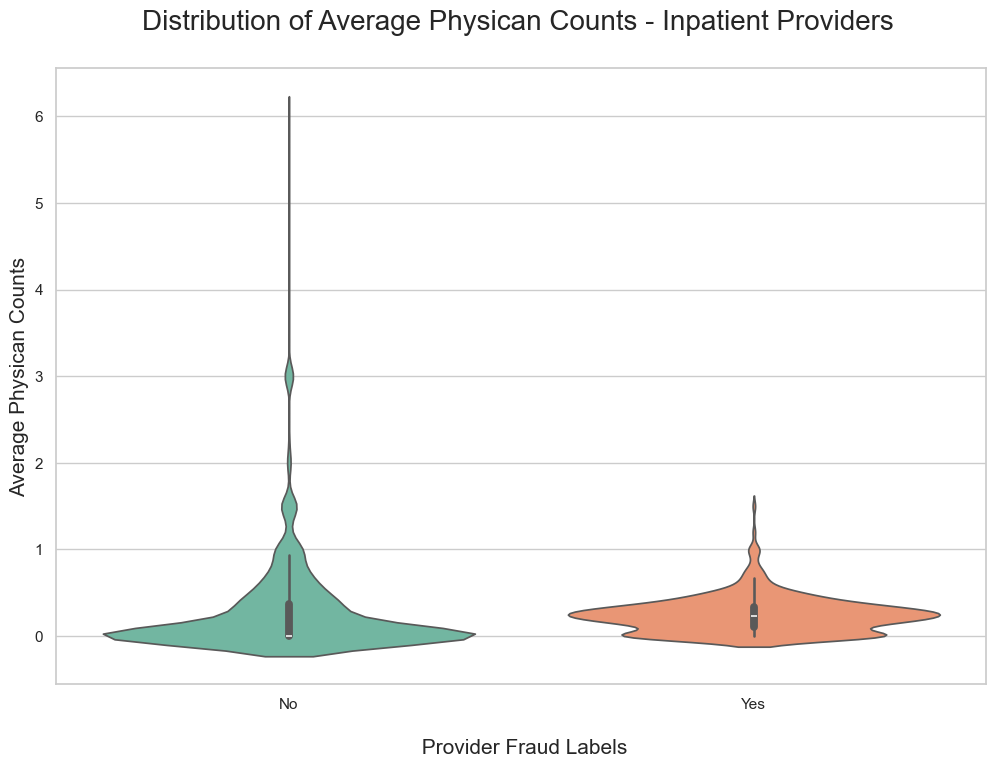

In [69]:
# Inpatient - average patient physician counts per provider

# Calculate average patient chronic condition counts per provider and add fraud labels
in_pat_phy = (inpatient_df.groupby('Provider')['Physician_Count']
               .mean()
               .reset_index(name='Physician_Count')
               .sort_values(by='Physician_Count', ascending=False)
               .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Physician_Count", data=in_pat_phy, palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Physican Counts", fontsize=15)
plt.title("Distribution of Average Physican Counts - Inpatient Providers \n", fontsize=20)
plt.show()

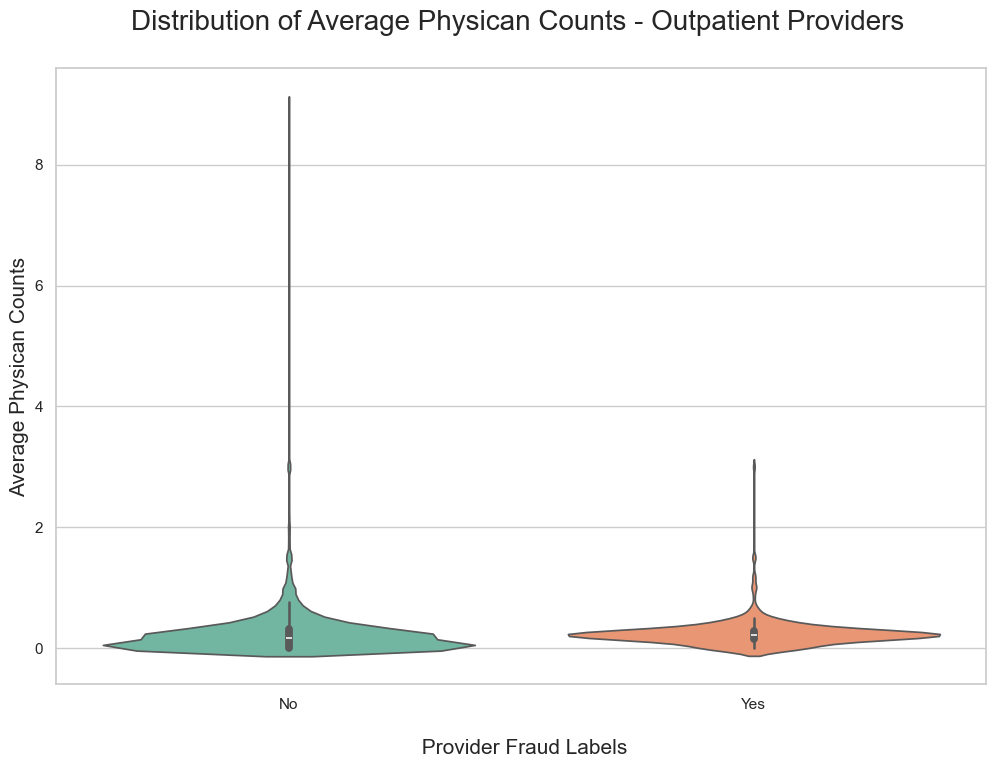

In [70]:
# Outpatient = Average patient physician counts per provider

 # Calculate average patient chronic condition counts per provider and add fraud labels
out_pat_phy = (outpatient_df.groupby('Provider')['Physician_Count']
               .mean()
               .reset_index(name='Physician_Count')
               .sort_values(by='Physician_Count', ascending=False)
               .merge(fraud_labels, on='Provider'))

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.violinplot(x="PotentialFraud", y="Physician_Count", data=out_pat_phy, palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize=15)
plt.ylabel("Average Physican Counts", fontsize=15)
plt.title("Distribution of Average Physican Counts - Outpatient Providers \n", fontsize=20)
plt.show()

### Claims Analysis

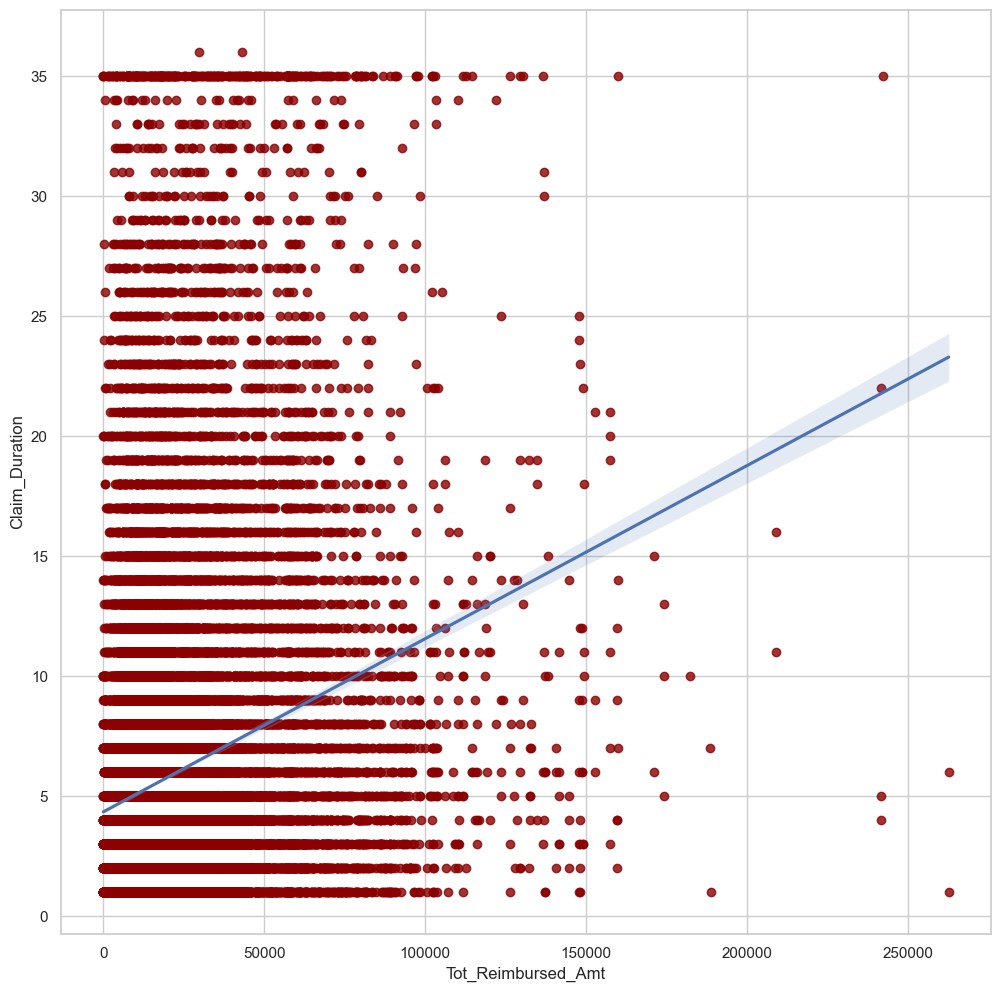

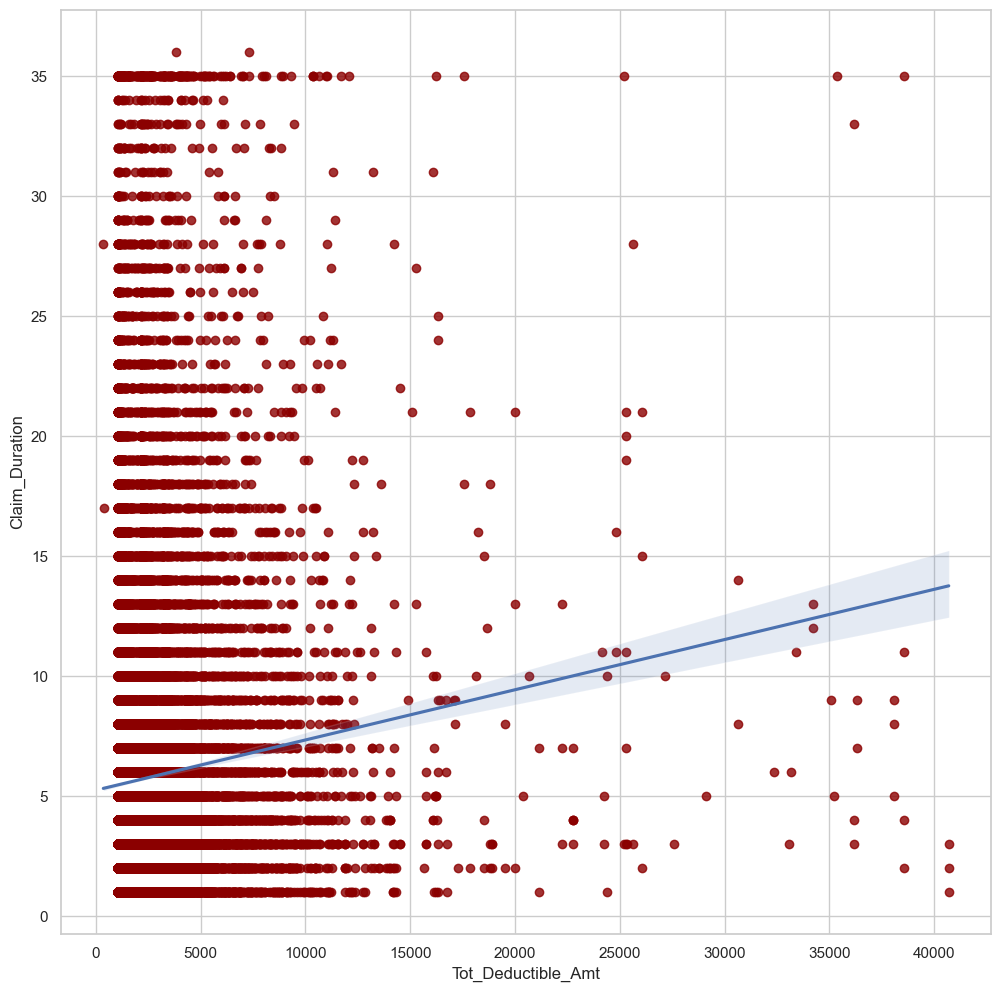

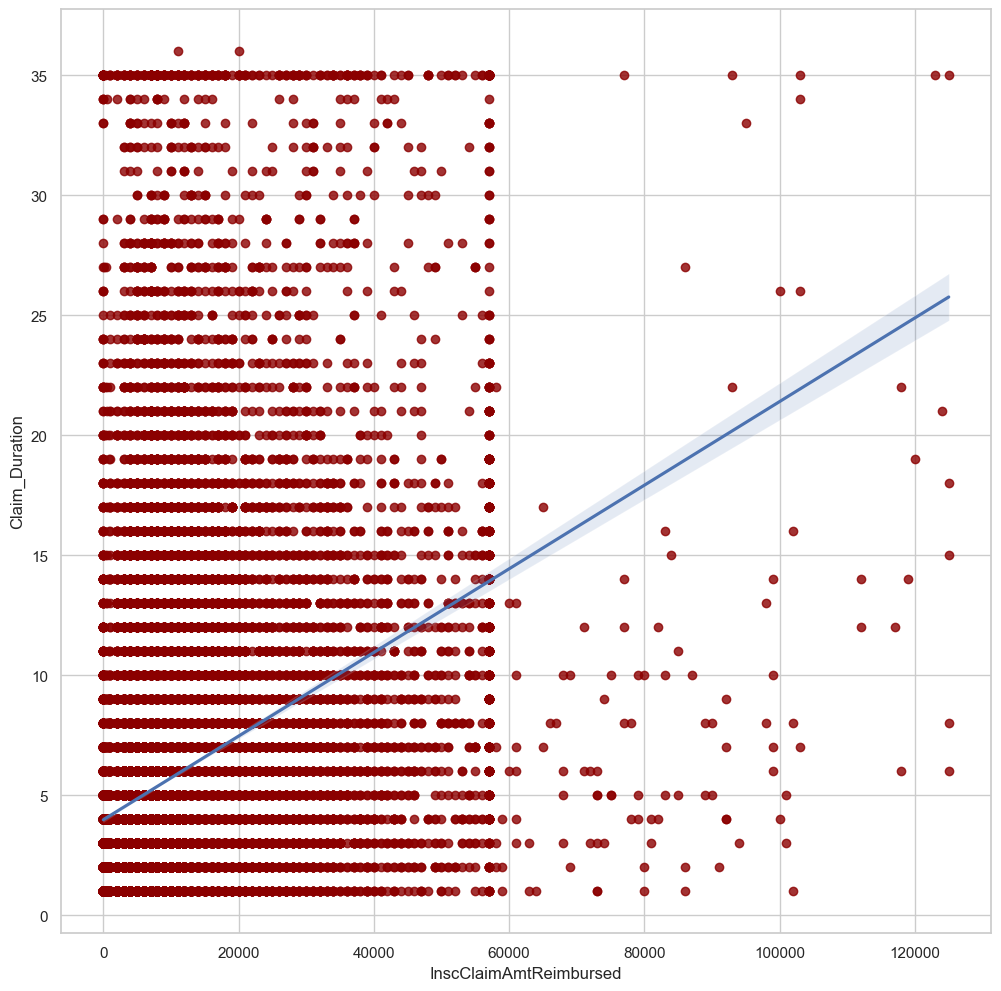

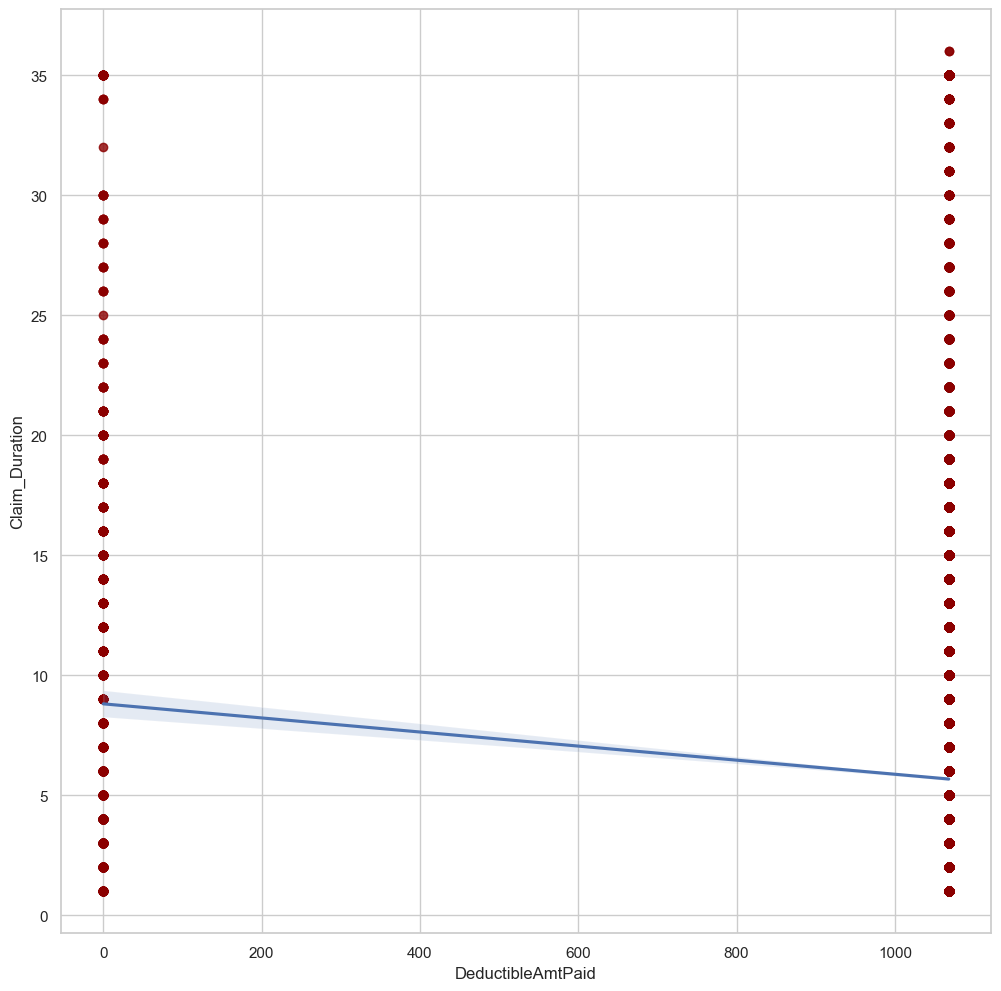

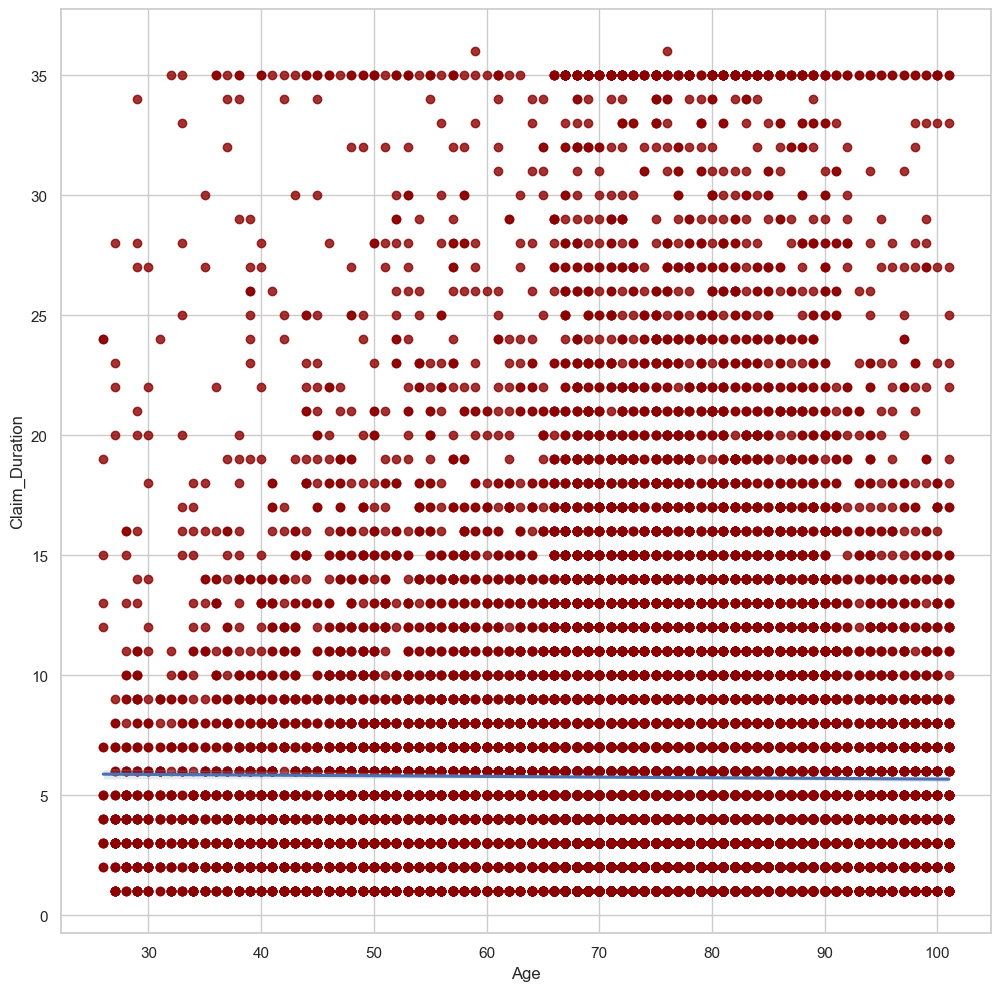

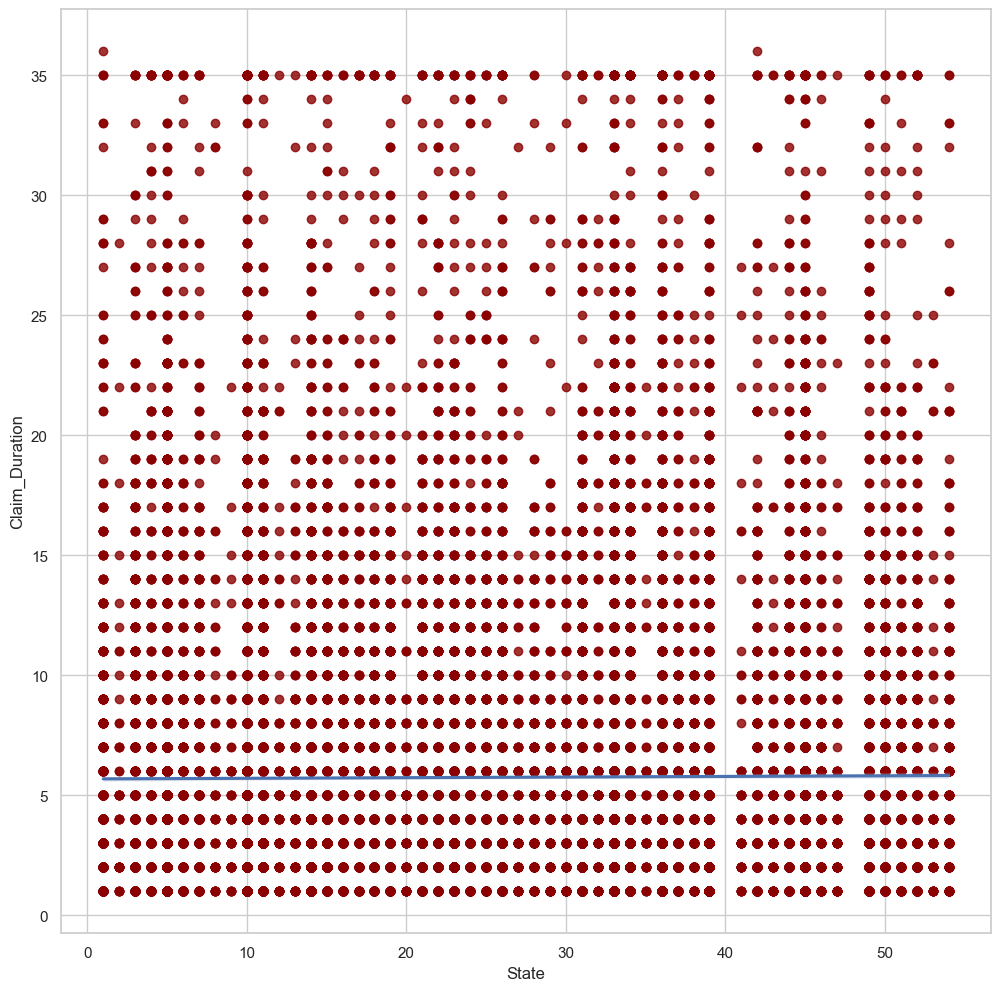

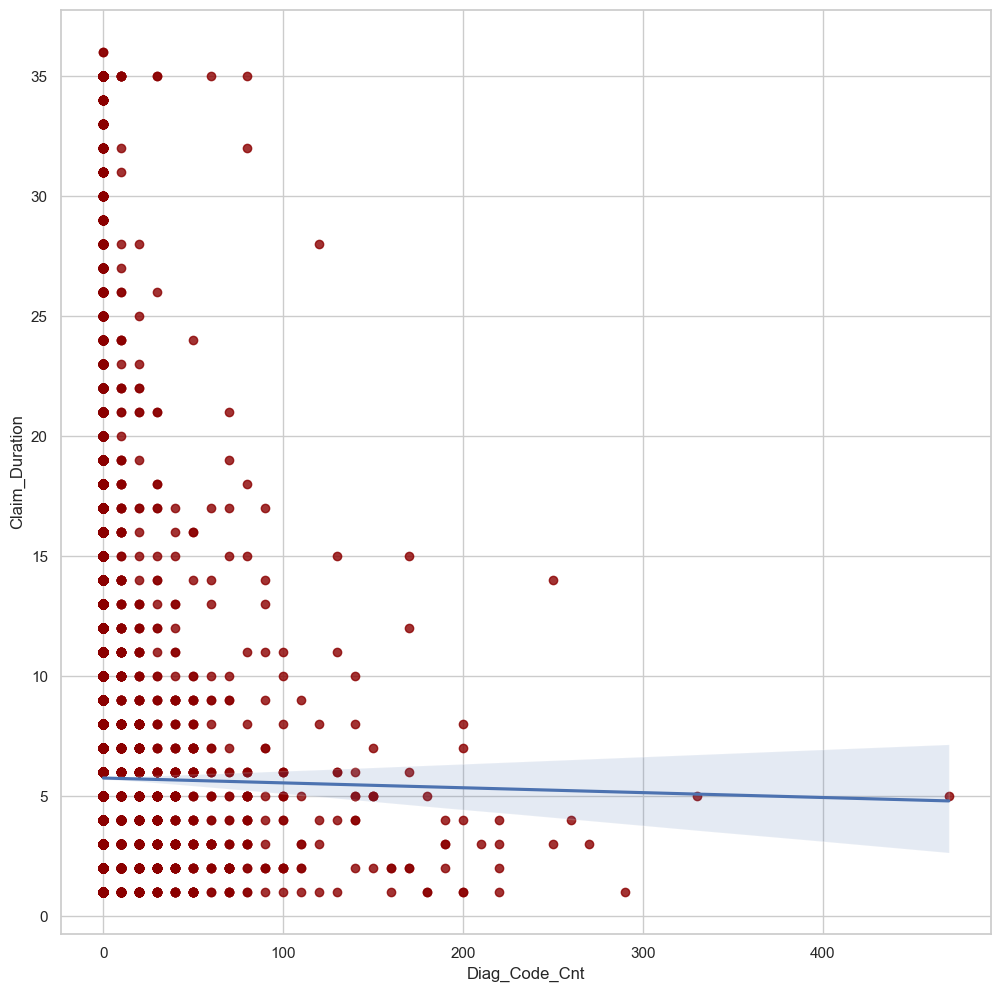

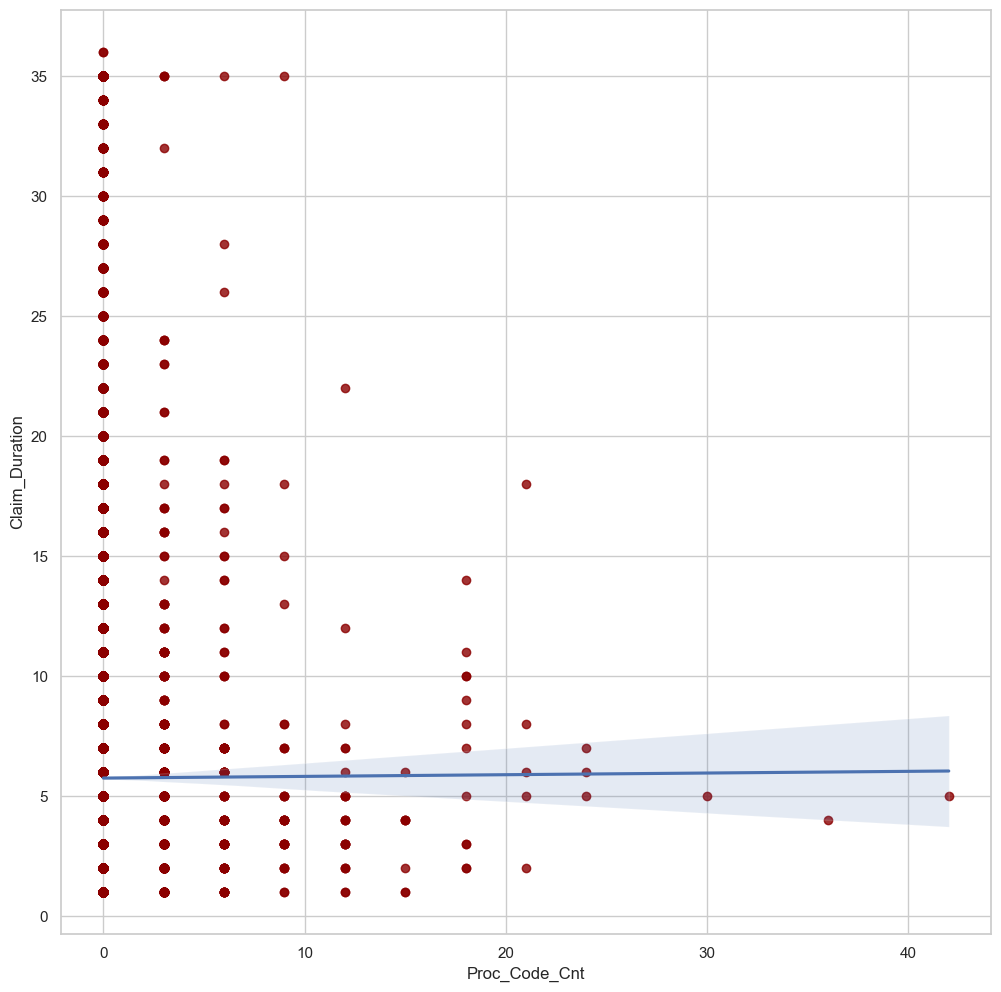

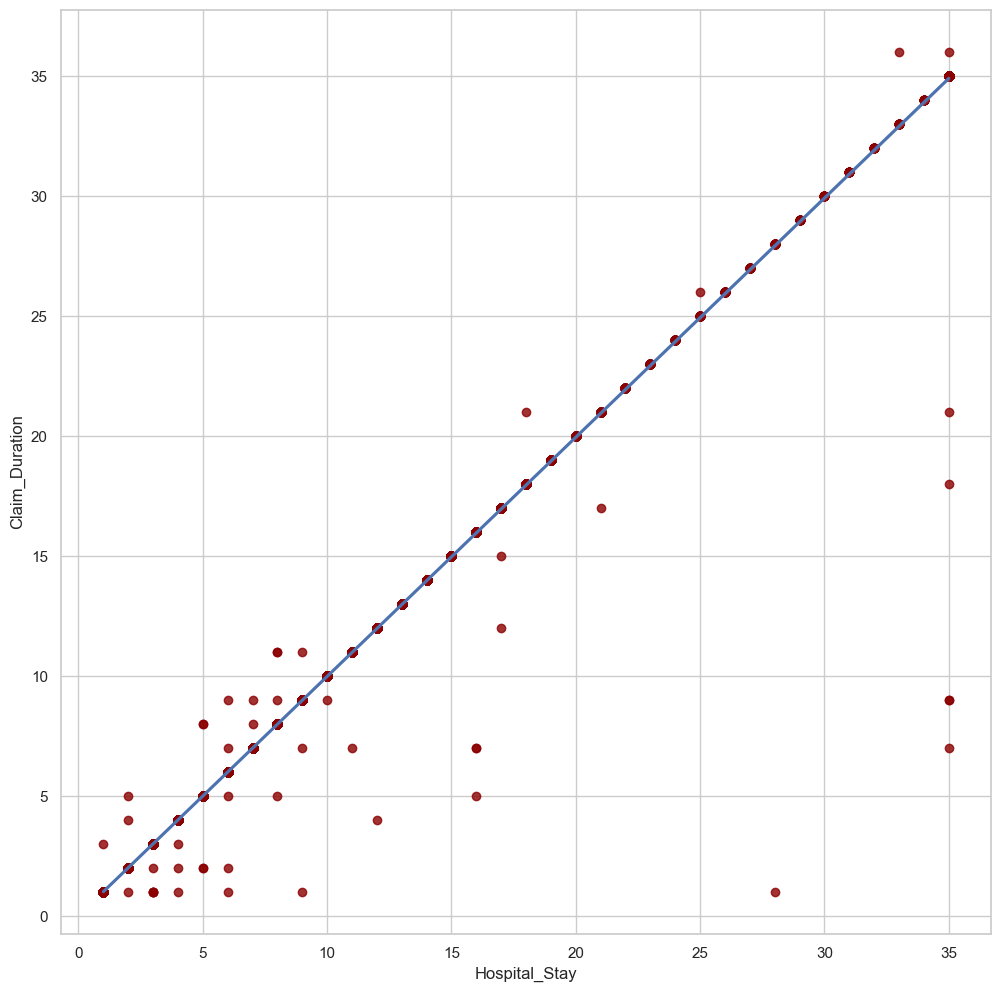

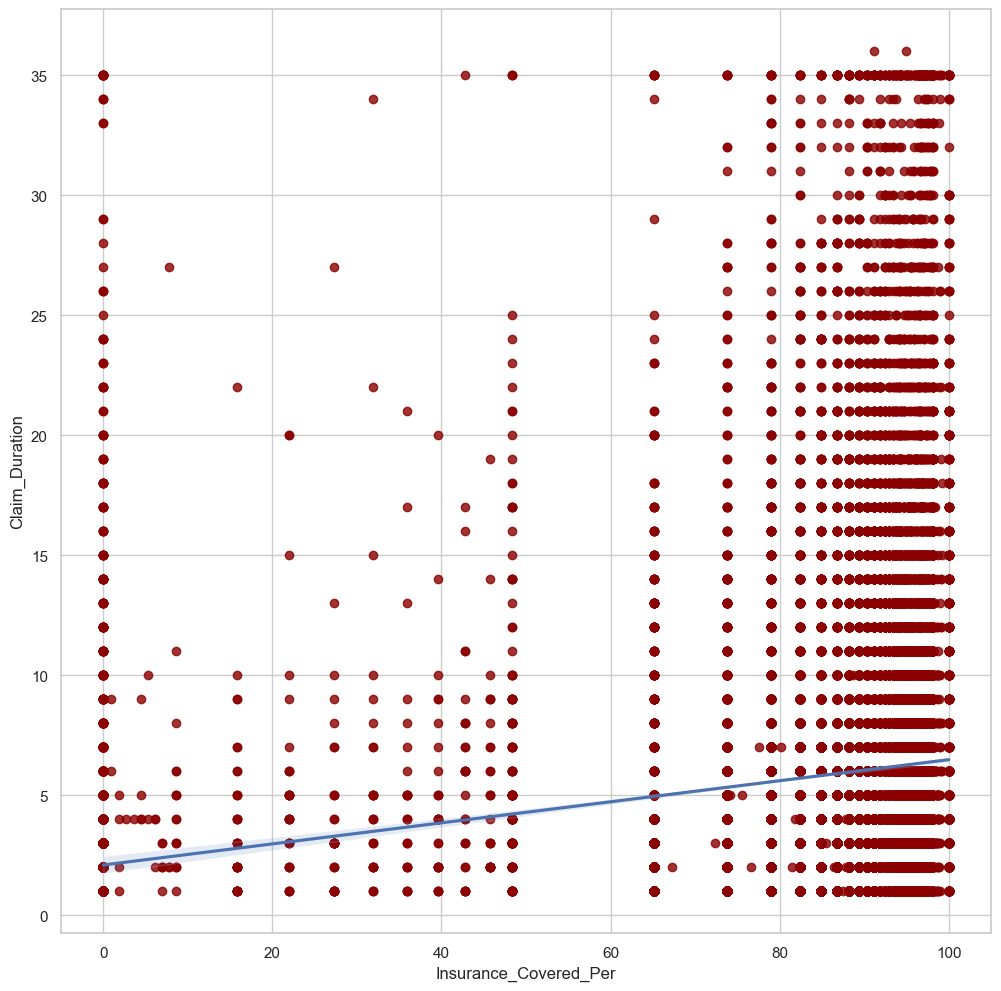

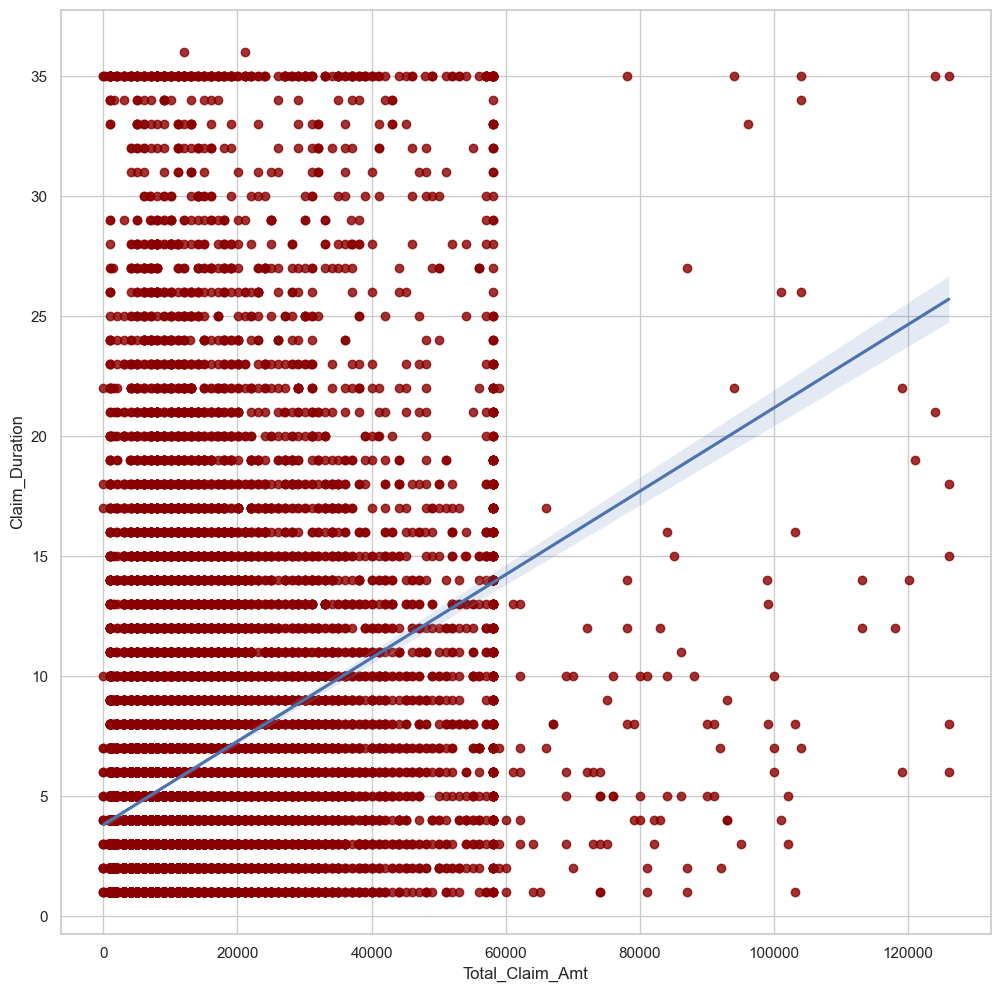

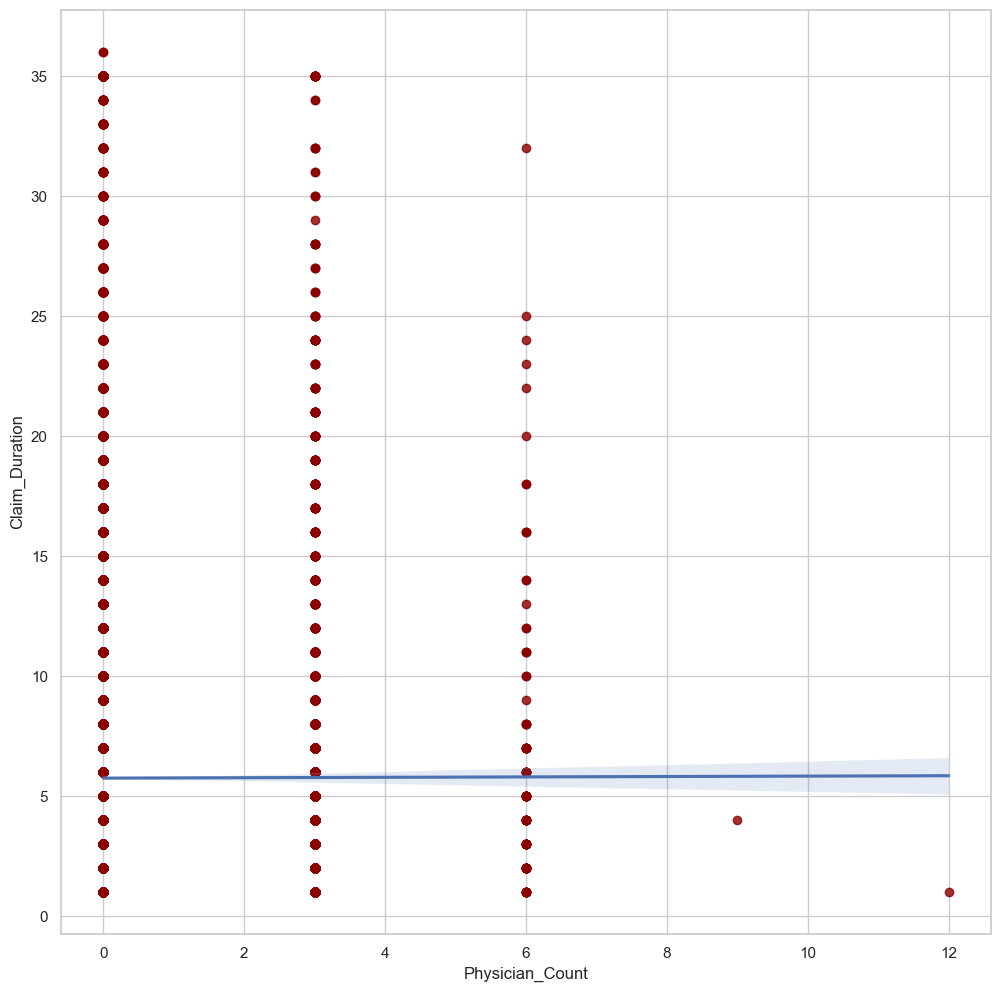

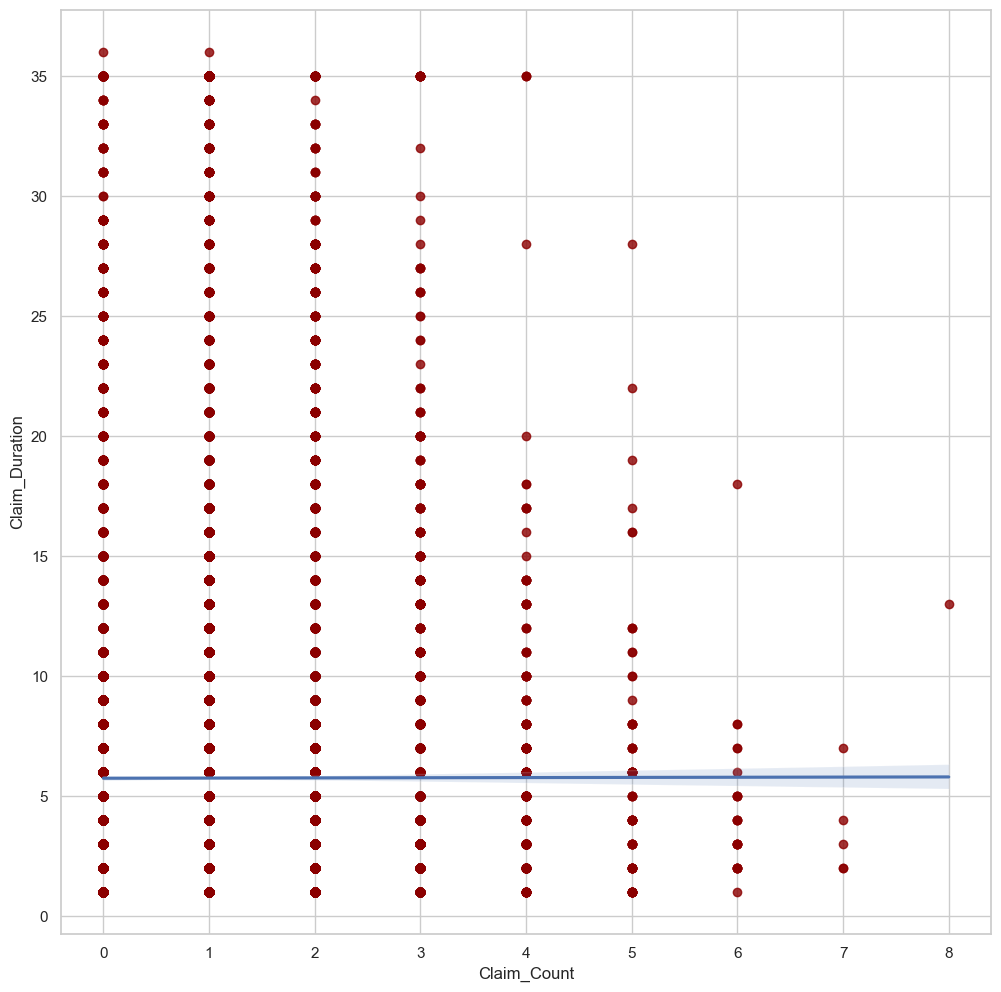

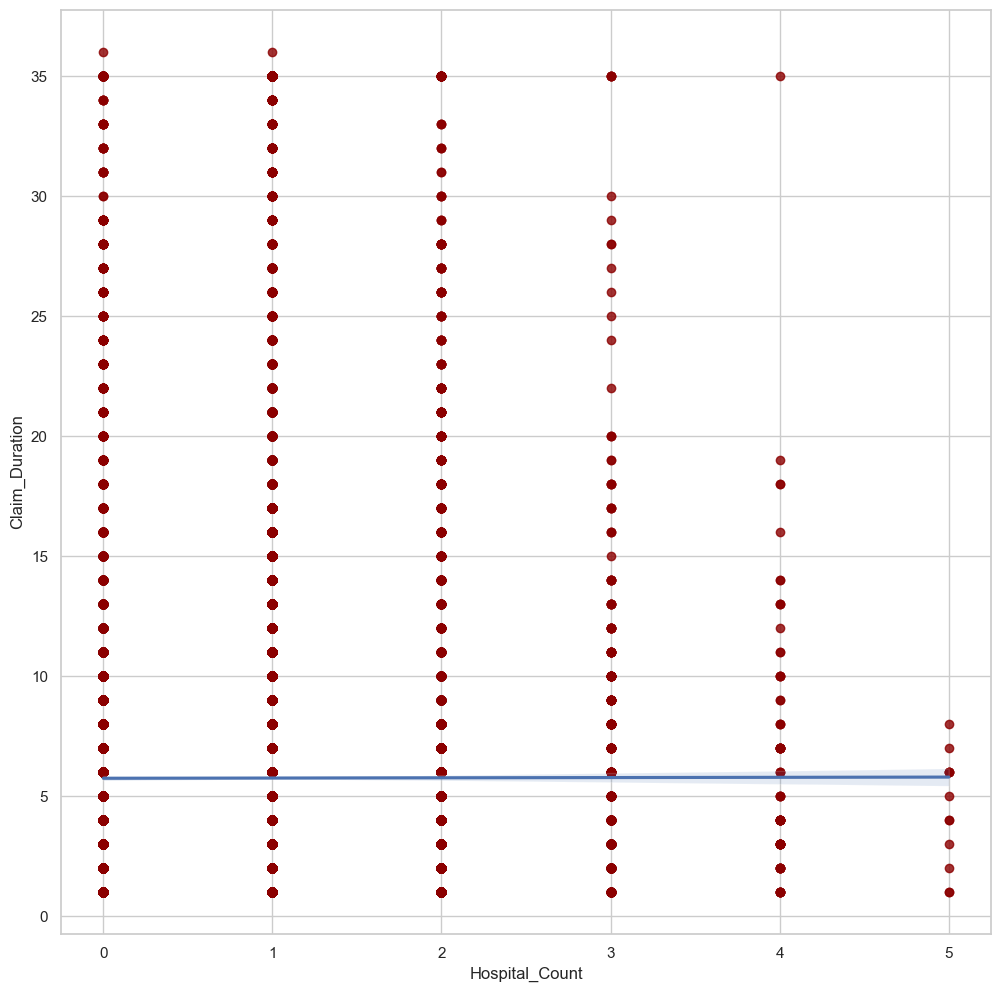

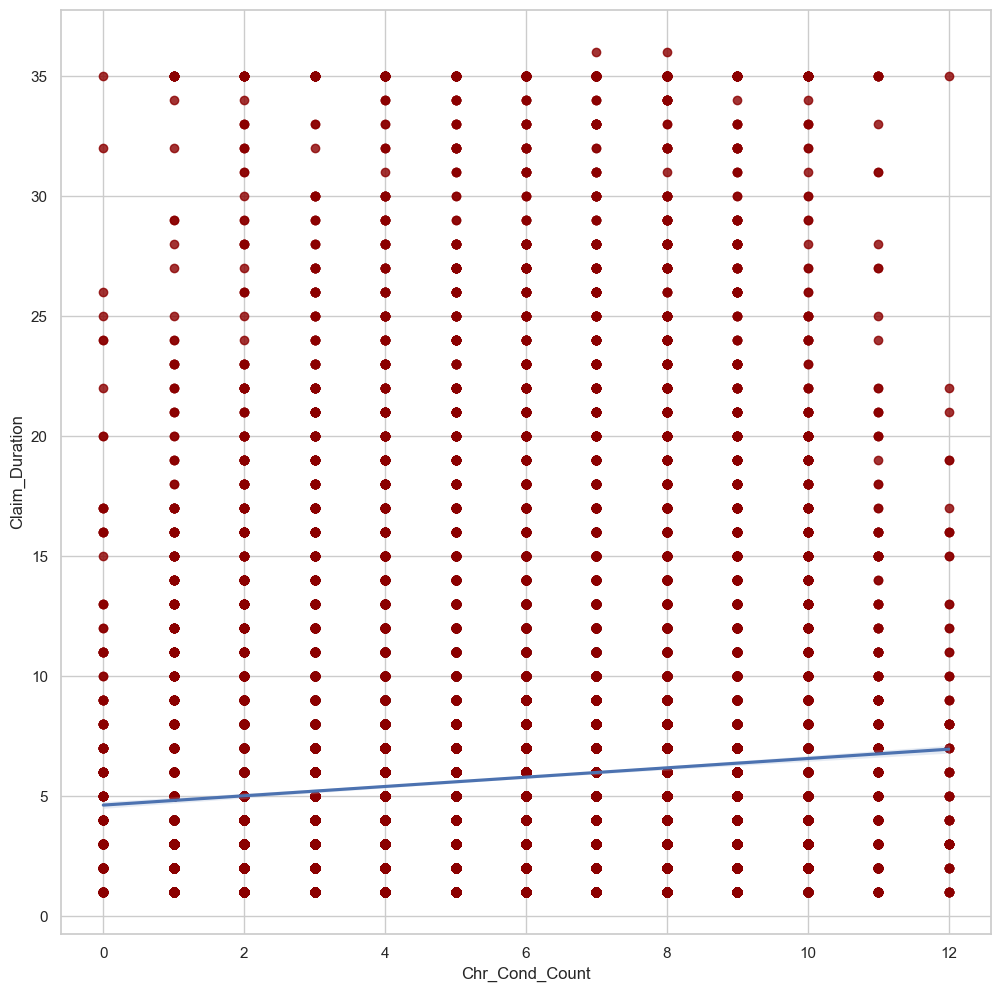

In [71]:
# Inpatient dataset claim duration scatter plots

col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
            'Age', 'State', 'Diag_Code_Cnt','Proc_Code_Cnt', 'Hospital_Stay','Insurance_Covered_Per',\
            'Total_Claim_Amt','Physician_Count','Claim_Count', 'Hospital_Count', 'Chr_Cond_Count']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 12))
    x = inpatient_df[col]
    y = inpatient_df['Claim_Duration']
    sns.regplot(x=x, y=y,scatter_kws={"color":"darkred"})

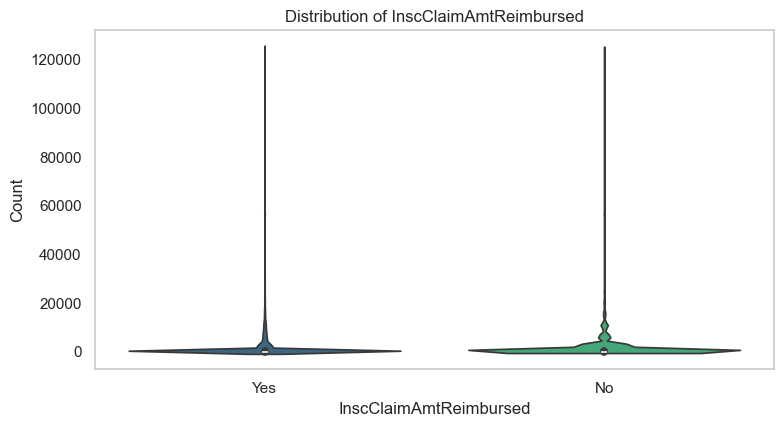

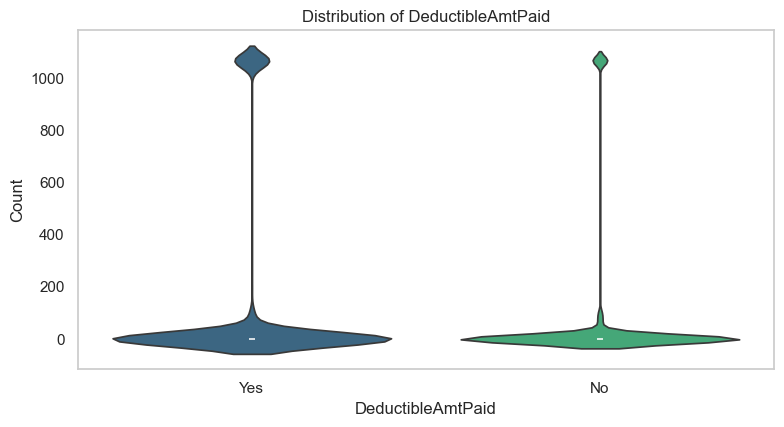

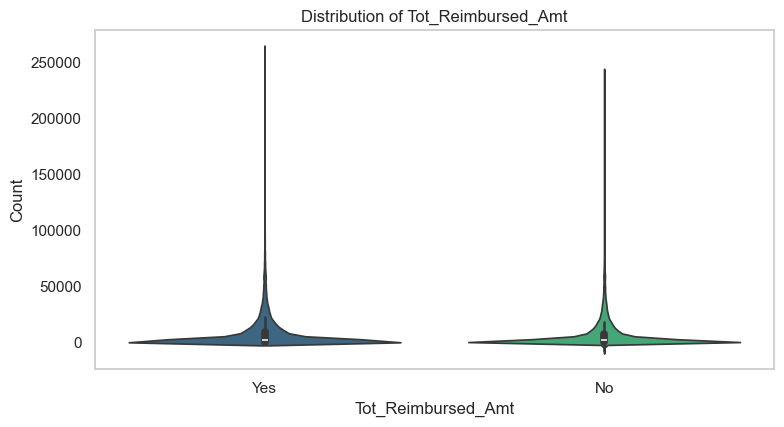

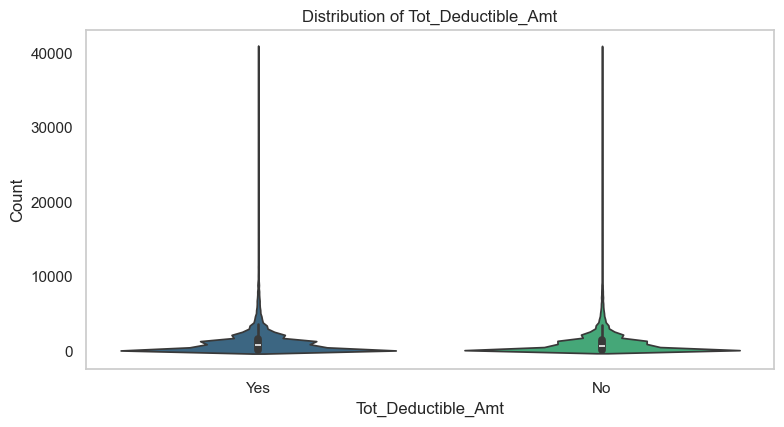

In [72]:
rel_num_vars = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Tot_Reimbursed_Amt', 'Tot_Deductible_Amt']

for var in rel_num_vars:
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    sns.violinplot(x='PotentialFraud', y=var, data=train_df, width=0.8, cut=2, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

  
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## PCA


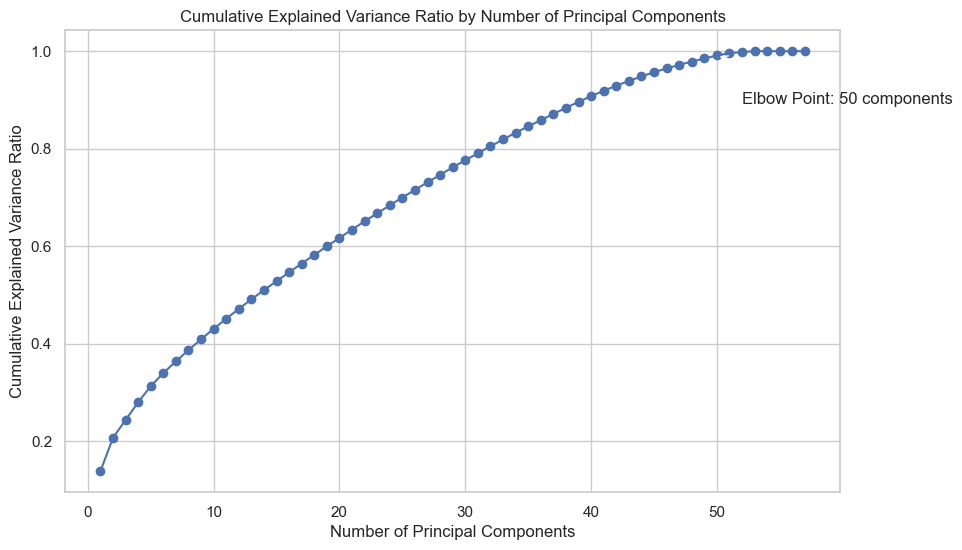

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# You may need to drop other columns depending on your analysis
train_df2 = train_df.drop(columns=['BeneID', 'ClaimID', 'Provider'])

# Separate features (X) and target (y)
X = train_df2.drop(columns=['PotentialFraud'])
y = train_df2['PotentialFraud']

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)

# Find the elbow point (where the curve starts to plateau)
elbow_point = next(idx for idx, ratio in enumerate(cumulative_variance_ratio) if ratio >= 0.99)

# Annotate the elbow point on the plot
plt.annotate(f'Elbow Point: {elbow_point + 1} components',
             xy=(elbow_point + 1, cumulative_variance_ratio[elbow_point]),
             xytext=(elbow_point + 3, cumulative_variance_ratio[elbow_point] - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

In [74]:
# Get the principal component loadings
loadings = pca.components_

# Get the indices of the 45 components with highest variance
top_50_components_indices = loadings.argsort(axis=1)[:, -50:]

# Get the names of the variables corresponding to the indices
variable_names = X.columns

# List the 50 variables that are considered the most important components
top_50_variables = variable_names[top_50_components_indices.flatten()]
print("Top 50 variables that are considered the most important components:")
print(top_50_variables)


Top 50 variables that are considered the most important components:
Index(['ClmDiagnosisCode_4', 'ClmDiagnosisCode_3', 'ClmProcedureCode_2',
       'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_3', 'OtherPhysician', 'Insurance_Covered_Per',
       'ClmDiagnosisCode_1',
       ...
       'DOB_month', 'ClmProcedureCode_2', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'Claim_Count', 'ClmDiagnosisCode_10', 'DOB_year',
       'Age', 'Chr_Cond_Count', 'Total_Claim_Amt'],
      dtype='object', length=2850)


In [75]:
!jupyter nbconvert --to html capstone_eda_final.ipynb

[NbConvertApp] Converting notebook capstone_eda_final.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 89 image(s).
[NbConvertApp] Writing 7496753 bytes to capstone_eda_final.html
